In [1]:
import torch 
import os
from torch.utils.data.dataloader import DataLoader
import numpy as np
import pickle
from utils.dataset import ImitDataset, ImitDatasetTraj
from policy.sail_traj import ExtendedNetworkTraj
from policy.policy_factory import policy_factory
import configparser
import gym
import sys
sys.path.append('..')
from crowd_sim.envs.utils.robot import Robot
from crowd_sim.envs.crowd_sim import CrowdSim
from crowd_nav.utils.explorer import ExplorerDs
import matplotlib.pyplot as plt

from crowd_nav.imitate import *

## Training

In [3]:
model_p ='data/full_data_tests/baseline/imitate-baseline-data-0.5-notraj/policy_net_189.pth'
results_baseline = test_model(model_p, model_type='sail', n_episodes=500)

success: 0.87, collision: 0.13, nav time: 10.38, reward: 0.2722 +- 0.1717


In [3]:
gamma_grid = np.linspace(0.5, 3.5, 12)
args_traj = \
{'policy' : 'sail_traj_simple', 'data_sample' : 0.7, 'batch_size' : 128,
'auxiliary_task' : 'traj', 'traj_start' : 0, 'gpu' : True, 'traj_length' : 4,
'output_dir' : 'data/hptests/trajpred/imitate', 'num_epoch' : 200}

In [5]:
for gamma in gamma_grid :
    args = args_traj.copy()
    args['traj_weight'] = gamma
    _ = imitate(args_change=args)

Folder already exists, continuing from last saved model
Path : data/hptests/trajpred/imitate-trajpred-0.5-weight-1to4-length-traj
2020-12-29 22:44:48, INFO:  =========================== 
2020-12-29 22:44:48, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-29 22:44:48, INFO: Using device: cuda
2020-12-29 22:44:48, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-29 22:44:49, INFO: +: 0 - 102427
2020-12-29 22:44:49, INFO: val_indices: 204856 - 292650
2020-12-29 22:44:49, INFO: Auxiliary task traj


Epoch #0: loss = (0.1620, 0.0653), task = (0.1620, 0.0653), nce = (0.0000, 0.0000), tpred = (0.1871, 0.0119), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0628, 0.0644), task = (0.0628, 0.0644), nce = (0.0000, 0.0000), tpred = (0.0092, 0.0077), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0604, 0.0606), task = (0.0604, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0070, 0.0070), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0592, 0.0597), task = (0.0592, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0064), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0582, 0.0590), task = (0.0582, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0056), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0578, 0.0582), task = (0.0578, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0055), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0570, 0.0581), task = (0.0570, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0055), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0565, 0.0612), task = (0.0565, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0081), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0559, 0.0575), task = (0.0559, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0055), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0554, 0.0572), task = (0.0554, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0062), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0550, 0.0570), task = (0.0550, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0058), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0543, 0.0558), task = (0.0543, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0063), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0540, 0.0569), task = (0.0540, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0074), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0536, 0.0565), task = (0.0536, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0066), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0531, 0.0544), task = (0.0531, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0054), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0526, 0.0547), task = (0.0526, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0056), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0524, 0.0543), task = (0.0524, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0058), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0520, 0.0558), task = (0.0520, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0054), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0517, 0.0536), task = (0.0517, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0052), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0513, 0.0548), task = (0.0513, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0510, 0.0532), task = (0.0510, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0055), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0508, 0.0534), task = (0.0508, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0507, 0.0549), task = (0.0507, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0068), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0505, 0.0526), task = (0.0505, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0060), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0501, 0.0534), task = (0.0501, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0061), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0502, 0.0540), task = (0.0502, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0056), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0500, 0.0531), task = (0.0500, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0058), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0497, 0.0529), task = (0.0497, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0055), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0494, 0.0525), task = (0.0494, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0052), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0493, 0.0536), task = (0.0493, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0059), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0492, 0.0528), task = (0.0492, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0056), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0490, 0.0524), task = (0.0490, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0053), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0489, 0.0522), task = (0.0489, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0056), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0487, 0.0520), task = (0.0487, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0054), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0486, 0.0533), task = (0.0486, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0054), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0485, 0.0528), task = (0.0485, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0065), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0485, 0.0520), task = (0.0485, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0055), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0482, 0.0528), task = (0.0482, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0056), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0482, 0.0517), task = (0.0482, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0052), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0481, 0.0526), task = (0.0481, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0055), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0479, 0.0527), task = (0.0479, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0478, 0.0521), task = (0.0478, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0051), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0477, 0.0531), task = (0.0477, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0062), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0475, 0.0532), task = (0.0475, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0057), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0474, 0.0523), task = (0.0474, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0059), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0473, 0.0514), task = (0.0473, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0051), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0473, 0.0511), task = (0.0473, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0051), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0471, 0.0525), task = (0.0471, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0048), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0470, 0.0524), task = (0.0470, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0050), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0467, 0.0526), task = (0.0467, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0470, 0.0521), task = (0.0470, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0467, 0.0525), task = (0.0467, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0062), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0467, 0.0523), task = (0.0467, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0052), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0467, 0.0519), task = (0.0467, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0050), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0467, 0.0540), task = (0.0467, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0064), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0465, 0.0524), task = (0.0465, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0057), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0464, 0.0526), task = (0.0464, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0463, 0.0520), task = (0.0463, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0050), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0462, 0.0528), task = (0.0462, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0462, 0.0520), task = (0.0462, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0460, 0.0528), task = (0.0460, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0460, 0.0521), task = (0.0460, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0460, 0.0530), task = (0.0460, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0459, 0.0523), task = (0.0459, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0058), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0459, 0.0530), task = (0.0459, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0456, 0.0523), task = (0.0456, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0455, 0.0520), task = (0.0455, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0456, 0.0526), task = (0.0456, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0454, 0.0526), task = (0.0454, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0453, 0.0527), task = (0.0453, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0048), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0454, 0.0526), task = (0.0454, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0454, 0.0522), task = (0.0454, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0052), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0451, 0.0526), task = (0.0451, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0450, 0.0529), task = (0.0450, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0055), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0452, 0.0526), task = (0.0452, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0450, 0.0521), task = (0.0450, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0051), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0449, 0.0527), task = (0.0449, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0056), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0449, 0.0527), task = (0.0449, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0056), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0448, 0.0536), task = (0.0448, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0061), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0447, 0.0530), task = (0.0447, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0051), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0445, 0.0531), task = (0.0445, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0051), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0447, 0.0528), task = (0.0447, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0054), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0446, 0.0523), task = (0.0446, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0444, 0.0528), task = (0.0444, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0050), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0443, 0.0526), task = (0.0443, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0053), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0444, 0.0525), task = (0.0444, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0050), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0442, 0.0538), task = (0.0442, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0080), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0444, 0.0526), task = (0.0444, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0440, 0.0528), task = (0.0440, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0442, 0.0542), task = (0.0442, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0439, 0.0532), task = (0.0439, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0057), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0437, 0.0525), task = (0.0437, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0439, 0.0530), task = (0.0439, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0057), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0438, 0.0532), task = (0.0438, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0061), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0436, 0.0521), task = (0.0436, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0048), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0435, 0.0536), task = (0.0435, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0057), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0436, 0.0526), task = (0.0436, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0051), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0435, 0.0532), task = (0.0435, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0434, 0.0536), task = (0.0434, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0053), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0434, 0.0529), task = (0.0434, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0048), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0433, 0.0537), task = (0.0433, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0054), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0432, 0.0535), task = (0.0432, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0053), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0435, 0.0525), task = (0.0435, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0055), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0431, 0.0532), task = (0.0431, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0431, 0.0532), task = (0.0431, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0430, 0.0536), task = (0.0430, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0429, 0.0538), task = (0.0429, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0429, 0.0534), task = (0.0429, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0429, 0.0537), task = (0.0429, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0053), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0429, 0.0542), task = (0.0429, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0055), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0428, 0.0538), task = (0.0428, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0056), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0428, 0.0553), task = (0.0428, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0069), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0426, 0.0536), task = (0.0426, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0053), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0425, 0.0538), task = (0.0425, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0055), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0425, 0.0538), task = (0.0425, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0423, 0.0532), task = (0.0423, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0055), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0423, 0.0531), task = (0.0423, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0423, 0.0536), task = (0.0423, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0054), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0423, 0.0528), task = (0.0423, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0422, 0.0543), task = (0.0422, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0050), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0422, 0.0548), task = (0.0422, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0421, 0.0546), task = (0.0421, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0423, 0.0538), task = (0.0423, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0420, 0.0534), task = (0.0420, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0049), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0420, 0.0537), task = (0.0420, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0052), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0417, 0.0536), task = (0.0417, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0051), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0419, 0.0538), task = (0.0419, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0049), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0418, 0.0543), task = (0.0418, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0056), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0419, 0.0546), task = (0.0419, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0417, 0.0541), task = (0.0417, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0053), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0417, 0.0537), task = (0.0417, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0048), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0415, 0.0553), task = (0.0415, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0059), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0414, 0.0539), task = (0.0414, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0048), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0414, 0.0554), task = (0.0414, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0061), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0414, 0.0560), task = (0.0414, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0070), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0413, 0.0551), task = (0.0413, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0414, 0.0541), task = (0.0414, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0414, 0.0546), task = (0.0414, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0047), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0413, 0.0533), task = (0.0413, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0413, 0.0540), task = (0.0413, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0411, 0.0553), task = (0.0411, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0055), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0412, 0.0543), task = (0.0412, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0050), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0411, 0.0534), task = (0.0411, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0411, 0.0538), task = (0.0411, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0411, 0.0553), task = (0.0411, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0053), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0410, 0.0551), task = (0.0410, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0054), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0410, 0.0548), task = (0.0410, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0407, 0.0545), task = (0.0407, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0051), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0408, 0.0545), task = (0.0408, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0408, 0.0544), task = (0.0408, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0404, 0.0565), task = (0.0404, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0060), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0407, 0.0544), task = (0.0407, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0051), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0405, 0.0552), task = (0.0405, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0405, 0.0545), task = (0.0405, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0051), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0404, 0.0547), task = (0.0404, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0051), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0406, 0.0549), task = (0.0406, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0403, 0.0545), task = (0.0403, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0402, 0.0552), task = (0.0402, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0403, 0.0550), task = (0.0403, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0404, 0.0563), task = (0.0404, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0403, 0.0559), task = (0.0403, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0051), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0403, 0.0549), task = (0.0403, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0400, 0.0555), task = (0.0400, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0403, 0.0550), task = (0.0403, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0055), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0402, 0.0562), task = (0.0402, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0401, 0.0561), task = (0.0401, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0401, 0.0557), task = (0.0401, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0049), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0400, 0.0547), task = (0.0400, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0401, 0.0578), task = (0.0401, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0058), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0398, 0.0555), task = (0.0398, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0401, 0.0555), task = (0.0401, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0399, 0.0543), task = (0.0399, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0395, 0.0552), task = (0.0395, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0398, 0.0557), task = (0.0398, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0397, 0.0550), task = (0.0397, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0397, 0.0557), task = (0.0397, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0056), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0396, 0.0549), task = (0.0396, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0394, 0.0551), task = (0.0394, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0396, 0.0568), task = (0.0396, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0395, 0.0550), task = (0.0395, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0393, 0.0554), task = (0.0393, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0391, 0.0555), task = (0.0391, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0393, 0.0559), task = (0.0393, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0393, 0.0564), task = (0.0393, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0395, 0.0554), task = (0.0395, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0395, 0.0558), task = (0.0395, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0393, 0.0565), task = (0.0393, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0391, 0.0563), task = (0.0391, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0390, 0.0558), task = (0.0390, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0393, 0.0556), task = (0.0393, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0392, 0.0551), task = (0.0392, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0391, 0.0573), task = (0.0391, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0391, 0.0556), task = (0.0391, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0390, 0.0553), task = (0.0390, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0388, 0.0556), task = (0.0388, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0389, 0.0553), task = (0.0389, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0385, 0.0555), task = (0.0385, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0389, 0.0572), task = (0.0389, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0055), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0389, 0.0569), task = (0.0389, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0054), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0386, 0.0557), task = (0.0386, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-0.7727272727272727-weight-1to4-length-traj
2020-12-29 23:50:10, INFO:  =========================== 
2020-12-29 23:50:10, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-29 23:50:10, INFO: Using device: cuda
2020-12-29 23:50:10, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-29 23:50:10, INFO: +: 0 - 102427
2020-12-29 23:50:10, INFO: val_indices: 204856 - 292650
2020-12-29 23:50:10, INFO: Auxiliary task traj


Epoch #0: loss = (0.2074, 0.0726), task = (0.2074, 0.0726), nce = (0.0000, 0.0000), tpred = (0.1810, 0.0110), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0646, 0.0640), task = (0.0646, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0088, 0.0078), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0616, 0.0624), task = (0.0616, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0068, 0.0064), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0602, 0.0619), task = (0.0602, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0060), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0593, 0.0618), task = (0.0593, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0061), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0585, 0.0588), task = (0.0585, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0056), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0577, 0.0586), task = (0.0577, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0054), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0571, 0.0578), task = (0.0571, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0056), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0569, 0.0587), task = (0.0569, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0063), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0561, 0.0597), task = (0.0561, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0079), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0557, 0.0573), task = (0.0557, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0551, 0.0571), task = (0.0551, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0049), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0547, 0.0564), task = (0.0547, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0543, 0.0566), task = (0.0543, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0053), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0538, 0.0562), task = (0.0538, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0053), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0536, 0.0554), task = (0.0536, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0532, 0.0554), task = (0.0532, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0528, 0.0548), task = (0.0528, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0056), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0525, 0.0547), task = (0.0525, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0057), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0525, 0.0555), task = (0.0525, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0057), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0520, 0.0542), task = (0.0520, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0519, 0.0556), task = (0.0519, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0514, 0.0551), task = (0.0514, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0054), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0515, 0.0543), task = (0.0515, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0053), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0512, 0.0558), task = (0.0512, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0056), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0510, 0.0543), task = (0.0510, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0509, 0.0545), task = (0.0509, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0048), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0506, 0.0545), task = (0.0506, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0055), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0505, 0.0551), task = (0.0505, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0056), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0503, 0.0537), task = (0.0503, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0057), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0502, 0.0536), task = (0.0502, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0048), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0500, 0.0536), task = (0.0500, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0054), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0499, 0.0526), task = (0.0499, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0046), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0496, 0.0538), task = (0.0496, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0049), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0497, 0.0531), task = (0.0497, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0495, 0.0534), task = (0.0495, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0494, 0.0547), task = (0.0494, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0058), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0495, 0.0544), task = (0.0495, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0491, 0.0538), task = (0.0491, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0052), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0490, 0.0534), task = (0.0490, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0056), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0487, 0.0544), task = (0.0487, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0062), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0488, 0.0537), task = (0.0488, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0486, 0.0534), task = (0.0486, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0044), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0485, 0.0542), task = (0.0485, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0054), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0485, 0.0536), task = (0.0485, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0048), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0482, 0.0538), task = (0.0482, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0055), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0483, 0.0528), task = (0.0483, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0481, 0.0526), task = (0.0481, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0045), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0480, 0.0541), task = (0.0480, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0479, 0.0524), task = (0.0479, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0477, 0.0538), task = (0.0477, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0054), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0477, 0.0541), task = (0.0477, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0477, 0.0535), task = (0.0477, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0475, 0.0532), task = (0.0475, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0474, 0.0534), task = (0.0474, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0475, 0.0524), task = (0.0475, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0472, 0.0530), task = (0.0472, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0472, 0.0540), task = (0.0472, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0472, 0.0537), task = (0.0472, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0469, 0.0538), task = (0.0469, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0469, 0.0536), task = (0.0469, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0468, 0.0530), task = (0.0468, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0046), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0468, 0.0534), task = (0.0468, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0467, 0.0534), task = (0.0467, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0465, 0.0528), task = (0.0465, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0464, 0.0527), task = (0.0464, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0463, 0.0527), task = (0.0463, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0462, 0.0524), task = (0.0462, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0462, 0.0538), task = (0.0462, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0054), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0462, 0.0517), task = (0.0462, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0040), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0459, 0.0542), task = (0.0459, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0050), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0459, 0.0527), task = (0.0459, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0459, 0.0527), task = (0.0459, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0048), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0460, 0.0532), task = (0.0460, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0458, 0.0529), task = (0.0458, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0456, 0.0529), task = (0.0456, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0456, 0.0525), task = (0.0456, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0455, 0.0536), task = (0.0455, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0050), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0453, 0.0546), task = (0.0453, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0051), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0454, 0.0534), task = (0.0454, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0047), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0452, 0.0525), task = (0.0452, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0044), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0450, 0.0542), task = (0.0450, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0048), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0451, 0.0532), task = (0.0451, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0045), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0450, 0.0533), task = (0.0450, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0046), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0448, 0.0525), task = (0.0448, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0447, 0.0529), task = (0.0447, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0039), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0448, 0.0538), task = (0.0448, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0044), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0448, 0.0531), task = (0.0448, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0446, 0.0521), task = (0.0446, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0445, 0.0533), task = (0.0445, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0445, 0.0530), task = (0.0445, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0047), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0443, 0.0535), task = (0.0443, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0046), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0445, 0.0537), task = (0.0445, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0038), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0444, 0.0531), task = (0.0444, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0443, 0.0531), task = (0.0443, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0047), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0441, 0.0538), task = (0.0441, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0045), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0442, 0.0525), task = (0.0442, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0439, 0.0532), task = (0.0439, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0439, 0.0539), task = (0.0439, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0044), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0440, 0.0544), task = (0.0440, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0046), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0438, 0.0548), task = (0.0438, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0055), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0436, 0.0529), task = (0.0436, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0437, 0.0537), task = (0.0437, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0436, 0.0547), task = (0.0436, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0051), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0437, 0.0535), task = (0.0437, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0435, 0.0535), task = (0.0435, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0434, 0.0526), task = (0.0434, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0433, 0.0530), task = (0.0433, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0433, 0.0540), task = (0.0433, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0434, 0.0533), task = (0.0434, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0039), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0431, 0.0538), task = (0.0431, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0430, 0.0544), task = (0.0430, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0430, 0.0533), task = (0.0430, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0429, 0.0544), task = (0.0429, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0051), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0428, 0.0540), task = (0.0428, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0047), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0428, 0.0539), task = (0.0428, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0430, 0.0537), task = (0.0430, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0428, 0.0542), task = (0.0428, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0424, 0.0535), task = (0.0424, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0425, 0.0544), task = (0.0425, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0425, 0.0537), task = (0.0425, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0427, 0.0541), task = (0.0427, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0425, 0.0549), task = (0.0425, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0047), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0425, 0.0540), task = (0.0425, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0424, 0.0548), task = (0.0424, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0422, 0.0560), task = (0.0422, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0424, 0.0540), task = (0.0424, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0421, 0.0543), task = (0.0421, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0421, 0.0557), task = (0.0421, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0046), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0420, 0.0551), task = (0.0420, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0421, 0.0541), task = (0.0421, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0420, 0.0552), task = (0.0420, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0049), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0420, 0.0542), task = (0.0420, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0418, 0.0547), task = (0.0418, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0420, 0.0546), task = (0.0420, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0418, 0.0545), task = (0.0418, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0046), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0417, 0.0549), task = (0.0417, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0419, 0.0545), task = (0.0419, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0418, 0.0548), task = (0.0418, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0416, 0.0540), task = (0.0416, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0414, 0.0549), task = (0.0414, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0419, 0.0550), task = (0.0419, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0414, 0.0552), task = (0.0414, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0415, 0.0546), task = (0.0415, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0415, 0.0547), task = (0.0415, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0414, 0.0563), task = (0.0414, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0050), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0413, 0.0550), task = (0.0413, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0412, 0.0557), task = (0.0412, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0413, 0.0545), task = (0.0413, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0412, 0.0545), task = (0.0412, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0036), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0409, 0.0547), task = (0.0409, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0412, 0.0559), task = (0.0412, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0412, 0.0545), task = (0.0412, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0408, 0.0551), task = (0.0408, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0411, 0.0573), task = (0.0411, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0411, 0.0549), task = (0.0411, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0408, 0.0549), task = (0.0408, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0409, 0.0557), task = (0.0409, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0037), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0407, 0.0546), task = (0.0407, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0406, 0.0553), task = (0.0406, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0408, 0.0566), task = (0.0408, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0409, 0.0558), task = (0.0409, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0405, 0.0563), task = (0.0405, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0408, 0.0551), task = (0.0408, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0405, 0.0552), task = (0.0405, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0405, 0.0541), task = (0.0405, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0406, 0.0548), task = (0.0406, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0401, 0.0559), task = (0.0401, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0406, 0.0549), task = (0.0406, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0403, 0.0549), task = (0.0403, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0403, 0.0552), task = (0.0403, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0403, 0.0551), task = (0.0403, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0404, 0.0561), task = (0.0404, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0047), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0406, 0.0555), task = (0.0406, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0403, 0.0569), task = (0.0403, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0402, 0.0558), task = (0.0402, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0400, 0.0543), task = (0.0400, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0400, 0.0558), task = (0.0400, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0403, 0.0554), task = (0.0403, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0047), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0399, 0.0557), task = (0.0399, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0398, 0.0551), task = (0.0398, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0035), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0398, 0.0565), task = (0.0398, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0398, 0.0559), task = (0.0398, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0398, 0.0549), task = (0.0398, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0395, 0.0556), task = (0.0395, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0397, 0.0555), task = (0.0397, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0396, 0.0556), task = (0.0396, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0396, 0.0569), task = (0.0396, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0396, 0.0559), task = (0.0396, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0397, 0.0562), task = (0.0397, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0045), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0396, 0.0558), task = (0.0396, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0396, 0.0556), task = (0.0396, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0394, 0.0557), task = (0.0394, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0394, 0.0555), task = (0.0394, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0393, 0.0561), task = (0.0393, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0394, 0.0575), task = (0.0394, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0395, 0.0569), task = (0.0395, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0392, 0.0576), task = (0.0392, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0396, 0.0559), task = (0.0396, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0391, 0.0564), task = (0.0391, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0043), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-1.0454545454545454-weight-1to4-length-traj
2020-12-30 00:47:09, INFO:  =========================== 
2020-12-30 00:47:09, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 00:47:09, INFO: Using device: cuda
2020-12-30 00:47:09, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 00:47:10, INFO: +: 0 - 102427
2020-12-30 00:47:10, INFO: val_indices: 204856 - 292650
2020-12-30 00:47:10, INFO: Auxiliary task traj


Epoch #0: loss = (0.2744, 0.0718), task = (0.2744, 0.0718), nce = (0.0000, 0.0000), tpred = (0.1920, 0.0122), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0673, 0.0673), task = (0.0673, 0.0673), nce = (0.0000, 0.0000), tpred = (0.0087, 0.0089), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0634, 0.0648), task = (0.0634, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0061), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0619, 0.0619), task = (0.0619, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0055), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0605, 0.0617), task = (0.0605, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0059), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0598, 0.0605), task = (0.0598, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0055), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0591, 0.0596), task = (0.0591, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0054), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0585, 0.0593), task = (0.0585, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0577, 0.0593), task = (0.0577, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0570, 0.0595), task = (0.0570, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0056), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0565, 0.0586), task = (0.0565, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0053), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0559, 0.0572), task = (0.0559, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0049), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0554, 0.0578), task = (0.0554, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0054), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0552, 0.0565), task = (0.0552, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0547, 0.0574), task = (0.0547, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0053), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0545, 0.0571), task = (0.0545, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0049), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0542, 0.0559), task = (0.0542, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0050), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0538, 0.0563), task = (0.0538, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0046), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0538, 0.0558), task = (0.0538, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0054), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0532, 0.0550), task = (0.0532, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0531, 0.0567), task = (0.0531, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0059), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0529, 0.0558), task = (0.0529, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0052), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0527, 0.0566), task = (0.0527, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0067), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0525, 0.0546), task = (0.0525, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0523, 0.0550), task = (0.0523, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0523, 0.0549), task = (0.0523, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0519, 0.0550), task = (0.0519, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0515, 0.0547), task = (0.0515, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0516, 0.0546), task = (0.0516, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0515, 0.0546), task = (0.0515, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0045), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0513, 0.0547), task = (0.0513, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0511, 0.0552), task = (0.0511, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0510, 0.0534), task = (0.0510, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0507, 0.0533), task = (0.0507, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0043), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0507, 0.0547), task = (0.0507, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0507, 0.0547), task = (0.0507, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0504, 0.0550), task = (0.0504, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0051), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0504, 0.0544), task = (0.0504, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0051), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0502, 0.0547), task = (0.0502, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0052), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0501, 0.0541), task = (0.0501, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0499, 0.0543), task = (0.0499, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0051), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0499, 0.0532), task = (0.0499, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0497, 0.0540), task = (0.0497, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0495, 0.0550), task = (0.0495, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0495, 0.0536), task = (0.0495, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0494, 0.0544), task = (0.0494, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0053), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0492, 0.0543), task = (0.0492, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0051), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0491, 0.0538), task = (0.0491, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0491, 0.0534), task = (0.0491, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0490, 0.0540), task = (0.0490, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0489, 0.0541), task = (0.0489, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0048), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0488, 0.0562), task = (0.0488, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0488, 0.0538), task = (0.0488, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0046), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0485, 0.0536), task = (0.0485, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0042), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0485, 0.0530), task = (0.0485, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0483, 0.0539), task = (0.0483, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0484, 0.0542), task = (0.0484, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0483, 0.0540), task = (0.0483, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0481, 0.0546), task = (0.0481, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0046), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0480, 0.0538), task = (0.0480, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0049), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0479, 0.0532), task = (0.0479, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0479, 0.0546), task = (0.0479, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0049), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0477, 0.0553), task = (0.0477, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0059), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0478, 0.0542), task = (0.0478, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0477, 0.0539), task = (0.0477, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0476, 0.0540), task = (0.0476, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0474, 0.0559), task = (0.0474, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0051), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0474, 0.0525), task = (0.0474, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0473, 0.0538), task = (0.0473, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0046), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0471, 0.0543), task = (0.0471, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0471, 0.0547), task = (0.0471, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0050), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0470, 0.0545), task = (0.0470, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0471, 0.0528), task = (0.0471, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0039), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0467, 0.0552), task = (0.0467, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0041), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0468, 0.0544), task = (0.0468, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0045), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0467, 0.0546), task = (0.0467, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0468, 0.0534), task = (0.0468, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0043), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0467, 0.0538), task = (0.0467, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0465, 0.0538), task = (0.0465, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0464, 0.0533), task = (0.0464, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0462, 0.0552), task = (0.0462, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0463, 0.0538), task = (0.0463, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0463, 0.0540), task = (0.0463, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0041), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0461, 0.0540), task = (0.0461, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0460, 0.0534), task = (0.0460, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0460, 0.0548), task = (0.0460, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0046), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0459, 0.0541), task = (0.0459, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0457, 0.0548), task = (0.0457, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0049), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0458, 0.0583), task = (0.0458, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0059), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0456, 0.0546), task = (0.0456, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0455, 0.0543), task = (0.0455, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0455, 0.0547), task = (0.0455, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0454, 0.0548), task = (0.0454, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0455, 0.0541), task = (0.0455, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0454, 0.0541), task = (0.0454, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0452, 0.0545), task = (0.0452, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0452, 0.0543), task = (0.0452, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0451, 0.0542), task = (0.0451, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0450, 0.0539), task = (0.0450, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0451, 0.0541), task = (0.0451, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0450, 0.0549), task = (0.0450, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0448, 0.0538), task = (0.0448, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0447, 0.0558), task = (0.0447, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0447, 0.0545), task = (0.0447, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0447, 0.0546), task = (0.0447, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0445, 0.0545), task = (0.0445, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0445, 0.0539), task = (0.0445, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0443, 0.0548), task = (0.0443, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0444, 0.0549), task = (0.0444, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0043), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0445, 0.0566), task = (0.0445, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0444, 0.0566), task = (0.0444, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0442, 0.0549), task = (0.0442, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0440, 0.0547), task = (0.0440, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0442, 0.0557), task = (0.0442, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0441, 0.0542), task = (0.0441, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0440, 0.0556), task = (0.0440, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0439, 0.0541), task = (0.0439, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0438, 0.0559), task = (0.0438, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0437, 0.0548), task = (0.0437, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0437, 0.0537), task = (0.0437, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0438, 0.0548), task = (0.0438, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0437, 0.0570), task = (0.0437, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0043), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0437, 0.0542), task = (0.0437, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0437, 0.0546), task = (0.0437, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0433, 0.0559), task = (0.0433, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0044), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0434, 0.0549), task = (0.0434, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0433, 0.0557), task = (0.0433, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0042), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0434, 0.0551), task = (0.0434, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0432, 0.0551), task = (0.0432, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0433, 0.0553), task = (0.0433, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0432, 0.0546), task = (0.0432, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0430, 0.0545), task = (0.0430, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0432, 0.0544), task = (0.0432, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0428, 0.0550), task = (0.0428, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0429, 0.0557), task = (0.0429, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0426, 0.0571), task = (0.0426, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0042), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0430, 0.0571), task = (0.0430, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0429, 0.0563), task = (0.0429, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0044), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0427, 0.0568), task = (0.0427, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0045), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0428, 0.0560), task = (0.0428, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0427, 0.0561), task = (0.0427, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0426, 0.0554), task = (0.0426, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0428, 0.0565), task = (0.0428, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0426, 0.0564), task = (0.0426, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0424, 0.0556), task = (0.0424, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0423, 0.0562), task = (0.0423, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0041), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0424, 0.0553), task = (0.0424, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0423, 0.0562), task = (0.0423, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0423, 0.0570), task = (0.0423, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0420, 0.0575), task = (0.0420, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0044), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0423, 0.0561), task = (0.0423, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0422, 0.0559), task = (0.0422, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0421, 0.0559), task = (0.0421, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0419, 0.0569), task = (0.0419, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0044), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0420, 0.0566), task = (0.0420, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0420, 0.0560), task = (0.0420, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0420, 0.0563), task = (0.0420, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0043), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0416, 0.0559), task = (0.0416, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0419, 0.0565), task = (0.0419, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0416, 0.0568), task = (0.0416, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0420, 0.0574), task = (0.0420, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0417, 0.0565), task = (0.0417, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0417, 0.0573), task = (0.0417, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0041), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0416, 0.0560), task = (0.0416, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0415, 0.0579), task = (0.0415, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0040), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0413, 0.0575), task = (0.0413, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0415, 0.0574), task = (0.0415, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0042), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0415, 0.0558), task = (0.0415, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0414, 0.0577), task = (0.0414, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0413, 0.0578), task = (0.0413, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0043), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0415, 0.0575), task = (0.0415, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0414, 0.0568), task = (0.0414, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0410, 0.0571), task = (0.0410, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0413, 0.0574), task = (0.0413, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0411, 0.0564), task = (0.0411, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0413, 0.0572), task = (0.0413, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0411, 0.0570), task = (0.0411, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0410, 0.0563), task = (0.0410, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0411, 0.0573), task = (0.0411, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0408, 0.0574), task = (0.0408, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0040), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0408, 0.0571), task = (0.0408, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0040), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0408, 0.0584), task = (0.0408, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0409, 0.0563), task = (0.0409, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0409, 0.0570), task = (0.0409, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0407, 0.0571), task = (0.0407, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0406, 0.0577), task = (0.0406, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0406, 0.0568), task = (0.0406, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0410, 0.0570), task = (0.0410, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0405, 0.0580), task = (0.0405, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0040), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0406, 0.0576), task = (0.0406, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0039), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0404, 0.0572), task = (0.0404, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0403, 0.0590), task = (0.0403, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0403, 0.0589), task = (0.0403, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0043), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0404, 0.0581), task = (0.0404, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0041), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0405, 0.0582), task = (0.0405, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0401, 0.0571), task = (0.0401, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0402, 0.0575), task = (0.0402, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0402, 0.0586), task = (0.0402, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0039), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0401, 0.0575), task = (0.0401, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0042), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0403, 0.0591), task = (0.0403, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-1.3181818181818181-weight-1to4-length-traj
2020-12-30 01:44:48, INFO:  =========================== 
2020-12-30 01:44:48, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 01:44:48, INFO: Using device: cuda
2020-12-30 01:44:48, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 01:44:48, INFO: +: 0 - 102427
2020-12-30 01:44:48, INFO: val_indices: 204856 - 292650
2020-12-30 01:44:48, INFO: Auxiliary task traj


Epoch #0: loss = (0.3165, 0.0760), task = (0.3165, 0.0760), nce = (0.0000, 0.0000), tpred = (0.1890, 0.0109), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0684, 0.0667), task = (0.0684, 0.0667), nce = (0.0000, 0.0000), tpred = (0.0078, 0.0067), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0649, 0.0653), task = (0.0649, 0.0653), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0059), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0633, 0.0633), task = (0.0633, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0056), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0624, 0.0632), task = (0.0624, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0058), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0613, 0.0626), task = (0.0613, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0605, 0.0615), task = (0.0605, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0597, 0.0600), task = (0.0597, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0047), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0592, 0.0610), task = (0.0592, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0057), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0585, 0.0594), task = (0.0585, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0579, 0.0598), task = (0.0579, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0055), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0574, 0.0585), task = (0.0574, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0568, 0.0594), task = (0.0568, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0050), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0563, 0.0582), task = (0.0563, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0560, 0.0573), task = (0.0560, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0557, 0.0574), task = (0.0557, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0553, 0.0570), task = (0.0553, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0550, 0.0572), task = (0.0550, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0548, 0.0564), task = (0.0548, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0050), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0544, 0.0571), task = (0.0544, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0542, 0.0567), task = (0.0542, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0538, 0.0570), task = (0.0538, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0051), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0538, 0.0562), task = (0.0538, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0535, 0.0569), task = (0.0535, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0532, 0.0551), task = (0.0532, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0044), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0530, 0.0578), task = (0.0530, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0060), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0530, 0.0572), task = (0.0530, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0053), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0527, 0.0544), task = (0.0527, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0524, 0.0562), task = (0.0524, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0050), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0524, 0.0555), task = (0.0524, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0521, 0.0546), task = (0.0521, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0519, 0.0592), task = (0.0519, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0052), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0519, 0.0543), task = (0.0519, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0516, 0.0578), task = (0.0516, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0051), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0514, 0.0568), task = (0.0514, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0513, 0.0548), task = (0.0513, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0042), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0511, 0.0545), task = (0.0511, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0510, 0.0543), task = (0.0510, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0045), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0508, 0.0541), task = (0.0508, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0038), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0505, 0.0551), task = (0.0505, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0040), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0503, 0.0570), task = (0.0503, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0055), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0501, 0.0546), task = (0.0501, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0500, 0.0539), task = (0.0500, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0498, 0.0534), task = (0.0498, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0497, 0.0550), task = (0.0497, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0045), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0494, 0.0570), task = (0.0494, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0045), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0494, 0.0544), task = (0.0494, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0494, 0.0543), task = (0.0494, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0492, 0.0540), task = (0.0492, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0492, 0.0540), task = (0.0492, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0490, 0.0535), task = (0.0490, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0488, 0.0554), task = (0.0488, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0042), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0489, 0.0554), task = (0.0489, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0486, 0.0541), task = (0.0486, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0485, 0.0529), task = (0.0485, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0484, 0.0529), task = (0.0484, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0483, 0.0545), task = (0.0483, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0483, 0.0530), task = (0.0483, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0482, 0.0543), task = (0.0482, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0042), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0480, 0.0534), task = (0.0480, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0481, 0.0531), task = (0.0481, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0479, 0.0531), task = (0.0479, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0479, 0.0546), task = (0.0479, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0479, 0.0542), task = (0.0479, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0041), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0477, 0.0534), task = (0.0477, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0478, 0.0532), task = (0.0478, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0477, 0.0547), task = (0.0477, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0475, 0.0546), task = (0.0475, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0041), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0474, 0.0533), task = (0.0474, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0473, 0.0524), task = (0.0473, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0475, 0.0532), task = (0.0475, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0472, 0.0529), task = (0.0472, 0.0529), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0472, 0.0544), task = (0.0472, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0043), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0471, 0.0544), task = (0.0471, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0041), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0470, 0.0532), task = (0.0470, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0469, 0.0537), task = (0.0469, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0469, 0.0532), task = (0.0469, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0469, 0.0540), task = (0.0469, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0466, 0.0531), task = (0.0466, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0465, 0.0533), task = (0.0465, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0466, 0.0531), task = (0.0466, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0467, 0.0550), task = (0.0467, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0465, 0.0531), task = (0.0465, 0.0531), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0462, 0.0559), task = (0.0462, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0046), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0464, 0.0539), task = (0.0464, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0042), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0463, 0.0549), task = (0.0463, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0463, 0.0532), task = (0.0463, 0.0532), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0462, 0.0537), task = (0.0462, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0460, 0.0543), task = (0.0460, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0460, 0.0553), task = (0.0460, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0048), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0459, 0.0533), task = (0.0459, 0.0533), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0459, 0.0541), task = (0.0459, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0042), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0459, 0.0534), task = (0.0459, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0458, 0.0551), task = (0.0458, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0457, 0.0541), task = (0.0457, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0457, 0.0537), task = (0.0457, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0456, 0.0548), task = (0.0456, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0455, 0.0539), task = (0.0455, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0455, 0.0555), task = (0.0455, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0455, 0.0541), task = (0.0455, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0454, 0.0547), task = (0.0454, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0453, 0.0540), task = (0.0453, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0452, 0.0549), task = (0.0452, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0453, 0.0545), task = (0.0453, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0451, 0.0557), task = (0.0451, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0041), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0450, 0.0541), task = (0.0450, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0450, 0.0534), task = (0.0450, 0.0534), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0449, 0.0554), task = (0.0449, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0449, 0.0539), task = (0.0449, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0449, 0.0555), task = (0.0449, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0448, 0.0552), task = (0.0448, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0447, 0.0548), task = (0.0447, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0447, 0.0551), task = (0.0447, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0445, 0.0540), task = (0.0445, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0443, 0.0542), task = (0.0443, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0445, 0.0543), task = (0.0445, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0445, 0.0547), task = (0.0445, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0445, 0.0547), task = (0.0445, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0442, 0.0541), task = (0.0442, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0444, 0.0551), task = (0.0444, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0445, 0.0553), task = (0.0445, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0442, 0.0556), task = (0.0442, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0443, 0.0543), task = (0.0443, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0440, 0.0543), task = (0.0440, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0440, 0.0541), task = (0.0440, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0441, 0.0556), task = (0.0441, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0040), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0440, 0.0544), task = (0.0440, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0440, 0.0540), task = (0.0440, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0439, 0.0544), task = (0.0439, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0439, 0.0545), task = (0.0439, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0437, 0.0545), task = (0.0437, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0438, 0.0540), task = (0.0438, 0.0540), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0437, 0.0555), task = (0.0437, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0436, 0.0554), task = (0.0436, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0436, 0.0546), task = (0.0436, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0435, 0.0551), task = (0.0435, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0433, 0.0548), task = (0.0433, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0433, 0.0549), task = (0.0433, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0435, 0.0550), task = (0.0435, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0435, 0.0553), task = (0.0435, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0433, 0.0555), task = (0.0433, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0046), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0431, 0.0555), task = (0.0431, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0433, 0.0559), task = (0.0433, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0433, 0.0547), task = (0.0433, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0430, 0.0555), task = (0.0430, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0433, 0.0543), task = (0.0433, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0429, 0.0546), task = (0.0429, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0429, 0.0547), task = (0.0429, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0429, 0.0561), task = (0.0429, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0429, 0.0561), task = (0.0429, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0428, 0.0556), task = (0.0428, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0428, 0.0545), task = (0.0428, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0428, 0.0553), task = (0.0428, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0426, 0.0550), task = (0.0426, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0429, 0.0553), task = (0.0429, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0427, 0.0549), task = (0.0427, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0427, 0.0554), task = (0.0427, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0426, 0.0554), task = (0.0426, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0424, 0.0557), task = (0.0424, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0425, 0.0554), task = (0.0425, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0425, 0.0554), task = (0.0425, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0425, 0.0564), task = (0.0425, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0423, 0.0562), task = (0.0423, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0424, 0.0559), task = (0.0424, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0423, 0.0546), task = (0.0423, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0422, 0.0565), task = (0.0422, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0422, 0.0561), task = (0.0422, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0423, 0.0573), task = (0.0423, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0422, 0.0553), task = (0.0422, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0421, 0.0571), task = (0.0421, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0422, 0.0558), task = (0.0422, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0421, 0.0555), task = (0.0421, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0419, 0.0569), task = (0.0419, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0420, 0.0550), task = (0.0420, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0418, 0.0552), task = (0.0418, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0418, 0.0579), task = (0.0418, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0420, 0.0559), task = (0.0420, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0419, 0.0554), task = (0.0419, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0416, 0.0563), task = (0.0416, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0417, 0.0560), task = (0.0417, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0416, 0.0569), task = (0.0416, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0418, 0.0553), task = (0.0418, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0417, 0.0557), task = (0.0417, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0414, 0.0571), task = (0.0414, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0416, 0.0563), task = (0.0416, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0414, 0.0558), task = (0.0414, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0412, 0.0561), task = (0.0412, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0414, 0.0567), task = (0.0414, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0413, 0.0561), task = (0.0413, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0413, 0.0554), task = (0.0413, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0414, 0.0556), task = (0.0414, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0411, 0.0550), task = (0.0411, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0412, 0.0564), task = (0.0412, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0412, 0.0564), task = (0.0412, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0411, 0.0561), task = (0.0411, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0411, 0.0563), task = (0.0411, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0410, 0.0555), task = (0.0410, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0413, 0.0620), task = (0.0413, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0074), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0418, 0.0569), task = (0.0418, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0411, 0.0556), task = (0.0411, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-1.5909090909090908-weight-1to4-length-traj
2020-12-30 02:43:03, INFO:  =========================== 
2020-12-30 02:43:03, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 02:43:03, INFO: Using device: cuda
2020-12-30 02:43:03, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 02:43:03, INFO: +: 0 - 102427
2020-12-30 02:43:03, INFO: val_indices: 204856 - 292650
2020-12-30 02:43:03, INFO: Auxiliary task traj


Epoch #0: loss = (0.3505, 0.0767), task = (0.3505, 0.0767), nce = (0.0000, 0.0000), tpred = (0.1781, 0.0109), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0710, 0.0686), task = (0.0710, 0.0686), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0070), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0664, 0.0672), task = (0.0664, 0.0672), nce = (0.0000, 0.0000), tpred = (0.0064, 0.0062), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0646, 0.0672), task = (0.0646, 0.0672), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0063), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0633, 0.0647), task = (0.0633, 0.0647), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0056), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0623, 0.0640), task = (0.0623, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0055), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0617, 0.0648), task = (0.0617, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0063), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0610, 0.0629), task = (0.0610, 0.0629), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0052), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0603, 0.0619), task = (0.0603, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0049), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0597, 0.0623), task = (0.0597, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0592, 0.0612), task = (0.0592, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0588, 0.0604), task = (0.0588, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0049), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0582, 0.0614), task = (0.0582, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0051), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0580, 0.0595), task = (0.0580, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0575, 0.0611), task = (0.0575, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0572, 0.0588), task = (0.0572, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0568, 0.0587), task = (0.0568, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0565, 0.0604), task = (0.0565, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0052), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0560, 0.0589), task = (0.0560, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0558, 0.0590), task = (0.0558, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0053), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0556, 0.0582), task = (0.0556, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0552, 0.0574), task = (0.0552, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0550, 0.0583), task = (0.0550, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0547, 0.0569), task = (0.0547, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0043), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0546, 0.0576), task = (0.0546, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0545, 0.0577), task = (0.0545, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0540, 0.0575), task = (0.0540, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0541, 0.0564), task = (0.0541, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0538, 0.0565), task = (0.0538, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0536, 0.0569), task = (0.0536, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0046), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0534, 0.0578), task = (0.0534, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0046), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0534, 0.0588), task = (0.0534, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0046), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0532, 0.0564), task = (0.0532, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0042), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0529, 0.0562), task = (0.0529, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0527, 0.0578), task = (0.0527, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0051), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0526, 0.0562), task = (0.0526, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0044), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0522, 0.0563), task = (0.0522, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0521, 0.0562), task = (0.0521, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0518, 0.0563), task = (0.0518, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0516, 0.0554), task = (0.0516, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0040), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0513, 0.0567), task = (0.0513, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0513, 0.0550), task = (0.0513, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0509, 0.0555), task = (0.0509, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0509, 0.0549), task = (0.0509, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0508, 0.0561), task = (0.0508, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0506, 0.0544), task = (0.0506, 0.0544), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0504, 0.0553), task = (0.0504, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0502, 0.0556), task = (0.0502, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0501, 0.0542), task = (0.0501, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0499, 0.0558), task = (0.0499, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0040), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0500, 0.0543), task = (0.0500, 0.0543), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0496, 0.0555), task = (0.0496, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0495, 0.0551), task = (0.0495, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0040), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0496, 0.0551), task = (0.0496, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0496, 0.0549), task = (0.0496, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0039), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0492, 0.0556), task = (0.0492, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0491, 0.0547), task = (0.0491, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0491, 0.0559), task = (0.0491, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0041), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0490, 0.0541), task = (0.0490, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0033), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0491, 0.0541), task = (0.0491, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0488, 0.0554), task = (0.0488, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0487, 0.0555), task = (0.0487, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0042), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0487, 0.0545), task = (0.0487, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0485, 0.0545), task = (0.0485, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0487, 0.0556), task = (0.0487, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0484, 0.0545), task = (0.0484, 0.0545), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0483, 0.0551), task = (0.0483, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0481, 0.0548), task = (0.0481, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0481, 0.0559), task = (0.0481, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0045), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0482, 0.0549), task = (0.0482, 0.0549), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0482, 0.0551), task = (0.0482, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0478, 0.0542), task = (0.0478, 0.0542), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0480, 0.0550), task = (0.0480, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0477, 0.0548), task = (0.0477, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0478, 0.0565), task = (0.0478, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0040), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0477, 0.0552), task = (0.0477, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0477, 0.0552), task = (0.0477, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0475, 0.0541), task = (0.0475, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0473, 0.0551), task = (0.0473, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0476, 0.0547), task = (0.0476, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0472, 0.0548), task = (0.0472, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0472, 0.0553), task = (0.0472, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0472, 0.0550), task = (0.0472, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0471, 0.0553), task = (0.0471, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0471, 0.0554), task = (0.0471, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0470, 0.0553), task = (0.0470, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0469, 0.0547), task = (0.0469, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0470, 0.0551), task = (0.0470, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0468, 0.0561), task = (0.0468, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0470, 0.0555), task = (0.0470, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0467, 0.0553), task = (0.0467, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0466, 0.0554), task = (0.0466, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0466, 0.0541), task = (0.0466, 0.0541), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0465, 0.0554), task = (0.0465, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0465, 0.0558), task = (0.0465, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0462, 0.0562), task = (0.0462, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0464, 0.0553), task = (0.0464, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0463, 0.0556), task = (0.0463, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0461, 0.0565), task = (0.0461, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0461, 0.0557), task = (0.0461, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0461, 0.0558), task = (0.0461, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0461, 0.0551), task = (0.0461, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0460, 0.0552), task = (0.0460, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0458, 0.0565), task = (0.0458, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0460, 0.0553), task = (0.0460, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0457, 0.0548), task = (0.0457, 0.0548), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0458, 0.0554), task = (0.0458, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0456, 0.0562), task = (0.0456, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0457, 0.0554), task = (0.0457, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0456, 0.0559), task = (0.0456, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0455, 0.0560), task = (0.0455, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0456, 0.0552), task = (0.0456, 0.0552), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0453, 0.0553), task = (0.0453, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0455, 0.0562), task = (0.0455, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0454, 0.0560), task = (0.0454, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0452, 0.0582), task = (0.0452, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0452, 0.0554), task = (0.0452, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0452, 0.0553), task = (0.0452, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0451, 0.0577), task = (0.0451, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0042), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0449, 0.0556), task = (0.0449, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0449, 0.0556), task = (0.0449, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0451, 0.0572), task = (0.0451, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0046), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0452, 0.0572), task = (0.0452, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0447, 0.0565), task = (0.0447, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0448, 0.0563), task = (0.0448, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0449, 0.0560), task = (0.0449, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0447, 0.0562), task = (0.0447, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0449, 0.0556), task = (0.0449, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0448, 0.0564), task = (0.0448, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0445, 0.0564), task = (0.0445, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0444, 0.0565), task = (0.0444, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0445, 0.0567), task = (0.0445, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0445, 0.0556), task = (0.0445, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0444, 0.0559), task = (0.0444, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0445, 0.0591), task = (0.0445, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0047), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0443, 0.0553), task = (0.0443, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0442, 0.0562), task = (0.0442, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0441, 0.0562), task = (0.0441, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0440, 0.0567), task = (0.0440, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0441, 0.0557), task = (0.0441, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0440, 0.0574), task = (0.0440, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0441, 0.0559), task = (0.0441, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0441, 0.0566), task = (0.0441, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0439, 0.0567), task = (0.0439, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0441, 0.0574), task = (0.0441, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0437, 0.0580), task = (0.0437, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0438, 0.0563), task = (0.0438, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0437, 0.0570), task = (0.0437, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0437, 0.0569), task = (0.0437, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0437, 0.0562), task = (0.0437, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0434, 0.0560), task = (0.0434, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0437, 0.0575), task = (0.0437, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0434, 0.0557), task = (0.0434, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0435, 0.0570), task = (0.0435, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0436, 0.0564), task = (0.0436, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0434, 0.0575), task = (0.0434, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0435, 0.0561), task = (0.0435, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0434, 0.0559), task = (0.0434, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0432, 0.0563), task = (0.0432, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0431, 0.0566), task = (0.0431, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0431, 0.0571), task = (0.0431, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0432, 0.0563), task = (0.0432, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0431, 0.0576), task = (0.0431, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0430, 0.0563), task = (0.0430, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0431, 0.0590), task = (0.0431, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0043), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0431, 0.0565), task = (0.0431, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0429, 0.0572), task = (0.0429, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0431, 0.0572), task = (0.0431, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0429, 0.0562), task = (0.0429, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0428, 0.0570), task = (0.0428, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0429, 0.0590), task = (0.0429, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0039), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0426, 0.0573), task = (0.0426, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0429, 0.0579), task = (0.0429, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0427, 0.0584), task = (0.0427, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0426, 0.0570), task = (0.0426, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0428, 0.0570), task = (0.0428, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0427, 0.0570), task = (0.0427, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0425, 0.0581), task = (0.0425, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0426, 0.0568), task = (0.0426, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0425, 0.0569), task = (0.0425, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0424, 0.0583), task = (0.0424, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0424, 0.0584), task = (0.0424, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0425, 0.0574), task = (0.0425, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0422, 0.0572), task = (0.0422, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0424, 0.0570), task = (0.0424, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0422, 0.0579), task = (0.0422, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0422, 0.0575), task = (0.0422, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0421, 0.0584), task = (0.0421, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0421, 0.0588), task = (0.0421, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0422, 0.0580), task = (0.0422, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0422, 0.0580), task = (0.0422, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0421, 0.0587), task = (0.0421, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0419, 0.0584), task = (0.0419, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0418, 0.0581), task = (0.0418, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0417, 0.0586), task = (0.0417, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0419, 0.0579), task = (0.0419, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0418, 0.0582), task = (0.0418, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0419, 0.0577), task = (0.0419, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0417, 0.0586), task = (0.0417, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0418, 0.0581), task = (0.0418, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-1.8636363636363635-weight-1to4-length-traj
2020-12-30 03:41:37, INFO:  =========================== 
2020-12-30 03:41:37, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 03:41:37, INFO: Using device: cuda
2020-12-30 03:41:37, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 03:41:38, INFO: +: 0 - 102427
2020-12-30 03:41:38, INFO: val_indices: 204856 - 292650
2020-12-30 03:41:38, INFO: Auxiliary task traj


Epoch #0: loss = (0.4215, 0.0788), task = (0.4215, 0.0788), nce = (0.0000, 0.0000), tpred = (0.1892, 0.0106), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0731, 0.0710), task = (0.0731, 0.0710), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0069), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0682, 0.0690), task = (0.0682, 0.0690), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0061), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0663, 0.0670), task = (0.0663, 0.0670), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0055), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0651, 0.0666), task = (0.0651, 0.0666), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0051), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0642, 0.0655), task = (0.0642, 0.0655), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0633, 0.0674), task = (0.0633, 0.0674), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0056), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0629, 0.0640), task = (0.0629, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0048), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0624, 0.0630), task = (0.0624, 0.0630), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0046), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0619, 0.0640), task = (0.0619, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0613, 0.0643), task = (0.0613, 0.0643), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0054), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0611, 0.0625), task = (0.0611, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0605, 0.0618), task = (0.0605, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0044), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0602, 0.0611), task = (0.0602, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0597, 0.0624), task = (0.0597, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0593, 0.0621), task = (0.0593, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0589, 0.0617), task = (0.0589, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0585, 0.0619), task = (0.0585, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0583, 0.0600), task = (0.0583, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0046), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0577, 0.0602), task = (0.0577, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0574, 0.0597), task = (0.0574, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0570, 0.0590), task = (0.0570, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0567, 0.0599), task = (0.0567, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0564, 0.0602), task = (0.0564, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0561, 0.0584), task = (0.0561, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0558, 0.0598), task = (0.0558, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0047), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0555, 0.0589), task = (0.0555, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0045), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0552, 0.0603), task = (0.0552, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0052), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0549, 0.0584), task = (0.0549, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0548, 0.0597), task = (0.0548, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0051), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0544, 0.0579), task = (0.0544, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0543, 0.0577), task = (0.0543, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0038), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0541, 0.0576), task = (0.0541, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0538, 0.0588), task = (0.0538, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0535, 0.0591), task = (0.0535, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0532, 0.0582), task = (0.0532, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0532, 0.0569), task = (0.0532, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0528, 0.0579), task = (0.0528, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0527, 0.0572), task = (0.0527, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0525, 0.0560), task = (0.0525, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0524, 0.0561), task = (0.0524, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0035), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0521, 0.0571), task = (0.0521, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0520, 0.0563), task = (0.0520, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0519, 0.0568), task = (0.0519, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0039), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0518, 0.0577), task = (0.0518, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0516, 0.0569), task = (0.0516, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0516, 0.0554), task = (0.0516, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0514, 0.0568), task = (0.0514, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0514, 0.0570), task = (0.0514, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0511, 0.0572), task = (0.0511, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0510, 0.0561), task = (0.0510, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0509, 0.0554), task = (0.0509, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0033), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0508, 0.0568), task = (0.0508, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0507, 0.0567), task = (0.0507, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0506, 0.0571), task = (0.0506, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0505, 0.0555), task = (0.0505, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0504, 0.0566), task = (0.0504, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0504, 0.0560), task = (0.0504, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0503, 0.0568), task = (0.0503, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0503, 0.0559), task = (0.0503, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0501, 0.0559), task = (0.0501, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0499, 0.0555), task = (0.0499, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0498, 0.0555), task = (0.0498, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0498, 0.0557), task = (0.0498, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0498, 0.0561), task = (0.0498, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0497, 0.0585), task = (0.0497, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0050), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0496, 0.0563), task = (0.0496, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0494, 0.0571), task = (0.0494, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0041), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0494, 0.0578), task = (0.0494, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0493, 0.0566), task = (0.0493, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0493, 0.0550), task = (0.0493, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0493, 0.0567), task = (0.0493, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0492, 0.0561), task = (0.0492, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0491, 0.0567), task = (0.0491, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0491, 0.0568), task = (0.0491, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0490, 0.0569), task = (0.0490, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0490, 0.0547), task = (0.0490, 0.0547), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0486, 0.0567), task = (0.0486, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0489, 0.0557), task = (0.0489, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0485, 0.0559), task = (0.0485, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0488, 0.0559), task = (0.0488, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0487, 0.0570), task = (0.0487, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0486, 0.0556), task = (0.0486, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0487, 0.0566), task = (0.0487, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0483, 0.0560), task = (0.0483, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0484, 0.0559), task = (0.0484, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0484, 0.0555), task = (0.0484, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0481, 0.0560), task = (0.0481, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0481, 0.0559), task = (0.0481, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0482, 0.0559), task = (0.0482, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0481, 0.0559), task = (0.0481, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0480, 0.0563), task = (0.0480, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0478, 0.0553), task = (0.0478, 0.0553), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0478, 0.0559), task = (0.0478, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0478, 0.0560), task = (0.0478, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0478, 0.0562), task = (0.0478, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0477, 0.0560), task = (0.0477, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0476, 0.0561), task = (0.0476, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0477, 0.0564), task = (0.0477, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0476, 0.0568), task = (0.0476, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0475, 0.0558), task = (0.0475, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0476, 0.0564), task = (0.0476, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0475, 0.0568), task = (0.0475, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0474, 0.0563), task = (0.0474, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0472, 0.0554), task = (0.0472, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0472, 0.0565), task = (0.0472, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0473, 0.0570), task = (0.0473, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0473, 0.0564), task = (0.0473, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0470, 0.0564), task = (0.0470, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0470, 0.0556), task = (0.0470, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0470, 0.0574), task = (0.0470, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0469, 0.0556), task = (0.0469, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0469, 0.0569), task = (0.0469, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0469, 0.0573), task = (0.0469, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0470, 0.0579), task = (0.0470, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0468, 0.0581), task = (0.0468, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0467, 0.0563), task = (0.0467, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0467, 0.0565), task = (0.0467, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0467, 0.0571), task = (0.0467, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0465, 0.0567), task = (0.0465, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0465, 0.0572), task = (0.0465, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0465, 0.0576), task = (0.0465, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0465, 0.0560), task = (0.0465, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0464, 0.0570), task = (0.0464, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0463, 0.0572), task = (0.0463, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0465, 0.0564), task = (0.0465, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0464, 0.0586), task = (0.0464, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0464, 0.0560), task = (0.0464, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0462, 0.0570), task = (0.0462, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0462, 0.0567), task = (0.0462, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0460, 0.0572), task = (0.0460, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0461, 0.0576), task = (0.0461, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0460, 0.0570), task = (0.0460, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0460, 0.0578), task = (0.0460, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0462, 0.0565), task = (0.0462, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0461, 0.0580), task = (0.0461, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0460, 0.0579), task = (0.0460, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0458, 0.0565), task = (0.0458, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0459, 0.0572), task = (0.0459, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0460, 0.0567), task = (0.0460, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0459, 0.0574), task = (0.0459, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0457, 0.0570), task = (0.0457, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0457, 0.0568), task = (0.0457, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0455, 0.0574), task = (0.0455, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0457, 0.0568), task = (0.0457, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0456, 0.0572), task = (0.0456, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0456, 0.0589), task = (0.0456, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0457, 0.0578), task = (0.0457, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0454, 0.0574), task = (0.0454, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0454, 0.0589), task = (0.0454, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0454, 0.0567), task = (0.0454, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0452, 0.0569), task = (0.0452, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0454, 0.0567), task = (0.0454, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0453, 0.0578), task = (0.0453, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0452, 0.0578), task = (0.0452, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0454, 0.0575), task = (0.0454, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0450, 0.0565), task = (0.0450, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0451, 0.0577), task = (0.0451, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0449, 0.0581), task = (0.0449, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0450, 0.0578), task = (0.0450, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0450, 0.0574), task = (0.0450, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0447, 0.0583), task = (0.0447, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0450, 0.0576), task = (0.0450, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0448, 0.0573), task = (0.0448, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0448, 0.0568), task = (0.0448, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0446, 0.0574), task = (0.0446, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0448, 0.0568), task = (0.0448, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0447, 0.0575), task = (0.0447, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0446, 0.0573), task = (0.0446, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0447, 0.0573), task = (0.0447, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0444, 0.0568), task = (0.0444, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0444, 0.0568), task = (0.0444, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0445, 0.0573), task = (0.0445, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0444, 0.0581), task = (0.0444, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0442, 0.0575), task = (0.0442, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0446, 0.0575), task = (0.0446, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0445, 0.0576), task = (0.0445, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0443, 0.0575), task = (0.0443, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0444, 0.0569), task = (0.0444, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0441, 0.0579), task = (0.0441, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0442, 0.0575), task = (0.0442, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0444, 0.0574), task = (0.0444, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0441, 0.0582), task = (0.0441, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0439, 0.0576), task = (0.0439, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0441, 0.0585), task = (0.0441, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0440, 0.0590), task = (0.0440, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0439, 0.0580), task = (0.0439, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0439, 0.0587), task = (0.0439, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0439, 0.0582), task = (0.0439, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0439, 0.0580), task = (0.0439, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0438, 0.0574), task = (0.0438, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0436, 0.0586), task = (0.0436, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0438, 0.0580), task = (0.0438, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0439, 0.0575), task = (0.0439, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0440, 0.0582), task = (0.0440, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0438, 0.0577), task = (0.0438, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0437, 0.0581), task = (0.0437, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0437, 0.0583), task = (0.0437, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0436, 0.0581), task = (0.0436, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0435, 0.0582), task = (0.0435, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-2.1363636363636362-weight-1to4-length-traj
2020-12-30 04:40:25, INFO:  =========================== 
2020-12-30 04:40:25, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 04:40:25, INFO: Using device: cuda
2020-12-30 04:40:25, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 04:40:25, INFO: +: 0 - 102427
2020-12-30 04:40:25, INFO: val_indices: 204856 - 292650
2020-12-30 04:40:26, INFO: Auxiliary task traj


Epoch #0: loss = (0.4767, 0.0852), task = (0.4767, 0.0852), nce = (0.0000, 0.0000), tpred = (0.1906, 0.0112), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0754, 0.0739), task = (0.0754, 0.0739), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0065), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0697, 0.0699), task = (0.0697, 0.0699), nce = (0.0000, 0.0000), tpred = (0.0060, 0.0059), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0676, 0.0701), task = (0.0676, 0.0701), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0057), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0666, 0.0678), task = (0.0666, 0.0678), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0052), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0655, 0.0674), task = (0.0655, 0.0674), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0650, 0.0668), task = (0.0650, 0.0668), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0053), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0643, 0.0657), task = (0.0643, 0.0657), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0637, 0.0651), task = (0.0637, 0.0651), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0630, 0.0649), task = (0.0630, 0.0649), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0626, 0.0631), task = (0.0626, 0.0631), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0622, 0.0636), task = (0.0622, 0.0636), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0618, 0.0650), task = (0.0618, 0.0650), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0053), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0613, 0.0653), task = (0.0613, 0.0653), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0054), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0610, 0.0625), task = (0.0610, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0605, 0.0633), task = (0.0605, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0601, 0.0619), task = (0.0601, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0598, 0.0612), task = (0.0598, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0593, 0.0622), task = (0.0593, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0048), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0589, 0.0628), task = (0.0589, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0051), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0586, 0.0612), task = (0.0586, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0583, 0.0606), task = (0.0583, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0580, 0.0605), task = (0.0580, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0575, 0.0608), task = (0.0575, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0049), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0574, 0.0600), task = (0.0574, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0046), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0572, 0.0588), task = (0.0572, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0568, 0.0612), task = (0.0568, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0051), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0565, 0.0597), task = (0.0565, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0563, 0.0600), task = (0.0563, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0043), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0560, 0.0591), task = (0.0560, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0557, 0.0602), task = (0.0557, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0045), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0555, 0.0580), task = (0.0555, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0038), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0551, 0.0585), task = (0.0551, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0548, 0.0582), task = (0.0548, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0546, 0.0576), task = (0.0546, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0540, 0.0596), task = (0.0540, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0045), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0540, 0.0581), task = (0.0540, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0041), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0537, 0.0581), task = (0.0537, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0534, 0.0613), task = (0.0534, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0048), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0533, 0.0574), task = (0.0533, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0531, 0.0584), task = (0.0531, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0042), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0527, 0.0562), task = (0.0527, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0529, 0.0592), task = (0.0529, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0041), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0527, 0.0569), task = (0.0527, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0523, 0.0569), task = (0.0523, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0522, 0.0571), task = (0.0522, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0521, 0.0576), task = (0.0521, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0520, 0.0575), task = (0.0520, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0519, 0.0578), task = (0.0519, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0040), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0518, 0.0577), task = (0.0518, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0516, 0.0560), task = (0.0516, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0516, 0.0564), task = (0.0516, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0514, 0.0574), task = (0.0514, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0513, 0.0570), task = (0.0513, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0512, 0.0562), task = (0.0512, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0510, 0.0580), task = (0.0510, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0040), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0511, 0.0562), task = (0.0511, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0510, 0.0563), task = (0.0510, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0509, 0.0558), task = (0.0509, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0507, 0.0567), task = (0.0507, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0505, 0.0561), task = (0.0505, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0507, 0.0574), task = (0.0507, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0505, 0.0570), task = (0.0505, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0505, 0.0572), task = (0.0505, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0501, 0.0564), task = (0.0501, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0505, 0.0573), task = (0.0505, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0502, 0.0578), task = (0.0502, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0499, 0.0572), task = (0.0499, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0500, 0.0563), task = (0.0500, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0500, 0.0571), task = (0.0500, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0498, 0.0570), task = (0.0498, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0498, 0.0568), task = (0.0498, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0497, 0.0562), task = (0.0497, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0496, 0.0563), task = (0.0496, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0496, 0.0577), task = (0.0496, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0495, 0.0563), task = (0.0495, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0495, 0.0559), task = (0.0495, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0493, 0.0564), task = (0.0493, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0494, 0.0570), task = (0.0494, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0493, 0.0562), task = (0.0493, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0491, 0.0561), task = (0.0491, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0491, 0.0568), task = (0.0491, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0492, 0.0566), task = (0.0492, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0489, 0.0556), task = (0.0489, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0489, 0.0572), task = (0.0489, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0490, 0.0562), task = (0.0490, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0490, 0.0566), task = (0.0490, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0486, 0.0566), task = (0.0486, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0488, 0.0577), task = (0.0488, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0489, 0.0560), task = (0.0489, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0485, 0.0567), task = (0.0485, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0488, 0.0581), task = (0.0488, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0486, 0.0582), task = (0.0486, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0483, 0.0560), task = (0.0483, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0484, 0.0561), task = (0.0484, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0484, 0.0572), task = (0.0484, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0483, 0.0565), task = (0.0483, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0481, 0.0578), task = (0.0481, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0481, 0.0567), task = (0.0481, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0481, 0.0574), task = (0.0481, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0480, 0.0559), task = (0.0480, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0479, 0.0574), task = (0.0479, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0479, 0.0569), task = (0.0479, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0479, 0.0577), task = (0.0479, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0478, 0.0556), task = (0.0478, 0.0556), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0478, 0.0575), task = (0.0478, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0476, 0.0562), task = (0.0476, 0.0562), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0476, 0.0558), task = (0.0476, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0477, 0.0585), task = (0.0477, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0476, 0.0564), task = (0.0476, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0476, 0.0568), task = (0.0476, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0474, 0.0591), task = (0.0474, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0474, 0.0569), task = (0.0474, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0474, 0.0570), task = (0.0474, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0473, 0.0579), task = (0.0473, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0474, 0.0569), task = (0.0474, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0474, 0.0573), task = (0.0474, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0471, 0.0568), task = (0.0471, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0472, 0.0586), task = (0.0472, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0473, 0.0569), task = (0.0473, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0471, 0.0589), task = (0.0471, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0469, 0.0570), task = (0.0469, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0469, 0.0577), task = (0.0469, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0470, 0.0570), task = (0.0470, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0468, 0.0583), task = (0.0468, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0469, 0.0585), task = (0.0469, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0468, 0.0571), task = (0.0468, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0468, 0.0567), task = (0.0468, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0464, 0.0569), task = (0.0464, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0464, 0.0576), task = (0.0464, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0467, 0.0566), task = (0.0467, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0465, 0.0572), task = (0.0465, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0467, 0.0573), task = (0.0467, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0463, 0.0580), task = (0.0463, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0464, 0.0578), task = (0.0464, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0464, 0.0592), task = (0.0464, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0463, 0.0580), task = (0.0463, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0463, 0.0578), task = (0.0463, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0463, 0.0579), task = (0.0463, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0462, 0.0577), task = (0.0462, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0463, 0.0589), task = (0.0463, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0460, 0.0576), task = (0.0460, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0460, 0.0578), task = (0.0460, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0463, 0.0568), task = (0.0463, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0459, 0.0580), task = (0.0459, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0459, 0.0576), task = (0.0459, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0459, 0.0573), task = (0.0459, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0458, 0.0581), task = (0.0458, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0456, 0.0572), task = (0.0456, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0457, 0.0575), task = (0.0457, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0457, 0.0570), task = (0.0457, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0458, 0.0577), task = (0.0458, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0457, 0.0589), task = (0.0457, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0455, 0.0576), task = (0.0455, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0457, 0.0583), task = (0.0457, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0455, 0.0600), task = (0.0455, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0457, 0.0574), task = (0.0457, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0454, 0.0580), task = (0.0454, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0455, 0.0575), task = (0.0455, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0453, 0.0592), task = (0.0453, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0038), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0453, 0.0586), task = (0.0453, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0455, 0.0579), task = (0.0455, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0452, 0.0592), task = (0.0452, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0452, 0.0577), task = (0.0452, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0453, 0.0582), task = (0.0453, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0452, 0.0578), task = (0.0452, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0452, 0.0576), task = (0.0452, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0451, 0.0589), task = (0.0451, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0450, 0.0580), task = (0.0450, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0449, 0.0592), task = (0.0449, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0449, 0.0593), task = (0.0449, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0448, 0.0593), task = (0.0448, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0449, 0.0587), task = (0.0449, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0448, 0.0596), task = (0.0448, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0449, 0.0593), task = (0.0449, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0448, 0.0577), task = (0.0448, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0447, 0.0571), task = (0.0447, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0447, 0.0574), task = (0.0447, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0446, 0.0586), task = (0.0446, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0446, 0.0589), task = (0.0446, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0445, 0.0586), task = (0.0445, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0445, 0.0592), task = (0.0445, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0445, 0.0591), task = (0.0445, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0443, 0.0578), task = (0.0443, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0446, 0.0580), task = (0.0446, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0441, 0.0593), task = (0.0441, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0444, 0.0602), task = (0.0444, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0444, 0.0585), task = (0.0444, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0443, 0.0594), task = (0.0443, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0444, 0.0584), task = (0.0444, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0442, 0.0586), task = (0.0442, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0442, 0.0591), task = (0.0442, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0443, 0.0579), task = (0.0443, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0440, 0.0590), task = (0.0440, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0442, 0.0593), task = (0.0442, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0440, 0.0597), task = (0.0440, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0443, 0.0590), task = (0.0443, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0438, 0.0577), task = (0.0438, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0438, 0.0587), task = (0.0438, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0438, 0.0584), task = (0.0438, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-2.409090909090909-weight-1to4-length-traj
2020-12-30 05:39:45, INFO:  =========================== 
2020-12-30 05:39:45, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 05:39:45, INFO: Using device: cuda
2020-12-30 05:39:45, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 05:39:46, INFO: +: 0 - 102427
2020-12-30 05:39:46, INFO: val_indices: 204856 - 292650
2020-12-30 05:39:46, INFO: Auxiliary task traj


Epoch #0: loss = (0.5206, 0.0863), task = (0.5206, 0.0863), nce = (0.0000, 0.0000), tpred = (0.1874, 0.0107), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0773, 0.0744), task = (0.0773, 0.0744), nce = (0.0000, 0.0000), tpred = (0.0080, 0.0067), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0716, 0.0723), task = (0.0716, 0.0723), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0059), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0689, 0.0700), task = (0.0689, 0.0700), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0057), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0677, 0.0676), task = (0.0677, 0.0676), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0667, 0.0681), task = (0.0667, 0.0681), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0659, 0.0679), task = (0.0659, 0.0679), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0056), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0653, 0.0665), task = (0.0653, 0.0665), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0046), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0646, 0.0669), task = (0.0646, 0.0669), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0639, 0.0651), task = (0.0639, 0.0651), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0635, 0.0676), task = (0.0635, 0.0676), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0051), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0630, 0.0666), task = (0.0630, 0.0666), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0056), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0623, 0.0644), task = (0.0623, 0.0644), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0617, 0.0636), task = (0.0617, 0.0636), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0046), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0614, 0.0632), task = (0.0614, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0610, 0.0627), task = (0.0610, 0.0627), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0604, 0.0629), task = (0.0604, 0.0629), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0600, 0.0625), task = (0.0600, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0597, 0.0617), task = (0.0597, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0593, 0.0657), task = (0.0593, 0.0657), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0058), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0591, 0.0619), task = (0.0591, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0586, 0.0622), task = (0.0586, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0049), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0584, 0.0612), task = (0.0584, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0580, 0.0620), task = (0.0580, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0578, 0.0612), task = (0.0578, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0046), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0575, 0.0606), task = (0.0575, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0573, 0.0601), task = (0.0573, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0569, 0.0599), task = (0.0569, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0566, 0.0594), task = (0.0566, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0565, 0.0622), task = (0.0565, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0044), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0560, 0.0617), task = (0.0560, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0559, 0.0600), task = (0.0559, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0559, 0.0603), task = (0.0559, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0554, 0.0592), task = (0.0554, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0552, 0.0608), task = (0.0552, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0551, 0.0615), task = (0.0551, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0049), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0547, 0.0583), task = (0.0547, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0545, 0.0583), task = (0.0545, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0543, 0.0585), task = (0.0543, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0539, 0.0584), task = (0.0539, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0542, 0.0582), task = (0.0542, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0538, 0.0589), task = (0.0538, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0536, 0.0575), task = (0.0536, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0534, 0.0576), task = (0.0534, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0033), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0532, 0.0574), task = (0.0532, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0532, 0.0579), task = (0.0532, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0529, 0.0577), task = (0.0529, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0529, 0.0577), task = (0.0529, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0527, 0.0577), task = (0.0527, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0525, 0.0576), task = (0.0525, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0524, 0.0579), task = (0.0524, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0523, 0.0580), task = (0.0523, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0523, 0.0579), task = (0.0523, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0521, 0.0567), task = (0.0521, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0520, 0.0572), task = (0.0520, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0518, 0.0575), task = (0.0518, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0519, 0.0586), task = (0.0519, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0515, 0.0571), task = (0.0515, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0515, 0.0579), task = (0.0515, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0516, 0.0589), task = (0.0516, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0515, 0.0565), task = (0.0515, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0511, 0.0563), task = (0.0511, 0.0563), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0513, 0.0565), task = (0.0513, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0512, 0.0574), task = (0.0512, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0511, 0.0568), task = (0.0511, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0510, 0.0594), task = (0.0510, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0042), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0511, 0.0561), task = (0.0511, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0509, 0.0565), task = (0.0509, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0507, 0.0572), task = (0.0507, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0507, 0.0574), task = (0.0507, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0505, 0.0575), task = (0.0505, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0505, 0.0578), task = (0.0505, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0505, 0.0572), task = (0.0505, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0504, 0.0577), task = (0.0504, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0505, 0.0570), task = (0.0505, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0504, 0.0575), task = (0.0504, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0502, 0.0569), task = (0.0502, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0501, 0.0567), task = (0.0501, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0501, 0.0566), task = (0.0501, 0.0566), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0499, 0.0568), task = (0.0499, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0500, 0.0567), task = (0.0500, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0500, 0.0572), task = (0.0500, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0496, 0.0585), task = (0.0496, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0039), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0500, 0.0574), task = (0.0500, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0497, 0.0565), task = (0.0497, 0.0565), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0496, 0.0572), task = (0.0496, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0496, 0.0577), task = (0.0496, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0494, 0.0571), task = (0.0494, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0496, 0.0574), task = (0.0496, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0494, 0.0557), task = (0.0494, 0.0557), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0495, 0.0576), task = (0.0495, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0492, 0.0583), task = (0.0492, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0490, 0.0580), task = (0.0490, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0491, 0.0575), task = (0.0491, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0490, 0.0559), task = (0.0490, 0.0559), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0490, 0.0580), task = (0.0490, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0489, 0.0600), task = (0.0489, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0489, 0.0570), task = (0.0489, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0491, 0.0560), task = (0.0491, 0.0560), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0488, 0.0567), task = (0.0488, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0488, 0.0570), task = (0.0488, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0489, 0.0576), task = (0.0489, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0487, 0.0570), task = (0.0487, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0487, 0.0571), task = (0.0487, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0486, 0.0574), task = (0.0486, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0487, 0.0567), task = (0.0487, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0485, 0.0586), task = (0.0485, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0485, 0.0572), task = (0.0485, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0484, 0.0570), task = (0.0484, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0483, 0.0568), task = (0.0483, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0482, 0.0569), task = (0.0482, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0483, 0.0583), task = (0.0483, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0483, 0.0569), task = (0.0483, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0480, 0.0569), task = (0.0480, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0481, 0.0573), task = (0.0481, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0479, 0.0581), task = (0.0479, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0481, 0.0574), task = (0.0481, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0479, 0.0580), task = (0.0479, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0480, 0.0579), task = (0.0480, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0481, 0.0574), task = (0.0481, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0480, 0.0567), task = (0.0480, 0.0567), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0476, 0.0572), task = (0.0476, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0479, 0.0572), task = (0.0479, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0476, 0.0568), task = (0.0476, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0475, 0.0588), task = (0.0475, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0476, 0.0576), task = (0.0476, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0478, 0.0580), task = (0.0478, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0475, 0.0611), task = (0.0475, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0044), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0475, 0.0585), task = (0.0475, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0474, 0.0580), task = (0.0474, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0476, 0.0573), task = (0.0476, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0473, 0.0582), task = (0.0473, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0475, 0.0573), task = (0.0475, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0472, 0.0595), task = (0.0472, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0039), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0474, 0.0577), task = (0.0474, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0471, 0.0577), task = (0.0471, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0472, 0.0580), task = (0.0472, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0470, 0.0584), task = (0.0470, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0469, 0.0571), task = (0.0469, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0471, 0.0578), task = (0.0471, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0471, 0.0585), task = (0.0471, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0470, 0.0585), task = (0.0470, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0472, 0.0578), task = (0.0472, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0467, 0.0575), task = (0.0467, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0467, 0.0576), task = (0.0467, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0469, 0.0583), task = (0.0469, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0469, 0.0576), task = (0.0469, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0468, 0.0580), task = (0.0468, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0467, 0.0574), task = (0.0467, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0467, 0.0571), task = (0.0467, 0.0571), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0468, 0.0574), task = (0.0468, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0467, 0.0597), task = (0.0467, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0467, 0.0586), task = (0.0467, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0465, 0.0583), task = (0.0465, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0466, 0.0594), task = (0.0466, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0464, 0.0575), task = (0.0464, 0.0575), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0462, 0.0584), task = (0.0462, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0464, 0.0581), task = (0.0464, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0462, 0.0581), task = (0.0462, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0463, 0.0582), task = (0.0463, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0462, 0.0577), task = (0.0462, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0462, 0.0579), task = (0.0462, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0461, 0.0591), task = (0.0461, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0461, 0.0583), task = (0.0461, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0462, 0.0583), task = (0.0462, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0460, 0.0581), task = (0.0460, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0460, 0.0586), task = (0.0460, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0459, 0.0587), task = (0.0459, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0460, 0.0577), task = (0.0460, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0461, 0.0576), task = (0.0461, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0458, 0.0584), task = (0.0458, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0460, 0.0590), task = (0.0460, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0459, 0.0588), task = (0.0459, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0458, 0.0582), task = (0.0458, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0457, 0.0602), task = (0.0457, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0458, 0.0581), task = (0.0458, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0456, 0.0587), task = (0.0456, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0457, 0.0583), task = (0.0457, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0456, 0.0594), task = (0.0456, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0454, 0.0604), task = (0.0454, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0037), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0455, 0.0606), task = (0.0455, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0455, 0.0584), task = (0.0455, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0454, 0.0605), task = (0.0454, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0455, 0.0585), task = (0.0455, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0453, 0.0601), task = (0.0453, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0036), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0453, 0.0588), task = (0.0453, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0456, 0.0579), task = (0.0456, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0451, 0.0583), task = (0.0451, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0453, 0.0585), task = (0.0453, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0453, 0.0588), task = (0.0453, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0451, 0.0584), task = (0.0451, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0453, 0.0589), task = (0.0453, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0451, 0.0588), task = (0.0451, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0450, 0.0592), task = (0.0450, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0451, 0.0590), task = (0.0451, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0451, 0.0592), task = (0.0451, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0449, 0.0585), task = (0.0449, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0453, 0.0576), task = (0.0453, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0448, 0.0598), task = (0.0448, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0448, 0.0588), task = (0.0448, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-2.6818181818181817-weight-1to4-length-traj
2020-12-30 06:40:01, INFO:  =========================== 
2020-12-30 06:40:01, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 06:40:01, INFO: Using device: cuda
2020-12-30 06:40:01, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 06:40:02, INFO: +: 0 - 102427
2020-12-30 06:40:02, INFO: val_indices: 204856 - 292650
2020-12-30 06:40:02, INFO: Auxiliary task traj


Epoch #0: loss = (0.5692, 0.0904), task = (0.5692, 0.0904), nce = (0.0000, 0.0000), tpred = (0.1858, 0.0105), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0781, 0.0759), task = (0.0781, 0.0759), nce = (0.0000, 0.0000), tpred = (0.0074, 0.0064), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0725, 0.0770), task = (0.0725, 0.0770), nce = (0.0000, 0.0000), tpred = (0.0058, 0.0069), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0705, 0.0721), task = (0.0705, 0.0721), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0057), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0689, 0.0737), task = (0.0689, 0.0737), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0061), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0679, 0.0694), task = (0.0679, 0.0694), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0671, 0.0705), task = (0.0671, 0.0705), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0053), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0661, 0.0678), task = (0.0661, 0.0678), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0655, 0.0668), task = (0.0655, 0.0668), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0649, 0.0698), task = (0.0649, 0.0698), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0055), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0642, 0.0667), task = (0.0642, 0.0667), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0637, 0.0686), task = (0.0637, 0.0686), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0056), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0633, 0.0655), task = (0.0633, 0.0655), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0049), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0628, 0.0639), task = (0.0628, 0.0639), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0623, 0.0654), task = (0.0623, 0.0654), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0618, 0.0634), task = (0.0618, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0614, 0.0638), task = (0.0614, 0.0638), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0611, 0.0643), task = (0.0611, 0.0643), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0606, 0.0634), task = (0.0606, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0602, 0.0646), task = (0.0602, 0.0646), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0599, 0.0623), task = (0.0599, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0595, 0.0622), task = (0.0595, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0592, 0.0624), task = (0.0592, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0588, 0.0624), task = (0.0588, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0586, 0.0614), task = (0.0586, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0581, 0.0619), task = (0.0581, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0578, 0.0617), task = (0.0578, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0577, 0.0612), task = (0.0577, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0570, 0.0597), task = (0.0570, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0571, 0.0611), task = (0.0571, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0568, 0.0629), task = (0.0568, 0.0629), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0565, 0.0600), task = (0.0565, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0561, 0.0594), task = (0.0561, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0559, 0.0595), task = (0.0559, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0557, 0.0592), task = (0.0557, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0554, 0.0603), task = (0.0554, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0552, 0.0648), task = (0.0552, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0057), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0549, 0.0588), task = (0.0549, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0547, 0.0582), task = (0.0547, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0546, 0.0591), task = (0.0546, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0543, 0.0581), task = (0.0543, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0541, 0.0600), task = (0.0541, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0038), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0540, 0.0595), task = (0.0540, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0537, 0.0579), task = (0.0537, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0536, 0.0589), task = (0.0536, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0536, 0.0584), task = (0.0536, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0533, 0.0594), task = (0.0533, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0532, 0.0587), task = (0.0532, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0530, 0.0582), task = (0.0530, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0531, 0.0573), task = (0.0531, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0529, 0.0589), task = (0.0529, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0527, 0.0583), task = (0.0527, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0526, 0.0585), task = (0.0526, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0525, 0.0594), task = (0.0525, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0526, 0.0570), task = (0.0526, 0.0570), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0524, 0.0596), task = (0.0524, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0521, 0.0579), task = (0.0521, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0522, 0.0619), task = (0.0522, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0039), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0521, 0.0579), task = (0.0521, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0519, 0.0589), task = (0.0519, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0517, 0.0588), task = (0.0517, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0517, 0.0574), task = (0.0517, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0517, 0.0576), task = (0.0517, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0517, 0.0585), task = (0.0517, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0514, 0.0589), task = (0.0514, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0514, 0.0585), task = (0.0514, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0513, 0.0578), task = (0.0513, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0512, 0.0590), task = (0.0512, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0511, 0.0593), task = (0.0511, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0509, 0.0580), task = (0.0509, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0511, 0.0580), task = (0.0511, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0509, 0.0581), task = (0.0509, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0509, 0.0589), task = (0.0509, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0509, 0.0577), task = (0.0509, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0506, 0.0576), task = (0.0506, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0506, 0.0595), task = (0.0506, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0506, 0.0585), task = (0.0506, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0503, 0.0617), task = (0.0503, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0041), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0505, 0.0579), task = (0.0505, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0503, 0.0585), task = (0.0503, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0504, 0.0586), task = (0.0504, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0502, 0.0585), task = (0.0502, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0501, 0.0584), task = (0.0501, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0500, 0.0569), task = (0.0500, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0499, 0.0574), task = (0.0499, 0.0574), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0500, 0.0573), task = (0.0500, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0498, 0.0592), task = (0.0498, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0497, 0.0583), task = (0.0497, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0497, 0.0583), task = (0.0497, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0496, 0.0579), task = (0.0496, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0496, 0.0568), task = (0.0496, 0.0568), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0494, 0.0587), task = (0.0494, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0495, 0.0577), task = (0.0495, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0495, 0.0587), task = (0.0495, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0494, 0.0590), task = (0.0494, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0494, 0.0579), task = (0.0494, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0494, 0.0583), task = (0.0494, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0492, 0.0576), task = (0.0492, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0491, 0.0577), task = (0.0491, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0488, 0.0576), task = (0.0488, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0490, 0.0585), task = (0.0490, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0489, 0.0590), task = (0.0489, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0488, 0.0579), task = (0.0488, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0488, 0.0573), task = (0.0488, 0.0573), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0489, 0.0581), task = (0.0489, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0487, 0.0576), task = (0.0487, 0.0576), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0486, 0.0597), task = (0.0486, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0487, 0.0598), task = (0.0487, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0486, 0.0584), task = (0.0486, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0486, 0.0579), task = (0.0486, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0483, 0.0572), task = (0.0483, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0484, 0.0594), task = (0.0484, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0038), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0484, 0.0606), task = (0.0484, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0483, 0.0582), task = (0.0483, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0482, 0.0590), task = (0.0482, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0482, 0.0585), task = (0.0482, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0481, 0.0582), task = (0.0481, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0480, 0.0589), task = (0.0480, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0482, 0.0587), task = (0.0482, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0481, 0.0582), task = (0.0481, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0478, 0.0592), task = (0.0478, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0478, 0.0583), task = (0.0478, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0479, 0.0588), task = (0.0479, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0478, 0.0583), task = (0.0478, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0480, 0.0591), task = (0.0480, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0478, 0.0583), task = (0.0478, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0476, 0.0595), task = (0.0476, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0476, 0.0584), task = (0.0476, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0476, 0.0592), task = (0.0476, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0476, 0.0579), task = (0.0476, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0474, 0.0588), task = (0.0474, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0475, 0.0581), task = (0.0475, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0474, 0.0578), task = (0.0474, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0474, 0.0578), task = (0.0474, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0472, 0.0608), task = (0.0472, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0039), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0476, 0.0602), task = (0.0476, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0036), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0470, 0.0593), task = (0.0470, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0469, 0.0599), task = (0.0469, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0472, 0.0585), task = (0.0472, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0470, 0.0589), task = (0.0470, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0470, 0.0597), task = (0.0470, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0469, 0.0599), task = (0.0469, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0469, 0.0590), task = (0.0469, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0468, 0.0592), task = (0.0468, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0468, 0.0602), task = (0.0468, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0470, 0.0592), task = (0.0470, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0467, 0.0589), task = (0.0467, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0465, 0.0591), task = (0.0465, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0466, 0.0590), task = (0.0466, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0465, 0.0598), task = (0.0465, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0464, 0.0590), task = (0.0464, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0463, 0.0586), task = (0.0463, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0466, 0.0595), task = (0.0466, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0465, 0.0591), task = (0.0465, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0463, 0.0589), task = (0.0463, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0463, 0.0598), task = (0.0463, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0460, 0.0595), task = (0.0460, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0462, 0.0588), task = (0.0462, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0462, 0.0590), task = (0.0462, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0459, 0.0586), task = (0.0459, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0459, 0.0602), task = (0.0459, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0462, 0.0597), task = (0.0462, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0461, 0.0599), task = (0.0461, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0460, 0.0594), task = (0.0460, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0457, 0.0596), task = (0.0457, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0458, 0.0585), task = (0.0458, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0457, 0.0600), task = (0.0457, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0459, 0.0602), task = (0.0459, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0460, 0.0591), task = (0.0460, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0458, 0.0625), task = (0.0458, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0039), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0456, 0.0599), task = (0.0456, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0455, 0.0599), task = (0.0455, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0457, 0.0603), task = (0.0457, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0456, 0.0592), task = (0.0456, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0453, 0.0587), task = (0.0453, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0454, 0.0605), task = (0.0454, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0455, 0.0597), task = (0.0455, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0454, 0.0608), task = (0.0454, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0453, 0.0594), task = (0.0453, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0453, 0.0596), task = (0.0453, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0453, 0.0591), task = (0.0453, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0454, 0.0599), task = (0.0454, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0453, 0.0599), task = (0.0453, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0451, 0.0606), task = (0.0451, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0450, 0.0609), task = (0.0450, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0451, 0.0599), task = (0.0451, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0452, 0.0598), task = (0.0452, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0448, 0.0598), task = (0.0448, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0452, 0.0597), task = (0.0452, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0448, 0.0604), task = (0.0448, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0450, 0.0605), task = (0.0450, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0449, 0.0593), task = (0.0449, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0450, 0.0605), task = (0.0450, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0447, 0.0608), task = (0.0447, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0450, 0.0588), task = (0.0450, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0447, 0.0594), task = (0.0447, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0447, 0.0598), task = (0.0447, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0448, 0.0615), task = (0.0448, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0446, 0.0600), task = (0.0446, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0447, 0.0599), task = (0.0447, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-2.954545454545454-weight-1to4-length-traj
2020-12-30 07:46:16, INFO:  =========================== 
2020-12-30 07:46:16, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 07:46:16, INFO: Using device: cuda
2020-12-30 07:46:16, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 07:46:16, INFO: +: 0 - 102427
2020-12-30 07:46:16, INFO: val_indices: 204856 - 292650
2020-12-30 07:46:16, INFO: Auxiliary task traj


Epoch #0: loss = (0.6356, 0.0922), task = (0.6356, 0.0922), nce = (0.0000, 0.0000), tpred = (0.1922, 0.0110), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0812, 0.0786), task = (0.0812, 0.0786), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0067), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0744, 0.0761), task = (0.0744, 0.0761), nce = (0.0000, 0.0000), tpred = (0.0061, 0.0061), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0716, 0.0729), task = (0.0716, 0.0729), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0058), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0698, 0.0716), task = (0.0698, 0.0716), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0054), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0687, 0.0692), task = (0.0687, 0.0692), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0048), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0678, 0.0687), task = (0.0678, 0.0687), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0049), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0670, 0.0690), task = (0.0670, 0.0690), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0661, 0.0668), task = (0.0661, 0.0668), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0655, 0.0696), task = (0.0655, 0.0696), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0054), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0649, 0.0670), task = (0.0649, 0.0670), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0047), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0642, 0.0655), task = (0.0642, 0.0655), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0044), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0638, 0.0662), task = (0.0638, 0.0662), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0631, 0.0644), task = (0.0631, 0.0644), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0627, 0.0643), task = (0.0627, 0.0643), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0043), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0621, 0.0657), task = (0.0621, 0.0657), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0049), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0617, 0.0648), task = (0.0617, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0613, 0.0640), task = (0.0613, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0610, 0.0633), task = (0.0610, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0607, 0.0638), task = (0.0607, 0.0638), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0605, 0.0639), task = (0.0605, 0.0639), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0045), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0600, 0.0633), task = (0.0600, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0598, 0.0639), task = (0.0598, 0.0639), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0048), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0594, 0.0624), task = (0.0594, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0591, 0.0630), task = (0.0591, 0.0630), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0046), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0590, 0.0635), task = (0.0590, 0.0635), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0045), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0586, 0.0627), task = (0.0586, 0.0627), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0045), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0583, 0.0624), task = (0.0583, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0045), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0580, 0.0628), task = (0.0580, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0577, 0.0602), task = (0.0577, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0577, 0.0608), task = (0.0577, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0572, 0.0611), task = (0.0572, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0570, 0.0600), task = (0.0570, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0568, 0.0652), task = (0.0568, 0.0652), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0049), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0564, 0.0606), task = (0.0564, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0565, 0.0613), task = (0.0565, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0041), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0560, 0.0597), task = (0.0560, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0558, 0.0597), task = (0.0558, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0557, 0.0605), task = (0.0557, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0554, 0.0604), task = (0.0554, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0553, 0.0587), task = (0.0553, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0549, 0.0599), task = (0.0549, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0548, 0.0596), task = (0.0548, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0546, 0.0584), task = (0.0546, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0544, 0.0603), task = (0.0544, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0542, 0.0604), task = (0.0542, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0541, 0.0595), task = (0.0541, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0539, 0.0596), task = (0.0539, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0537, 0.0589), task = (0.0537, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0535, 0.0583), task = (0.0535, 0.0583), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0536, 0.0604), task = (0.0536, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0534, 0.0577), task = (0.0534, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0031), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0531, 0.0589), task = (0.0531, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0531, 0.0590), task = (0.0531, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0528, 0.0595), task = (0.0528, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0524, 0.0587), task = (0.0524, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0528, 0.0585), task = (0.0528, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0525, 0.0595), task = (0.0525, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0525, 0.0591), task = (0.0525, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0525, 0.0588), task = (0.0525, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0524, 0.0590), task = (0.0524, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0520, 0.0584), task = (0.0520, 0.0584), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0521, 0.0577), task = (0.0521, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0520, 0.0592), task = (0.0520, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0519, 0.0587), task = (0.0519, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0518, 0.0590), task = (0.0518, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0517, 0.0589), task = (0.0517, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0518, 0.0597), task = (0.0518, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0039), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0515, 0.0603), task = (0.0515, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0516, 0.0595), task = (0.0516, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0515, 0.0585), task = (0.0515, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0514, 0.0585), task = (0.0514, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0513, 0.0615), task = (0.0513, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0043), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0512, 0.0578), task = (0.0512, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0511, 0.0586), task = (0.0511, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0512, 0.0609), task = (0.0512, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0041), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0509, 0.0586), task = (0.0509, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0511, 0.0592), task = (0.0511, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0507, 0.0594), task = (0.0507, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0508, 0.0597), task = (0.0508, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0508, 0.0593), task = (0.0508, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0508, 0.0602), task = (0.0508, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0508, 0.0596), task = (0.0508, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0504, 0.0596), task = (0.0504, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0505, 0.0589), task = (0.0505, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0506, 0.0596), task = (0.0506, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0503, 0.0589), task = (0.0503, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0505, 0.0592), task = (0.0505, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0502, 0.0586), task = (0.0502, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0503, 0.0601), task = (0.0503, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0502, 0.0579), task = (0.0502, 0.0579), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0502, 0.0592), task = (0.0502, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0501, 0.0587), task = (0.0501, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0501, 0.0586), task = (0.0501, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0498, 0.0591), task = (0.0498, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0499, 0.0582), task = (0.0499, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0499, 0.0594), task = (0.0499, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0496, 0.0587), task = (0.0496, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0497, 0.0591), task = (0.0497, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0497, 0.0580), task = (0.0497, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0496, 0.0599), task = (0.0496, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0036), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0496, 0.0597), task = (0.0496, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0493, 0.0606), task = (0.0493, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0494, 0.0592), task = (0.0494, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0496, 0.0589), task = (0.0496, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0492, 0.0603), task = (0.0492, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0491, 0.0593), task = (0.0491, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0493, 0.0594), task = (0.0493, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0491, 0.0592), task = (0.0491, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0492, 0.0590), task = (0.0492, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0491, 0.0613), task = (0.0491, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0039), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0489, 0.0601), task = (0.0489, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0489, 0.0596), task = (0.0489, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0489, 0.0593), task = (0.0489, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0488, 0.0601), task = (0.0488, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0488, 0.0580), task = (0.0488, 0.0580), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0489, 0.0613), task = (0.0489, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0487, 0.0588), task = (0.0487, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0487, 0.0624), task = (0.0487, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0484, 0.0590), task = (0.0484, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0487, 0.0604), task = (0.0487, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0485, 0.0599), task = (0.0485, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0485, 0.0592), task = (0.0485, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0483, 0.0594), task = (0.0483, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0483, 0.0600), task = (0.0483, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0484, 0.0601), task = (0.0484, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0483, 0.0594), task = (0.0483, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0483, 0.0591), task = (0.0483, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0482, 0.0600), task = (0.0482, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0481, 0.0614), task = (0.0481, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0482, 0.0585), task = (0.0482, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0481, 0.0636), task = (0.0481, 0.0636), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0046), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0480, 0.0599), task = (0.0480, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0479, 0.0587), task = (0.0479, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0480, 0.0594), task = (0.0480, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0480, 0.0611), task = (0.0480, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0477, 0.0598), task = (0.0477, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0479, 0.0592), task = (0.0479, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0477, 0.0589), task = (0.0477, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0478, 0.0597), task = (0.0478, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0476, 0.0588), task = (0.0476, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0475, 0.0603), task = (0.0475, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0476, 0.0601), task = (0.0476, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0477, 0.0607), task = (0.0477, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0473, 0.0595), task = (0.0473, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0475, 0.0592), task = (0.0475, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0473, 0.0604), task = (0.0473, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0473, 0.0600), task = (0.0473, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0475, 0.0593), task = (0.0475, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0474, 0.0594), task = (0.0474, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0472, 0.0593), task = (0.0472, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0473, 0.0591), task = (0.0473, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0472, 0.0607), task = (0.0472, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0471, 0.0598), task = (0.0471, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0470, 0.0598), task = (0.0470, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0469, 0.0600), task = (0.0469, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0469, 0.0602), task = (0.0469, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0468, 0.0593), task = (0.0468, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0469, 0.0600), task = (0.0469, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0469, 0.0605), task = (0.0469, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0470, 0.0610), task = (0.0470, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0467, 0.0597), task = (0.0467, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0467, 0.0605), task = (0.0467, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0466, 0.0602), task = (0.0466, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0468, 0.0592), task = (0.0468, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0465, 0.0600), task = (0.0465, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0465, 0.0609), task = (0.0465, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0465, 0.0609), task = (0.0465, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0465, 0.0602), task = (0.0465, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0464, 0.0594), task = (0.0464, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0465, 0.0601), task = (0.0465, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0464, 0.0595), task = (0.0464, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0466, 0.0597), task = (0.0466, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0462, 0.0608), task = (0.0462, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0462, 0.0611), task = (0.0462, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0463, 0.0599), task = (0.0463, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0465, 0.0600), task = (0.0465, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0460, 0.0595), task = (0.0460, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0462, 0.0607), task = (0.0462, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0463, 0.0604), task = (0.0463, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0461, 0.0626), task = (0.0461, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0037), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0460, 0.0603), task = (0.0460, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0461, 0.0598), task = (0.0461, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0459, 0.0598), task = (0.0459, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0459, 0.0602), task = (0.0459, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0460, 0.0617), task = (0.0460, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0459, 0.0611), task = (0.0459, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0460, 0.0621), task = (0.0460, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0460, 0.0622), task = (0.0460, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0458, 0.0593), task = (0.0458, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0460, 0.0606), task = (0.0460, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0459, 0.0598), task = (0.0459, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0458, 0.0609), task = (0.0458, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0456, 0.0602), task = (0.0456, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0458, 0.0599), task = (0.0458, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0453, 0.0601), task = (0.0453, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0455, 0.0608), task = (0.0455, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0455, 0.0606), task = (0.0455, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0455, 0.0604), task = (0.0455, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0453, 0.0600), task = (0.0453, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-3.227272727272727-weight-1to4-length-traj
2020-12-30 08:51:06, INFO:  =========================== 
2020-12-30 08:51:06, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 08:51:06, INFO: Using device: cuda
2020-12-30 08:51:06, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 08:51:07, INFO: +: 0 - 102427
2020-12-30 08:51:07, INFO: val_indices: 204856 - 292650
2020-12-30 08:51:07, INFO: Auxiliary task traj


Epoch #0: loss = (0.6568, 0.0969), task = (0.6568, 0.0969), nce = (0.0000, 0.0000), tpred = (0.1829, 0.0107), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0840, 0.0802), task = (0.0840, 0.0802), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0066), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0752, 0.0763), task = (0.0752, 0.0763), nce = (0.0000, 0.0000), tpred = (0.0059, 0.0057), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0725, 0.0742), task = (0.0725, 0.0742), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0055), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0708, 0.0724), task = (0.0708, 0.0724), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0698, 0.0705), task = (0.0698, 0.0705), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0688, 0.0702), task = (0.0688, 0.0702), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0047), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0678, 0.0698), task = (0.0678, 0.0698), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0673, 0.0712), task = (0.0673, 0.0712), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0053), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0666, 0.0678), task = (0.0666, 0.0678), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0046), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0658, 0.0680), task = (0.0658, 0.0680), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0654, 0.0686), task = (0.0654, 0.0686), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0048), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0644, 0.0677), task = (0.0644, 0.0677), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0640, 0.0675), task = (0.0640, 0.0675), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0047), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0634, 0.0659), task = (0.0634, 0.0659), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0631, 0.0649), task = (0.0631, 0.0649), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0625, 0.0656), task = (0.0625, 0.0656), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0044), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0619, 0.0640), task = (0.0619, 0.0640), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0613, 0.0663), task = (0.0613, 0.0663), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0049), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0610, 0.0628), task = (0.0610, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0038), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0605, 0.0634), task = (0.0605, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0601, 0.0648), task = (0.0601, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0044), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0600, 0.0630), task = (0.0600, 0.0630), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0594, 0.0647), task = (0.0594, 0.0647), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0592, 0.0624), task = (0.0592, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0589, 0.0634), task = (0.0589, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0586, 0.0636), task = (0.0586, 0.0636), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0044), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0583, 0.0615), task = (0.0583, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0578, 0.0623), task = (0.0578, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0577, 0.0651), task = (0.0577, 0.0651), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0046), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0577, 0.0608), task = (0.0577, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0572, 0.0619), task = (0.0572, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0571, 0.0601), task = (0.0571, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0568, 0.0615), task = (0.0568, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0568, 0.0614), task = (0.0568, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0565, 0.0596), task = (0.0565, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0034), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0563, 0.0608), task = (0.0563, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0563, 0.0601), task = (0.0563, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0560, 0.0615), task = (0.0560, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0558, 0.0600), task = (0.0558, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0556, 0.0601), task = (0.0556, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0555, 0.0602), task = (0.0555, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0553, 0.0610), task = (0.0553, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0549, 0.0609), task = (0.0549, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0550, 0.0614), task = (0.0550, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0547, 0.0590), task = (0.0547, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0546, 0.0596), task = (0.0546, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0544, 0.0597), task = (0.0544, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0542, 0.0597), task = (0.0542, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0539, 0.0605), task = (0.0539, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0540, 0.0614), task = (0.0540, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0539, 0.0607), task = (0.0539, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0537, 0.0593), task = (0.0537, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0537, 0.0589), task = (0.0537, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0536, 0.0589), task = (0.0536, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0534, 0.0605), task = (0.0534, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0533, 0.0605), task = (0.0533, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0531, 0.0601), task = (0.0531, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0532, 0.0595), task = (0.0532, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0531, 0.0595), task = (0.0531, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0530, 0.0585), task = (0.0530, 0.0585), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0529, 0.0607), task = (0.0529, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0527, 0.0588), task = (0.0527, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0525, 0.0601), task = (0.0525, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0527, 0.0595), task = (0.0527, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0526, 0.0598), task = (0.0526, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0524, 0.0597), task = (0.0524, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0524, 0.0613), task = (0.0524, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0038), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0524, 0.0622), task = (0.0524, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0040), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0524, 0.0597), task = (0.0524, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0522, 0.0594), task = (0.0522, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0520, 0.0592), task = (0.0520, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0519, 0.0599), task = (0.0519, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0518, 0.0604), task = (0.0518, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0518, 0.0582), task = (0.0518, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0517, 0.0599), task = (0.0517, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0516, 0.0599), task = (0.0516, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0517, 0.0596), task = (0.0517, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0516, 0.0621), task = (0.0516, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0041), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0513, 0.0591), task = (0.0513, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0513, 0.0600), task = (0.0513, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0515, 0.0610), task = (0.0515, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0512, 0.0592), task = (0.0512, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0514, 0.0593), task = (0.0514, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0511, 0.0614), task = (0.0511, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0039), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0511, 0.0598), task = (0.0511, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0510, 0.0599), task = (0.0510, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0509, 0.0621), task = (0.0509, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0038), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0509, 0.0604), task = (0.0509, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0037), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0509, 0.0587), task = (0.0509, 0.0587), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0509, 0.0590), task = (0.0509, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0506, 0.0611), task = (0.0506, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0508, 0.0613), task = (0.0508, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0506, 0.0600), task = (0.0506, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0506, 0.0598), task = (0.0506, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0505, 0.0586), task = (0.0505, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0506, 0.0581), task = (0.0506, 0.0581), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0504, 0.0596), task = (0.0504, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0502, 0.0592), task = (0.0502, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0505, 0.0605), task = (0.0505, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0503, 0.0582), task = (0.0503, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0504, 0.0596), task = (0.0504, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0502, 0.0602), task = (0.0502, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0501, 0.0599), task = (0.0501, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0500, 0.0625), task = (0.0500, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0040), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0504, 0.0595), task = (0.0504, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0499, 0.0592), task = (0.0499, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0499, 0.0595), task = (0.0499, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0501, 0.0611), task = (0.0501, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0499, 0.0594), task = (0.0499, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0498, 0.0598), task = (0.0498, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0497, 0.0589), task = (0.0497, 0.0589), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0497, 0.0607), task = (0.0497, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0497, 0.0593), task = (0.0497, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0495, 0.0611), task = (0.0495, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0497, 0.0598), task = (0.0497, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0496, 0.0602), task = (0.0496, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0494, 0.0597), task = (0.0494, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0494, 0.0590), task = (0.0494, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0493, 0.0593), task = (0.0493, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0493, 0.0588), task = (0.0493, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0492, 0.0604), task = (0.0492, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0493, 0.0588), task = (0.0493, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0029), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0491, 0.0603), task = (0.0491, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0491, 0.0586), task = (0.0491, 0.0586), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0491, 0.0599), task = (0.0491, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0492, 0.0603), task = (0.0492, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0489, 0.0605), task = (0.0489, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0490, 0.0599), task = (0.0490, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0488, 0.0592), task = (0.0488, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0487, 0.0594), task = (0.0487, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0489, 0.0590), task = (0.0489, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0486, 0.0599), task = (0.0486, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0488, 0.0599), task = (0.0488, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0487, 0.0601), task = (0.0487, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0487, 0.0603), task = (0.0487, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0483, 0.0594), task = (0.0483, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0485, 0.0598), task = (0.0485, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0484, 0.0634), task = (0.0484, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0039), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0484, 0.0593), task = (0.0484, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0484, 0.0588), task = (0.0484, 0.0588), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0484, 0.0602), task = (0.0484, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0483, 0.0601), task = (0.0483, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0483, 0.0590), task = (0.0483, 0.0590), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0481, 0.0605), task = (0.0481, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0483, 0.0601), task = (0.0483, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0484, 0.0601), task = (0.0484, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0481, 0.0599), task = (0.0481, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0481, 0.0600), task = (0.0481, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0480, 0.0593), task = (0.0480, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0479, 0.0605), task = (0.0479, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0482, 0.0615), task = (0.0482, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0479, 0.0608), task = (0.0479, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0480, 0.0592), task = (0.0480, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0478, 0.0598), task = (0.0478, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0478, 0.0612), task = (0.0478, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0476, 0.0611), task = (0.0476, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0479, 0.0610), task = (0.0479, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0477, 0.0597), task = (0.0477, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0476, 0.0601), task = (0.0476, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0475, 0.0610), task = (0.0475, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0475, 0.0598), task = (0.0475, 0.0598), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0475, 0.0605), task = (0.0475, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0473, 0.0607), task = (0.0473, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0475, 0.0611), task = (0.0475, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0475, 0.0596), task = (0.0475, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0474, 0.0604), task = (0.0474, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0472, 0.0625), task = (0.0472, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0036), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0475, 0.0599), task = (0.0475, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0475, 0.0604), task = (0.0475, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0473, 0.0607), task = (0.0473, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0472, 0.0618), task = (0.0472, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0474, 0.0603), task = (0.0474, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0471, 0.0603), task = (0.0471, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0469, 0.0609), task = (0.0469, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0471, 0.0622), task = (0.0471, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0471, 0.0607), task = (0.0471, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0471, 0.0604), task = (0.0471, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0472, 0.0604), task = (0.0472, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0468, 0.0611), task = (0.0468, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0468, 0.0619), task = (0.0468, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0467, 0.0618), task = (0.0467, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0035), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0471, 0.0606), task = (0.0471, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0468, 0.0614), task = (0.0468, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0468, 0.0608), task = (0.0468, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0466, 0.0614), task = (0.0466, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0465, 0.0624), task = (0.0465, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0035), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0467, 0.0622), task = (0.0467, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0467, 0.0613), task = (0.0467, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0465, 0.0610), task = (0.0465, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0467, 0.0609), task = (0.0467, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0465, 0.0604), task = (0.0465, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0464, 0.0622), task = (0.0464, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0466, 0.0626), task = (0.0466, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0464, 0.0624), task = (0.0464, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0465, 0.0608), task = (0.0465, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0462, 0.0617), task = (0.0462, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0461, 0.0610), task = (0.0461, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0463, 0.0621), task = (0.0463, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0463, 0.0611), task = (0.0463, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)
Path : data/hptests/trajpred/imitate-trajpred-3.5-weight-1to4-length-traj
2020-12-30 09:52:12, INFO:  =========================== 
2020-12-30 09:52:12, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 09:52:12, INFO: Using device: cuda
2020-12-30 09:52:12, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 09:52:12, INFO: +: 0 - 102427
2020-12-30 09:52:12, INFO: val_indices: 204856 - 292650
2020-12-30 09:52:12, INFO: Auxiliary task traj


Epoch #0: loss = (0.7176, 0.0993), task = (0.7176, 0.0993), nce = (0.0000, 0.0000), tpred = (0.1861, 0.0114), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0872, 0.0826), task = (0.0872, 0.0826), nce = (0.0000, 0.0000), tpred = (0.0084, 0.0069), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0783, 0.0829), task = (0.0783, 0.0829), nce = (0.0000, 0.0000), tpred = (0.0063, 0.0074), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0749, 0.0762), task = (0.0749, 0.0762), nce = (0.0000, 0.0000), tpred = (0.0055, 0.0057), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0731, 0.0738), task = (0.0731, 0.0738), nce = (0.0000, 0.0000), tpred = (0.0052, 0.0050), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0714, 0.0743), task = (0.0714, 0.0743), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0052), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0706, 0.0736), task = (0.0706, 0.0736), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0051), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0697, 0.0754), task = (0.0697, 0.0754), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0061), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0688, 0.0700), task = (0.0688, 0.0700), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0681, 0.0689), task = (0.0681, 0.0689), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0045), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0673, 0.0702), task = (0.0673, 0.0702), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0668, 0.0710), task = (0.0668, 0.0710), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0052), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0662, 0.0700), task = (0.0662, 0.0700), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0050), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0655, 0.0668), task = (0.0655, 0.0668), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0647, 0.0713), task = (0.0647, 0.0713), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0057), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0645, 0.0664), task = (0.0645, 0.0664), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0641, 0.0656), task = (0.0641, 0.0656), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0634, 0.0666), task = (0.0634, 0.0666), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0633, 0.0687), task = (0.0633, 0.0687), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0046), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0629, 0.0681), task = (0.0629, 0.0681), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0044), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0625, 0.0650), task = (0.0625, 0.0650), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0042), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0623, 0.0670), task = (0.0623, 0.0670), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0050), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0619, 0.0652), task = (0.0619, 0.0652), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0615, 0.0639), task = (0.0615, 0.0639), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0040), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0615, 0.0655), task = (0.0615, 0.0655), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0611, 0.0646), task = (0.0611, 0.0646), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0040), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0607, 0.0628), task = (0.0607, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0039), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0603, 0.0634), task = (0.0603, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0041), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0600, 0.0638), task = (0.0600, 0.0638), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0042), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0598, 0.0646), task = (0.0598, 0.0646), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0043), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0597, 0.0671), task = (0.0597, 0.0671), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0051), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0593, 0.0648), task = (0.0593, 0.0648), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0588, 0.0623), task = (0.0588, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0588, 0.0628), task = (0.0588, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0587, 0.0622), task = (0.0587, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0036), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0584, 0.0632), task = (0.0584, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0582, 0.0628), task = (0.0582, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0579, 0.0633), task = (0.0579, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0577, 0.0628), task = (0.0577, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0577, 0.0611), task = (0.0577, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0573, 0.0616), task = (0.0573, 0.0616), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0573, 0.0619), task = (0.0573, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0570, 0.0614), task = (0.0570, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0570, 0.0626), task = (0.0570, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0039), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0567, 0.0635), task = (0.0567, 0.0635), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0043), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0565, 0.0610), task = (0.0565, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0566, 0.0608), task = (0.0566, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0563, 0.0621), task = (0.0563, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0561, 0.0631), task = (0.0561, 0.0631), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0040), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0561, 0.0607), task = (0.0561, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0561, 0.0616), task = (0.0561, 0.0616), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0556, 0.0613), task = (0.0556, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0557, 0.0635), task = (0.0557, 0.0635), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0038), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0556, 0.0613), task = (0.0556, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0554, 0.0601), task = (0.0554, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0552, 0.0618), task = (0.0552, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0550, 0.0625), task = (0.0550, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0039), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0549, 0.0620), task = (0.0549, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0548, 0.0637), task = (0.0548, 0.0637), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0548, 0.0609), task = (0.0548, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0549, 0.0608), task = (0.0549, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0544, 0.0641), task = (0.0544, 0.0641), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0045), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0543, 0.0619), task = (0.0543, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0542, 0.0618), task = (0.0542, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0037), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0542, 0.0601), task = (0.0542, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0539, 0.0626), task = (0.0539, 0.0626), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0539, 0.0609), task = (0.0539, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0538, 0.0645), task = (0.0538, 0.0645), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0044), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0539, 0.0604), task = (0.0539, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0536, 0.0604), task = (0.0536, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0534, 0.0608), task = (0.0534, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0531, 0.0605), task = (0.0531, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0531, 0.0591), task = (0.0531, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0530, 0.0642), task = (0.0530, 0.0642), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0531, 0.0607), task = (0.0531, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0529, 0.0608), task = (0.0529, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0530, 0.0609), task = (0.0530, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0529, 0.0607), task = (0.0529, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0526, 0.0596), task = (0.0526, 0.0596), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0528, 0.0606), task = (0.0528, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0525, 0.0610), task = (0.0525, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0525, 0.0609), task = (0.0525, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0525, 0.0605), task = (0.0525, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0524, 0.0594), task = (0.0524, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0524, 0.0604), task = (0.0524, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0520, 0.0619), task = (0.0520, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0522, 0.0597), task = (0.0522, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0521, 0.0604), task = (0.0521, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0522, 0.0607), task = (0.0522, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0518, 0.0593), task = (0.0518, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0519, 0.0599), task = (0.0519, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0520, 0.0603), task = (0.0520, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0518, 0.0594), task = (0.0518, 0.0594), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0518, 0.0615), task = (0.0518, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0516, 0.0600), task = (0.0516, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0513, 0.0607), task = (0.0513, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0516, 0.0597), task = (0.0516, 0.0597), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0514, 0.0628), task = (0.0514, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0036), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0514, 0.0603), task = (0.0514, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0514, 0.0612), task = (0.0514, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0034), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0511, 0.0616), task = (0.0511, 0.0616), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0511, 0.0595), task = (0.0511, 0.0595), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0511, 0.0602), task = (0.0511, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0511, 0.0602), task = (0.0511, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0511, 0.0592), task = (0.0511, 0.0592), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0509, 0.0591), task = (0.0509, 0.0591), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0507, 0.0605), task = (0.0507, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0507, 0.0611), task = (0.0507, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0506, 0.0646), task = (0.0506, 0.0646), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0041), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0506, 0.0602), task = (0.0506, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0505, 0.0605), task = (0.0505, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0505, 0.0612), task = (0.0505, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0503, 0.0611), task = (0.0503, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0505, 0.0604), task = (0.0505, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0505, 0.0601), task = (0.0505, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0031), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0504, 0.0602), task = (0.0504, 0.0602), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0501, 0.0599), task = (0.0501, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0503, 0.0613), task = (0.0503, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0035), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0501, 0.0619), task = (0.0501, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0036), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0500, 0.0613), task = (0.0500, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0502, 0.0608), task = (0.0502, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0033), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0500, 0.0593), task = (0.0500, 0.0593), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0501, 0.0610), task = (0.0501, 0.0610), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0030), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0499, 0.0611), task = (0.0499, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0499, 0.0619), task = (0.0499, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0497, 0.0605), task = (0.0497, 0.0605), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0498, 0.0608), task = (0.0498, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0028, 0.0032), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0497, 0.0600), task = (0.0497, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0498, 0.0604), task = (0.0498, 0.0604), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0497, 0.0600), task = (0.0497, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0497, 0.0622), task = (0.0497, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0035), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0495, 0.0599), task = (0.0495, 0.0599), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0494, 0.0603), task = (0.0494, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0496, 0.0615), task = (0.0496, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0495, 0.0619), task = (0.0495, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0495, 0.0608), task = (0.0495, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0493, 0.0615), task = (0.0493, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0493, 0.0617), task = (0.0493, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0492, 0.0631), task = (0.0492, 0.0631), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0038), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0490, 0.0601), task = (0.0490, 0.0601), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0490, 0.0607), task = (0.0490, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0493, 0.0614), task = (0.0493, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0492, 0.0624), task = (0.0492, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0036), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0492, 0.0632), task = (0.0492, 0.0632), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0037), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0491, 0.0619), task = (0.0491, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0490, 0.0611), task = (0.0490, 0.0611), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0487, 0.0638), task = (0.0487, 0.0638), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0035), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0488, 0.0609), task = (0.0488, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0489, 0.0620), task = (0.0489, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0488, 0.0606), task = (0.0488, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0487, 0.0620), task = (0.0487, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0486, 0.0617), task = (0.0486, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0487, 0.0600), task = (0.0487, 0.0600), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0485, 0.0618), task = (0.0485, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0485, 0.0603), task = (0.0485, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0485, 0.0607), task = (0.0485, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0485, 0.0618), task = (0.0485, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0486, 0.0608), task = (0.0486, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0483, 0.0633), task = (0.0483, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0486, 0.0615), task = (0.0486, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0483, 0.0615), task = (0.0483, 0.0615), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0483, 0.0603), task = (0.0483, 0.0603), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0483, 0.0623), task = (0.0483, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0034), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0482, 0.0616), task = (0.0482, 0.0616), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0482, 0.0609), task = (0.0482, 0.0609), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0481, 0.0608), task = (0.0481, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0481, 0.0612), task = (0.0481, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0482, 0.0618), task = (0.0482, 0.0618), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0480, 0.0608), task = (0.0480, 0.0608), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0479, 0.0634), task = (0.0479, 0.0634), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0479, 0.0629), task = (0.0479, 0.0629), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0479, 0.0617), task = (0.0479, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0479, 0.0620), task = (0.0479, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0479, 0.0606), task = (0.0479, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0478, 0.0617), task = (0.0478, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0479, 0.0614), task = (0.0479, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0477, 0.0624), task = (0.0477, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0475, 0.0627), task = (0.0475, 0.0627), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0477, 0.0622), task = (0.0477, 0.0622), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0477, 0.0614), task = (0.0477, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0476, 0.0623), task = (0.0476, 0.0623), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0477, 0.0614), task = (0.0477, 0.0614), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0477, 0.0625), task = (0.0477, 0.0625), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0476, 0.0621), task = (0.0476, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0475, 0.0621), task = (0.0475, 0.0621), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0473, 0.0633), task = (0.0473, 0.0633), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0475, 0.0617), task = (0.0475, 0.0617), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0471, 0.0616), task = (0.0471, 0.0616), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0474, 0.0630), task = (0.0474, 0.0630), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0032), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0472, 0.0646), task = (0.0472, 0.0646), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0474, 0.0630), task = (0.0474, 0.0630), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0033), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0472, 0.0628), task = (0.0472, 0.0628), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0035), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0470, 0.0624), task = (0.0470, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0470, 0.0619), task = (0.0470, 0.0619), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0472, 0.0607), task = (0.0472, 0.0607), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0471, 0.0613), task = (0.0471, 0.0613), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0471, 0.0606), task = (0.0471, 0.0606), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0470, 0.0612), task = (0.0470, 0.0612), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0472, 0.0624), task = (0.0472, 0.0624), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0031), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0468, 0.0620), task = (0.0468, 0.0620), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


In [3]:
args = args_traj.copy()
args['traj_weight'] = 2.5
args['policy'] = 'sail'
_ = imitate(args_change=args)


Folder already exists, continuing from last saved model
Path : data/hptests/trajpred/imitate-trajpred-2.50-weight-1to4-length-notraj
2020-12-30 19:10:43, INFO:  =========================== 
2020-12-30 19:10:43, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 19:10:43, INFO: Using device: cuda
2020-12-30 19:10:43, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 19:10:45, INFO: +: 0 - 102427
2020-12-30 19:10:45, INFO: val_indices: 204856 - 292650
2020-12-30 19:10:45, INFO: Auxiliary task traj


Epoch #0: loss = (0.5269, 0.0859), task = (0.0685, 0.0594), nce = (0.0000, 0.0000), tpred = (0.1833, 0.0106), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0783, 0.0767), task = (0.0579, 0.0578), nce = (0.0000, 0.0000), tpred = (0.0081, 0.0075), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0720, 0.0735), task = (0.0564, 0.0582), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0061), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0696, 0.0701), task = (0.0556, 0.0569), nce = (0.0000, 0.0000), tpred = (0.0056, 0.0053), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0684, 0.0692), task = (0.0551, 0.0561), nce = (0.0000, 0.0000), tpred = (0.0053, 0.0052), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0672, 0.0679), task = (0.0544, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0050), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0660, 0.0686), task = (0.0537, 0.0558), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0051), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0655, 0.0671), task = (0.0533, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0648, 0.0683), task = (0.0528, 0.0554), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0052), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0640, 0.0667), task = (0.0522, 0.0539), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0051), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0634, 0.0655), task = (0.0518, 0.0537), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0631, 0.0648), task = (0.0514, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0048), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0623, 0.0639), task = (0.0508, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0048), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0618, 0.0652), task = (0.0503, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0049), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0616, 0.0630), task = (0.0501, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0611, 0.0637), task = (0.0496, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0607, 0.0623), task = (0.0493, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0045), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0602, 0.0623), task = (0.0490, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0048), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0599, 0.0633), task = (0.0488, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0595, 0.0621), task = (0.0485, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0045), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0592, 0.0654), task = (0.0484, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0054), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0589, 0.0618), task = (0.0481, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0045), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0586, 0.0607), task = (0.0478, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0044), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0582, 0.0619), task = (0.0477, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0047), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0580, 0.0615), task = (0.0475, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0577, 0.0616), task = (0.0473, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0046), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0574, 0.0604), task = (0.0471, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0043), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0573, 0.0598), task = (0.0471, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0044), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0569, 0.0610), task = (0.0468, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0569, 0.0607), task = (0.0467, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0040), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0564, 0.0595), task = (0.0465, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0041), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0561, 0.0609), task = (0.0463, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0559, 0.0597), task = (0.0461, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0557, 0.0625), task = (0.0460, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0052), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0555, 0.0607), task = (0.0459, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0043), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0552, 0.0628), task = (0.0457, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0051), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0552, 0.0594), task = (0.0457, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0548, 0.0605), task = (0.0455, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0546, 0.0597), task = (0.0453, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0041), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0545, 0.0599), task = (0.0453, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0037), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0543, 0.0605), task = (0.0451, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0040), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0544, 0.0586), task = (0.0452, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0038), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0544, 0.0590), task = (0.0452, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0039), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0540, 0.0595), task = (0.0449, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0037), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0540, 0.0591), task = (0.0450, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0538, 0.0602), task = (0.0448, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0044), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0535, 0.0602), task = (0.0446, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0043), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0535, 0.0592), task = (0.0446, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0040), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0533, 0.0595), task = (0.0444, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0039), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0533, 0.0575), task = (0.0444, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0036), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0531, 0.0594), task = (0.0443, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0038), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0530, 0.0590), task = (0.0442, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0530, 0.0587), task = (0.0443, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0039), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0527, 0.0594), task = (0.0440, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0042), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0527, 0.0609), task = (0.0440, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0044), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0526, 0.0581), task = (0.0439, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0524, 0.0634), task = (0.0438, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0057), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0525, 0.0594), task = (0.0437, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0040), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0523, 0.0582), task = (0.0437, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0522, 0.0585), task = (0.0437, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0519, 0.0579), task = (0.0435, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0521, 0.0618), task = (0.0436, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0046), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0520, 0.0588), task = (0.0434, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0038), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0518, 0.0601), task = (0.0433, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0518, 0.0585), task = (0.0433, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0515, 0.0578), task = (0.0431, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0515, 0.0584), task = (0.0432, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0514, 0.0578), task = (0.0430, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0514, 0.0575), task = (0.0431, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0511, 0.0580), task = (0.0429, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0035), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0513, 0.0583), task = (0.0431, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0511, 0.0595), task = (0.0429, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0039), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0511, 0.0583), task = (0.0429, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0508, 0.0590), task = (0.0427, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0509, 0.0585), task = (0.0428, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0506, 0.0573), task = (0.0426, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0505, 0.0586), task = (0.0425, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0506, 0.0579), task = (0.0426, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0503, 0.0581), task = (0.0424, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0504, 0.0580), task = (0.0425, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0505, 0.0590), task = (0.0426, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0502, 0.0580), task = (0.0423, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0500, 0.0573), task = (0.0422, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0499, 0.0581), task = (0.0422, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0499, 0.0599), task = (0.0422, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0040), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0499, 0.0587), task = (0.0421, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0500, 0.0579), task = (0.0422, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0500, 0.0593), task = (0.0422, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0041), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0498, 0.0587), task = (0.0420, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0494, 0.0580), task = (0.0417, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0495, 0.0590), task = (0.0418, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0494, 0.0595), task = (0.0417, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0493, 0.0586), task = (0.0416, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0494, 0.0579), task = (0.0416, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0031), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0491, 0.0634), task = (0.0416, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0054), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0495, 0.0584), task = (0.0418, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0491, 0.0577), task = (0.0415, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0493, 0.0581), task = (0.0417, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0491, 0.0573), task = (0.0415, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0489, 0.0589), task = (0.0413, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0489, 0.0571), task = (0.0414, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0490, 0.0589), task = (0.0414, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0038), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0488, 0.0576), task = (0.0412, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0486, 0.0584), task = (0.0410, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0486, 0.0578), task = (0.0410, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0487, 0.0583), task = (0.0411, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0484, 0.0574), task = (0.0409, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0486, 0.0590), task = (0.0411, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0485, 0.0587), task = (0.0409, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0484, 0.0607), task = (0.0409, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0041), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0487, 0.0583), task = (0.0411, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0484, 0.0585), task = (0.0408, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0483, 0.0580), task = (0.0408, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0484, 0.0593), task = (0.0408, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0483, 0.0582), task = (0.0407, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0481, 0.0587), task = (0.0406, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0482, 0.0578), task = (0.0407, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0478, 0.0581), task = (0.0404, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0481, 0.0591), task = (0.0405, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0480, 0.0586), task = (0.0405, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0478, 0.0587), task = (0.0403, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0479, 0.0596), task = (0.0405, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0476, 0.0583), task = (0.0402, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0477, 0.0566), task = (0.0403, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0030), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0476, 0.0585), task = (0.0401, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0477, 0.0577), task = (0.0402, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0474, 0.0603), task = (0.0399, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0039), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0477, 0.0582), task = (0.0402, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0475, 0.0584), task = (0.0401, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0477, 0.0577), task = (0.0402, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0474, 0.0589), task = (0.0400, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0473, 0.0589), task = (0.0399, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0474, 0.0602), task = (0.0400, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0472, 0.0582), task = (0.0399, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0471, 0.0587), task = (0.0397, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0471, 0.0585), task = (0.0397, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0472, 0.0590), task = (0.0398, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0468, 0.0591), task = (0.0395, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0473, 0.0579), task = (0.0398, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0469, 0.0591), task = (0.0396, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0470, 0.0591), task = (0.0396, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0469, 0.0580), task = (0.0395, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0467, 0.0594), task = (0.0394, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0467, 0.0585), task = (0.0394, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0469, 0.0594), task = (0.0394, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0467, 0.0597), task = (0.0394, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0468, 0.0596), task = (0.0395, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0467, 0.0589), task = (0.0393, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0467, 0.0593), task = (0.0393, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0467, 0.0598), task = (0.0393, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0468, 0.0590), task = (0.0394, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0466, 0.0585), task = (0.0392, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0464, 0.0595), task = (0.0391, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0466, 0.0622), task = (0.0391, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0045), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0465, 0.0602), task = (0.0392, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0462, 0.0582), task = (0.0389, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0463, 0.0600), task = (0.0390, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0463, 0.0594), task = (0.0390, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #158: loss = (0.0461, 0.0595), task = (0.0388, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0463, 0.0592), task = (0.0391, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0462, 0.0592), task = (0.0389, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0463, 0.0607), task = (0.0390, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0460, 0.0593), task = (0.0387, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0460, 0.0602), task = (0.0387, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0460, 0.0582), task = (0.0386, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0461, 0.0586), task = (0.0387, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0460, 0.0584), task = (0.0387, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0461, 0.0597), task = (0.0387, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0458, 0.0605), task = (0.0385, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0460, 0.0587), task = (0.0387, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0457, 0.0592), task = (0.0385, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0459, 0.0602), task = (0.0386, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0457, 0.0599), task = (0.0384, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0457, 0.0587), task = (0.0385, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0456, 0.0587), task = (0.0383, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0455, 0.0611), task = (0.0382, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0458, 0.0585), task = (0.0384, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0457, 0.0597), task = (0.0384, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0455, 0.0600), task = (0.0382, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0454, 0.0590), task = (0.0381, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0456, 0.0591), task = (0.0383, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0454, 0.0609), task = (0.0381, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0041), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0455, 0.0591), task = (0.0381, 0.0509), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0453, 0.0581), task = (0.0380, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0450, 0.0586), task = (0.0378, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0452, 0.0602), task = (0.0380, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0453, 0.0606), task = (0.0380, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0453, 0.0599), task = (0.0380, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0450, 0.0597), task = (0.0377, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0452, 0.0596), task = (0.0379, 0.0517), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0449, 0.0599), task = (0.0377, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0452, 0.0599), task = (0.0378, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0448, 0.0599), task = (0.0375, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0449, 0.0595), task = (0.0376, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0448, 0.0611), task = (0.0376, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0449, 0.0612), task = (0.0377, 0.0535), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0450, 0.0609), task = (0.0376, 0.0528), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0448, 0.0604), task = (0.0376, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0448, 0.0599), task = (0.0375, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0447, 0.0589), task = (0.0375, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


In [5]:
args = args_traj.copy()
args['traj_weight'] = 2.5
args['output_dir'] = 'data/hptests/trajpred/TT'
args['max_obs'] = 1
_ = imitate(args_change=args)

Path : data/hptests/trajpred/TT-trajpred-2.50-weight-1to4-length-traj
2020-12-30 20:34:02, INFO:  =========================== 
2020-12-30 20:34:02, INFO: Current git head hash code: 521d1be24368618b2bbdcf354799fb02efe51656
2020-12-30 20:34:02, INFO: Using device: cuda
2020-12-30 20:34:02, INFO: Load data from data/demonstrate/data_imit_mem.pt
2020-12-30 20:34:03, INFO: +: 0 - 102427
2020-12-30 20:34:03, INFO: val_indices: 204856 - 292650
2020-12-30 20:34:03, INFO: Auxiliary task traj


Epoch #0: loss = (0.5302, 0.0848), task = (0.0683, 0.0588), nce = (0.0000, 0.0000), tpred = (0.1848, 0.0104), upred = (0.0000, 0.0000)


Epoch #1: loss = (0.0778, 0.0773), task = (0.0579, 0.0577), nce = (0.0000, 0.0000), tpred = (0.0079, 0.0078), upred = (0.0000, 0.0000)


Epoch #2: loss = (0.0720, 0.0724), task = (0.0565, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0062, 0.0064), upred = (0.0000, 0.0000)


Epoch #3: loss = (0.0699, 0.0703), task = (0.0557, 0.0564), nce = (0.0000, 0.0000), tpred = (0.0057, 0.0056), upred = (0.0000, 0.0000)


Epoch #4: loss = (0.0685, 0.0718), task = (0.0549, 0.0572), nce = (0.0000, 0.0000), tpred = (0.0054, 0.0058), upred = (0.0000, 0.0000)


Epoch #5: loss = (0.0672, 0.0681), task = (0.0543, 0.0551), nce = (0.0000, 0.0000), tpred = (0.0051, 0.0052), upred = (0.0000, 0.0000)


Epoch #6: loss = (0.0663, 0.0672), task = (0.0539, 0.0550), nce = (0.0000, 0.0000), tpred = (0.0050, 0.0049), upred = (0.0000, 0.0000)


Epoch #7: loss = (0.0655, 0.0670), task = (0.0533, 0.0546), nce = (0.0000, 0.0000), tpred = (0.0049, 0.0050), upred = (0.0000, 0.0000)


Epoch #8: loss = (0.0649, 0.0658), task = (0.0528, 0.0538), nce = (0.0000, 0.0000), tpred = (0.0048, 0.0048), upred = (0.0000, 0.0000)


Epoch #9: loss = (0.0643, 0.0653), task = (0.0524, 0.0536), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0047), upred = (0.0000, 0.0000)


Epoch #10: loss = (0.0635, 0.0705), task = (0.0518, 0.0555), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0060), upred = (0.0000, 0.0000)


Epoch #11: loss = (0.0634, 0.0654), task = (0.0516, 0.0530), nce = (0.0000, 0.0000), tpred = (0.0047, 0.0050), upred = (0.0000, 0.0000)


Epoch #12: loss = (0.0626, 0.0641), task = (0.0511, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0046), upred = (0.0000, 0.0000)


Epoch #13: loss = (0.0622, 0.0633), task = (0.0509, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0046, 0.0045), upred = (0.0000, 0.0000)


Epoch #14: loss = (0.0618, 0.0628), task = (0.0505, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0046), upred = (0.0000, 0.0000)


Epoch #15: loss = (0.0614, 0.0645), task = (0.0501, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0050), upred = (0.0000, 0.0000)


Epoch #16: loss = (0.0611, 0.0634), task = (0.0498, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0045, 0.0049), upred = (0.0000, 0.0000)


Epoch #17: loss = (0.0603, 0.0637), task = (0.0493, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #18: loss = (0.0603, 0.0635), task = (0.0492, 0.0515), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #19: loss = (0.0599, 0.0642), task = (0.0489, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0055), upred = (0.0000, 0.0000)


Epoch #20: loss = (0.0597, 0.0617), task = (0.0487, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0047), upred = (0.0000, 0.0000)


Epoch #21: loss = (0.0594, 0.0615), task = (0.0484, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0044), upred = (0.0000, 0.0000)


Epoch #22: loss = (0.0590, 0.0642), task = (0.0482, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0053), upred = (0.0000, 0.0000)


Epoch #23: loss = (0.0589, 0.0617), task = (0.0480, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0044, 0.0048), upred = (0.0000, 0.0000)


Epoch #24: loss = (0.0586, 0.0603), task = (0.0479, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0043), upred = (0.0000, 0.0000)


Epoch #25: loss = (0.0583, 0.0609), task = (0.0477, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0042), upred = (0.0000, 0.0000)


Epoch #26: loss = (0.0580, 0.0604), task = (0.0474, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0044), upred = (0.0000, 0.0000)


Epoch #27: loss = (0.0580, 0.0624), task = (0.0474, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0043, 0.0047), upred = (0.0000, 0.0000)


Epoch #28: loss = (0.0576, 0.0621), task = (0.0471, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0046), upred = (0.0000, 0.0000)


Epoch #29: loss = (0.0575, 0.0602), task = (0.0471, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0042, 0.0043), upred = (0.0000, 0.0000)


Epoch #30: loss = (0.0572, 0.0606), task = (0.0469, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #31: loss = (0.0571, 0.0597), task = (0.0468, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0041, 0.0041), upred = (0.0000, 0.0000)


Epoch #32: loss = (0.0568, 0.0605), task = (0.0467, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0042), upred = (0.0000, 0.0000)


Epoch #33: loss = (0.0565, 0.0608), task = (0.0465, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0040, 0.0043), upred = (0.0000, 0.0000)


Epoch #34: loss = (0.0562, 0.0594), task = (0.0464, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0039), upred = (0.0000, 0.0000)


Epoch #35: loss = (0.0561, 0.0602), task = (0.0463, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0042), upred = (0.0000, 0.0000)


Epoch #36: loss = (0.0559, 0.0608), task = (0.0463, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0039, 0.0045), upred = (0.0000, 0.0000)


Epoch #37: loss = (0.0557, 0.0594), task = (0.0461, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0039), upred = (0.0000, 0.0000)


Epoch #38: loss = (0.0554, 0.0591), task = (0.0459, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0038, 0.0038), upred = (0.0000, 0.0000)


Epoch #39: loss = (0.0552, 0.0611), task = (0.0458, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0043), upred = (0.0000, 0.0000)


Epoch #40: loss = (0.0551, 0.0602), task = (0.0459, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0042), upred = (0.0000, 0.0000)


Epoch #41: loss = (0.0548, 0.0603), task = (0.0456, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0037, 0.0044), upred = (0.0000, 0.0000)


Epoch #42: loss = (0.0546, 0.0598), task = (0.0455, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0042), upred = (0.0000, 0.0000)


Epoch #43: loss = (0.0545, 0.0606), task = (0.0455, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0047), upred = (0.0000, 0.0000)


Epoch #44: loss = (0.0543, 0.0585), task = (0.0453, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0038), upred = (0.0000, 0.0000)


Epoch #45: loss = (0.0542, 0.0617), task = (0.0453, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0036, 0.0042), upred = (0.0000, 0.0000)


Epoch #46: loss = (0.0539, 0.0579), task = (0.0452, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0037), upred = (0.0000, 0.0000)


Epoch #47: loss = (0.0538, 0.0589), task = (0.0451, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0035, 0.0041), upred = (0.0000, 0.0000)


Epoch #48: loss = (0.0535, 0.0576), task = (0.0449, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0035), upred = (0.0000, 0.0000)


Epoch #49: loss = (0.0533, 0.0581), task = (0.0449, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0036), upred = (0.0000, 0.0000)


Epoch #50: loss = (0.0530, 0.0578), task = (0.0447, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #51: loss = (0.0531, 0.0594), task = (0.0447, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0034, 0.0037), upred = (0.0000, 0.0000)


Epoch #52: loss = (0.0528, 0.0577), task = (0.0446, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0036), upred = (0.0000, 0.0000)


Epoch #53: loss = (0.0528, 0.0583), task = (0.0446, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0037), upred = (0.0000, 0.0000)


Epoch #54: loss = (0.0526, 0.0582), task = (0.0444, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0033, 0.0034), upred = (0.0000, 0.0000)


Epoch #55: loss = (0.0525, 0.0589), task = (0.0445, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #56: loss = (0.0524, 0.0595), task = (0.0443, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0041), upred = (0.0000, 0.0000)


Epoch #57: loss = (0.0522, 0.0572), task = (0.0442, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #58: loss = (0.0522, 0.0571), task = (0.0441, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #59: loss = (0.0519, 0.0570), task = (0.0440, 0.0483), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #60: loss = (0.0519, 0.0572), task = (0.0440, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0034), upred = (0.0000, 0.0000)


Epoch #61: loss = (0.0516, 0.0573), task = (0.0438, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #62: loss = (0.0519, 0.0583), task = (0.0439, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0036), upred = (0.0000, 0.0000)


Epoch #63: loss = (0.0517, 0.0581), task = (0.0438, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #64: loss = (0.0516, 0.0579), task = (0.0437, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #65: loss = (0.0517, 0.0582), task = (0.0437, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0035), upred = (0.0000, 0.0000)


Epoch #66: loss = (0.0516, 0.0570), task = (0.0437, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #67: loss = (0.0513, 0.0586), task = (0.0435, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #68: loss = (0.0514, 0.0581), task = (0.0435, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0037), upred = (0.0000, 0.0000)


Epoch #69: loss = (0.0512, 0.0577), task = (0.0434, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0036), upred = (0.0000, 0.0000)


Epoch #70: loss = (0.0512, 0.0574), task = (0.0433, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0033), upred = (0.0000, 0.0000)


Epoch #71: loss = (0.0511, 0.0569), task = (0.0433, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #72: loss = (0.0512, 0.0573), task = (0.0434, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #73: loss = (0.0510, 0.0572), task = (0.0432, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #74: loss = (0.0508, 0.0573), task = (0.0431, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #75: loss = (0.0509, 0.0582), task = (0.0431, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #76: loss = (0.0508, 0.0579), task = (0.0430, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #77: loss = (0.0507, 0.0610), task = (0.0430, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0049), upred = (0.0000, 0.0000)


Epoch #78: loss = (0.0510, 0.0574), task = (0.0431, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0032, 0.0032), upred = (0.0000, 0.0000)


Epoch #79: loss = (0.0506, 0.0582), task = (0.0429, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #80: loss = (0.0505, 0.0579), task = (0.0428, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #81: loss = (0.0504, 0.0586), task = (0.0427, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0039), upred = (0.0000, 0.0000)


Epoch #82: loss = (0.0505, 0.0563), task = (0.0427, 0.0482), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #83: loss = (0.0503, 0.0574), task = (0.0426, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0035), upred = (0.0000, 0.0000)


Epoch #84: loss = (0.0502, 0.0570), task = (0.0425, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #85: loss = (0.0502, 0.0576), task = (0.0425, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #86: loss = (0.0502, 0.0569), task = (0.0425, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #87: loss = (0.0501, 0.0593), task = (0.0425, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0040), upred = (0.0000, 0.0000)


Epoch #88: loss = (0.0500, 0.0568), task = (0.0423, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #89: loss = (0.0502, 0.0601), task = (0.0425, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0038), upred = (0.0000, 0.0000)


Epoch #90: loss = (0.0499, 0.0581), task = (0.0423, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #91: loss = (0.0501, 0.0570), task = (0.0424, 0.0486), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0033), upred = (0.0000, 0.0000)


Epoch #92: loss = (0.0499, 0.0582), task = (0.0422, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0034), upred = (0.0000, 0.0000)


Epoch #93: loss = (0.0496, 0.0583), task = (0.0421, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #94: loss = (0.0497, 0.0601), task = (0.0421, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0045), upred = (0.0000, 0.0000)


Epoch #95: loss = (0.0497, 0.0569), task = (0.0421, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0031, 0.0032), upred = (0.0000, 0.0000)


Epoch #96: loss = (0.0496, 0.0567), task = (0.0421, 0.0488), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #97: loss = (0.0496, 0.0571), task = (0.0420, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #98: loss = (0.0495, 0.0587), task = (0.0419, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #99: loss = (0.0495, 0.0581), task = (0.0420, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #100: loss = (0.0494, 0.0584), task = (0.0418, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #101: loss = (0.0494, 0.0572), task = (0.0419, 0.0485), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #102: loss = (0.0494, 0.0593), task = (0.0418, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #103: loss = (0.0491, 0.0571), task = (0.0416, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #104: loss = (0.0492, 0.0571), task = (0.0416, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #105: loss = (0.0492, 0.0570), task = (0.0417, 0.0489), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #106: loss = (0.0491, 0.0572), task = (0.0416, 0.0487), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #107: loss = (0.0492, 0.0580), task = (0.0417, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #108: loss = (0.0490, 0.0579), task = (0.0415, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #109: loss = (0.0489, 0.0574), task = (0.0414, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #110: loss = (0.0489, 0.0572), task = (0.0414, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #111: loss = (0.0488, 0.0575), task = (0.0413, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #112: loss = (0.0486, 0.0599), task = (0.0412, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #113: loss = (0.0487, 0.0582), task = (0.0412, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #114: loss = (0.0485, 0.0583), task = (0.0411, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #115: loss = (0.0488, 0.0578), task = (0.0414, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #116: loss = (0.0487, 0.0574), task = (0.0413, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #117: loss = (0.0484, 0.0586), task = (0.0411, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #118: loss = (0.0485, 0.0583), task = (0.0410, 0.0490), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #119: loss = (0.0484, 0.0571), task = (0.0410, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #120: loss = (0.0483, 0.0590), task = (0.0409, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0039), upred = (0.0000, 0.0000)


Epoch #121: loss = (0.0484, 0.0591), task = (0.0410, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0037), upred = (0.0000, 0.0000)


Epoch #122: loss = (0.0483, 0.0584), task = (0.0410, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0034), upred = (0.0000, 0.0000)


Epoch #123: loss = (0.0482, 0.0585), task = (0.0408, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0035), upred = (0.0000, 0.0000)


Epoch #124: loss = (0.0484, 0.0591), task = (0.0409, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0036), upred = (0.0000, 0.0000)


Epoch #125: loss = (0.0482, 0.0576), task = (0.0408, 0.0494), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #126: loss = (0.0481, 0.0588), task = (0.0407, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #127: loss = (0.0481, 0.0573), task = (0.0407, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0032), upred = (0.0000, 0.0000)


Epoch #128: loss = (0.0480, 0.0584), task = (0.0407, 0.0491), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #129: loss = (0.0480, 0.0578), task = (0.0406, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #130: loss = (0.0479, 0.0590), task = (0.0405, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0038), upred = (0.0000, 0.0000)


Epoch #131: loss = (0.0478, 0.0576), task = (0.0405, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #132: loss = (0.0480, 0.0573), task = (0.0407, 0.0492), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #133: loss = (0.0478, 0.0587), task = (0.0405, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #134: loss = (0.0477, 0.0586), task = (0.0404, 0.0495), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #135: loss = (0.0479, 0.0587), task = (0.0405, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #136: loss = (0.0479, 0.0580), task = (0.0405, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0033), upred = (0.0000, 0.0000)


Epoch #137: loss = (0.0474, 0.0579), task = (0.0402, 0.0500), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #138: loss = (0.0477, 0.0580), task = (0.0403, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #139: loss = (0.0475, 0.0572), task = (0.0402, 0.0496), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch #140: loss = (0.0476, 0.0585), task = (0.0403, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #141: loss = (0.0474, 0.0586), task = (0.0401, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #142: loss = (0.0474, 0.0588), task = (0.0402, 0.0499), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0036), upred = (0.0000, 0.0000)


Epoch #143: loss = (0.0474, 0.0582), task = (0.0401, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #144: loss = (0.0475, 0.0581), task = (0.0401, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #145: loss = (0.0473, 0.0583), task = (0.0401, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #146: loss = (0.0473, 0.0597), task = (0.0400, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0037), upred = (0.0000, 0.0000)


Epoch #147: loss = (0.0475, 0.0602), task = (0.0400, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0042), upred = (0.0000, 0.0000)


Epoch #148: loss = (0.0475, 0.0578), task = (0.0401, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0030, 0.0031), upred = (0.0000, 0.0000)


Epoch #149: loss = (0.0470, 0.0585), task = (0.0397, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #150: loss = (0.0473, 0.0586), task = (0.0400, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0034), upred = (0.0000, 0.0000)


Epoch #151: loss = (0.0472, 0.0593), task = (0.0399, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0035), upred = (0.0000, 0.0000)


Epoch #152: loss = (0.0471, 0.0574), task = (0.0399, 0.0493), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0032), upred = (0.0000, 0.0000)


Epoch #153: loss = (0.0471, 0.0585), task = (0.0397, 0.0503), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #154: loss = (0.0471, 0.0585), task = (0.0398, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0031), upred = (0.0000, 0.0000)


Epoch #155: loss = (0.0471, 0.0587), task = (0.0398, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #156: loss = (0.0470, 0.0586), task = (0.0397, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0033), upred = (0.0000, 0.0000)


Epoch #157: loss = (0.0470, 0.0574), task = (0.0397, 0.0498), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0030), upred = (0.0000, 0.0000)


Epoch   159: reducing learning rate of group 0 to 5.0000e-04.
Epoch #158: loss = (0.0469, 0.0603), task = (0.0396, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0029, 0.0038), upred = (0.0000, 0.0000)


Epoch #159: loss = (0.0440, 0.0576), task = (0.0374, 0.0501), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #160: loss = (0.0437, 0.0576), task = (0.0371, 0.0497), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0032), upred = (0.0000, 0.0000)


Epoch #161: loss = (0.0435, 0.0579), task = (0.0369, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #162: loss = (0.0435, 0.0576), task = (0.0369, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0030), upred = (0.0000, 0.0000)


Epoch #163: loss = (0.0433, 0.0580), task = (0.0367, 0.0505), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #164: loss = (0.0432, 0.0583), task = (0.0367, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #165: loss = (0.0433, 0.0574), task = (0.0367, 0.0502), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #166: loss = (0.0431, 0.0584), task = (0.0366, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #167: loss = (0.0432, 0.0578), task = (0.0366, 0.0504), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #168: loss = (0.0431, 0.0585), task = (0.0365, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #169: loss = (0.0430, 0.0586), task = (0.0364, 0.0508), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #170: loss = (0.0428, 0.0583), task = (0.0362, 0.0506), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #171: loss = (0.0430, 0.0583), task = (0.0364, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #172: loss = (0.0428, 0.0591), task = (0.0363, 0.0511), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0032), upred = (0.0000, 0.0000)


Epoch #173: loss = (0.0428, 0.0588), task = (0.0362, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #174: loss = (0.0428, 0.0591), task = (0.0362, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #175: loss = (0.0427, 0.0587), task = (0.0361, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #176: loss = (0.0427, 0.0600), task = (0.0361, 0.0513), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0035), upred = (0.0000, 0.0000)


Epoch #177: loss = (0.0427, 0.0593), task = (0.0361, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #178: loss = (0.0425, 0.0579), task = (0.0359, 0.0507), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #179: loss = (0.0426, 0.0592), task = (0.0360, 0.0519), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #180: loss = (0.0424, 0.0586), task = (0.0359, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #181: loss = (0.0425, 0.0590), task = (0.0359, 0.0514), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #182: loss = (0.0424, 0.0595), task = (0.0358, 0.0523), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #183: loss = (0.0423, 0.0586), task = (0.0358, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #184: loss = (0.0422, 0.0589), task = (0.0356, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #185: loss = (0.0424, 0.0593), task = (0.0357, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #186: loss = (0.0422, 0.0602), task = (0.0357, 0.0525), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #187: loss = (0.0423, 0.0583), task = (0.0357, 0.0510), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #188: loss = (0.0423, 0.0601), task = (0.0357, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #189: loss = (0.0423, 0.0596), task = (0.0357, 0.0521), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #190: loss = (0.0420, 0.0601), task = (0.0355, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #191: loss = (0.0421, 0.0595), task = (0.0355, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0031), upred = (0.0000, 0.0000)


Epoch #192: loss = (0.0421, 0.0593), task = (0.0355, 0.0520), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #193: loss = (0.0421, 0.0585), task = (0.0355, 0.0512), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #194: loss = (0.0419, 0.0589), task = (0.0354, 0.0516), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #195: loss = (0.0420, 0.0600), task = (0.0354, 0.0527), nce = (0.0000, 0.0000), tpred = (0.0027, 0.0029), upred = (0.0000, 0.0000)


Epoch #196: loss = (0.0420, 0.0596), task = (0.0354, 0.0524), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #197: loss = (0.0419, 0.0600), task = (0.0353, 0.0526), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0030), upred = (0.0000, 0.0000)


Epoch #198: loss = (0.0418, 0.0594), task = (0.0352, 0.0522), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


Epoch #199: loss = (0.0418, 0.0590), task = (0.0352, 0.0518), nce = (0.0000, 0.0000), tpred = (0.0026, 0.0029), upred = (0.0000, 0.0000)


## Testing

In [10]:
results_gamma_traj  = []
for gamma in gamma_grid :
    model_p ='data/hptests/trajpred/imitate-trajpred-{:.2f}-weight-1to4-length-traj/'.format(gamma)
    results_gamma_traj.append((gamma, test(model_type='sail_traj_simple', model_path=model_p)))

success: 0.46, collision: 0.54, nav time: 10.60, reward: 0.0692 +- 0.2427


success: 0.46, collision: 0.54, nav time: 10.21, reward: 0.0711 +- 0.2497


success: 0.62, collision: 0.38, nav time: 10.30, reward: 0.1427 +- 0.2474


success: 0.48, collision: 0.51, nav time: 9.89, reward: 0.0719 +- 0.2619


success: 0.89, collision: 0.11, nav time: 10.72, reward: 0.2696 +- 0.1601


success: 0.79, collision: 0.21, nav time: 10.38, reward: 0.2220 +- 0.2053


success: 0.55, collision: 0.45, nav time: 10.21, reward: 0.1006 +- 0.2579


success: 0.75, collision: 0.25, nav time: 10.43, reward: 0.1991 +- 0.2286


success: 0.81, collision: 0.19, nav time: 10.47, reward: 0.2276 +- 0.2075


success: 0.86, collision: 0.14, nav time: 10.24, reward: 0.2690 +- 0.1780


success: 0.82, collision: 0.18, nav time: 10.52, reward: 0.2323 +- 0.2076


success: 0.89, collision: 0.11, nav time: 10.62, reward: 0.2712 +- 0.1601


success: 0.93, collision: 0.07, nav time: 10.60, reward: 0.2968 +- 0.1302


success: 0.90, collision: 0.10, nav time: 10.42, reward: 0.2867 +- 0.1461


success: 0.85, collision: 0.15, nav time: 10.37, reward: 0.2589 +- 0.1798


success: 0.82, collision: 0.18, nav time: 10.41, reward: 0.2369 +- 0.2053


success: 0.73, collision: 0.27, nav time: 10.25, reward: 0.1928 +- 0.2343


success: 0.85, collision: 0.15, nav time: 10.79, reward: 0.2514 +- 0.1745


success: 0.87, collision: 0.13, nav time: 10.60, reward: 0.2624 +- 0.1737


success: 0.75, collision: 0.25, nav time: 10.19, reward: 0.2094 +- 0.2261


success: 0.77, collision: 0.23, nav time: 10.46, reward: 0.2137 +- 0.2129


success: 0.86, collision: 0.14, nav time: 10.64, reward: 0.2490 +- 0.1810


success: 0.88, collision: 0.12, nav time: 10.47, reward: 0.2653 +- 0.1736


success: 0.78, collision: 0.22, nav time: 10.47, reward: 0.2244 +- 0.2072


success: 0.94, collision: 0.06, nav time: 10.62, reward: 0.2995 +- 0.1249


success: 0.85, collision: 0.15, nav time: 10.49, reward: 0.2540 +- 0.1829


success: 0.87, collision: 0.13, nav time: 10.41, reward: 0.2647 +- 0.1739


success: 0.82, collision: 0.18, nav time: 10.33, reward: 0.2472 +- 0.1901


success: 0.88, collision: 0.12, nav time: 10.49, reward: 0.2691 +- 0.1768


success: 0.86, collision: 0.14, nav time: 10.51, reward: 0.2611 +- 0.1684


success: 0.83, collision: 0.17, nav time: 10.30, reward: 0.2547 +- 0.1886


success: 0.83, collision: 0.17, nav time: 10.45, reward: 0.2396 +- 0.1901


success: 0.94, collision: 0.06, nav time: 10.60, reward: 0.3003 +- 0.1236


success: 0.87, collision: 0.13, nav time: 10.46, reward: 0.2633 +- 0.1803


success: 0.85, collision: 0.15, nav time: 10.40, reward: 0.2606 +- 0.1784


success: 0.89, collision: 0.11, nav time: 10.29, reward: 0.2790 +- 0.1567


success: 0.86, collision: 0.14, nav time: 10.59, reward: 0.2560 +- 0.1784


success: 0.86, collision: 0.14, nav time: 10.51, reward: 0.2599 +- 0.1820


success: 0.78, collision: 0.22, nav time: 10.18, reward: 0.2255 +- 0.2090


success: 0.31, collision: 0.69, nav time: 9.93, reward: -0.0101 +- 0.2403


success: 0.66, collision: 0.34, nav time: 10.43, reward: 0.1720 +- 0.2340


success: 0.72, collision: 0.28, nav time: 10.57, reward: 0.1955 +- 0.2200


success: 0.65, collision: 0.35, nav time: 9.97, reward: 0.1571 +- 0.2514


success: 0.73, collision: 0.27, nav time: 10.42, reward: 0.1891 +- 0.2208


success: 0.85, collision: 0.15, nav time: 10.44, reward: 0.2507 +- 0.1897


success: 0.87, collision: 0.13, nav time: 10.38, reward: 0.2752 +- 0.1660


success: 0.93, collision: 0.07, nav time: 10.49, reward: 0.3009 +- 0.1223


success: 0.88, collision: 0.12, nav time: 10.62, reward: 0.2641 +- 0.1590


success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2112 +- 0.2201


success: 0.93, collision: 0.07, nav time: 10.58, reward: 0.2927 +- 0.1382


success: 0.89, collision: 0.11, nav time: 10.40, reward: 0.2798 +- 0.1569


success: 0.95, collision: 0.05, nav time: 10.47, reward: 0.3122 +- 0.1086


success: 0.93, collision: 0.07, nav time: 10.40, reward: 0.2992 +- 0.1239


success: 0.84, collision: 0.16, nav time: 10.54, reward: 0.2465 +- 0.1872


success: 0.94, collision: 0.06, nav time: 10.65, reward: 0.3024 +- 0.1152


success: 0.88, collision: 0.12, nav time: 10.59, reward: 0.2715 +- 0.1659


success: 0.97, collision: 0.03, nav time: 10.53, reward: 0.3220 +- 0.0871


success: 0.77, collision: 0.23, nav time: 10.35, reward: 0.2135 +- 0.2173


success: 0.72, collision: 0.28, nav time: 10.38, reward: 0.1806 +- 0.2407


success: 0.90, collision: 0.10, nav time: 10.38, reward: 0.2871 +- 0.1441


success: 0.92, collision: 0.08, nav time: 10.50, reward: 0.2908 +- 0.1358


success: 0.87, collision: 0.13, nav time: 10.35, reward: 0.2665 +- 0.1792


success: 0.85, collision: 0.15, nav time: 10.51, reward: 0.2459 +- 0.1880


success: 0.88, collision: 0.12, nav time: 10.67, reward: 0.2709 +- 0.1565


success: 0.86, collision: 0.14, nav time: 10.67, reward: 0.2554 +- 0.1757


success: 0.85, collision: 0.15, nav time: 10.59, reward: 0.2534 +- 0.1795


success: 0.90, collision: 0.10, nav time: 10.51, reward: 0.2840 +- 0.1484


success: 0.87, collision: 0.13, nav time: 10.54, reward: 0.2558 +- 0.1863


success: 0.93, collision: 0.07, nav time: 10.49, reward: 0.2951 +- 0.1238


success: 0.91, collision: 0.09, nav time: 10.48, reward: 0.2918 +- 0.1446


success: 0.94, collision: 0.06, nav time: 10.60, reward: 0.3014 +- 0.1256


success: 0.90, collision: 0.10, nav time: 10.45, reward: 0.2810 +- 0.1621


success: 0.91, collision: 0.09, nav time: 10.53, reward: 0.2838 +- 0.1507


success: 0.93, collision: 0.07, nav time: 10.70, reward: 0.2957 +- 0.1218


success: 0.83, collision: 0.17, nav time: 10.34, reward: 0.2441 +- 0.1963


success: 0.86, collision: 0.14, nav time: 10.55, reward: 0.2652 +- 0.1713


success: 0.87, collision: 0.13, nav time: 10.49, reward: 0.2664 +- 0.1709


success: 0.94, collision: 0.06, nav time: 10.58, reward: 0.2948 +- 0.1276


success: 0.48, collision: 0.52, nav time: 10.33, reward: 0.0725 +- 0.2509


success: 0.69, collision: 0.31, nav time: 10.63, reward: 0.1691 +- 0.2352


success: 0.68, collision: 0.32, nav time: 10.12, reward: 0.1779 +- 0.2352


success: 0.87, collision: 0.13, nav time: 10.45, reward: 0.2715 +- 0.1736


success: 0.89, collision: 0.11, nav time: 10.48, reward: 0.2802 +- 0.1588


success: 0.88, collision: 0.11, nav time: 10.57, reward: 0.2689 +- 0.1693


success: 0.85, collision: 0.15, nav time: 10.70, reward: 0.2463 +- 0.1858


success: 0.83, collision: 0.17, nav time: 10.36, reward: 0.2440 +- 0.1975


success: 0.92, collision: 0.07, nav time: 10.54, reward: 0.2926 +- 0.1337


success: 0.88, collision: 0.12, nav time: 10.38, reward: 0.2713 +- 0.1729


success: 0.93, collision: 0.07, nav time: 10.39, reward: 0.2998 +- 0.1280


success: 0.94, collision: 0.06, nav time: 10.76, reward: 0.2958 +- 0.1217


success: 0.92, collision: 0.08, nav time: 10.53, reward: 0.2931 +- 0.1329


success: 0.97, collision: 0.03, nav time: 10.75, reward: 0.3162 +- 0.0862


success: 0.87, collision: 0.13, nav time: 10.30, reward: 0.2712 +- 0.1690


success: 0.85, collision: 0.15, nav time: 10.43, reward: 0.2564 +- 0.1777


success: 0.94, collision: 0.06, nav time: 10.44, reward: 0.3007 +- 0.1264


success: 0.90, collision: 0.10, nav time: 10.38, reward: 0.2847 +- 0.1485


success: 0.94, collision: 0.06, nav time: 10.41, reward: 0.3051 +- 0.1201


success: 0.90, collision: 0.10, nav time: 10.47, reward: 0.2849 +- 0.1508


success: 0.79, collision: 0.21, nav time: 10.41, reward: 0.2204 +- 0.2145


success: 0.94, collision: 0.06, nav time: 10.69, reward: 0.3011 +- 0.1201


success: 0.87, collision: 0.13, nav time: 10.33, reward: 0.2743 +- 0.1652


success: 0.93, collision: 0.07, nav time: 10.48, reward: 0.2976 +- 0.1317


success: 0.89, collision: 0.11, nav time: 10.67, reward: 0.2723 +- 0.1631


success: 0.95, collision: 0.05, nav time: 10.63, reward: 0.3076 +- 0.1066


success: 0.93, collision: 0.07, nav time: 10.57, reward: 0.2967 +- 0.1319


success: 0.95, collision: 0.05, nav time: 10.65, reward: 0.3068 +- 0.1136


success: 0.90, collision: 0.10, nav time: 10.49, reward: 0.2792 +- 0.1566


success: 0.94, collision: 0.06, nav time: 10.79, reward: 0.2970 +- 0.1166


success: 0.93, collision: 0.07, nav time: 10.65, reward: 0.2862 +- 0.1390


success: 0.88, collision: 0.12, nav time: 10.47, reward: 0.2656 +- 0.1650


success: 0.93, collision: 0.07, nav time: 10.66, reward: 0.2958 +- 0.1306


success: 0.81, collision: 0.19, nav time: 10.39, reward: 0.2320 +- 0.1993


success: 0.97, collision: 0.03, nav time: 10.46, reward: 0.3139 +- 0.0885


success: 0.95, collision: 0.05, nav time: 10.62, reward: 0.3039 +- 0.1134


success: 0.89, collision: 0.11, nav time: 10.61, reward: 0.2673 +- 0.1717


success: 0.91, collision: 0.09, nav time: 10.68, reward: 0.2770 +- 0.1606


success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2828 +- 0.1523


success: 0.36, collision: 0.64, nav time: 9.92, reward: 0.0228 +- 0.2504


success: 0.57, collision: 0.43, nav time: 10.39, reward: 0.1273 +- 0.2413


success: 0.72, collision: 0.28, nav time: 9.97, reward: 0.2104 +- 0.2271


success: 0.73, collision: 0.27, nav time: 10.72, reward: 0.1819 +- 0.2273


success: 0.80, collision: 0.20, nav time: 10.38, reward: 0.2277 +- 0.2051


success: 0.74, collision: 0.26, nav time: 10.23, reward: 0.1995 +- 0.2321


success: 0.76, collision: 0.24, nav time: 10.38, reward: 0.2015 +- 0.2325


success: 0.88, collision: 0.12, nav time: 10.80, reward: 0.2633 +- 0.1616


success: 0.91, collision: 0.09, nav time: 10.50, reward: 0.2895 +- 0.1469


success: 0.96, collision: 0.03, nav time: 10.69, reward: 0.3124 +- 0.0950


success: 0.96, collision: 0.04, nav time: 10.47, reward: 0.3170 +- 0.0982


success: 0.83, collision: 0.17, nav time: 10.33, reward: 0.2521 +- 0.1897


success: 0.93, collision: 0.07, nav time: 10.64, reward: 0.2955 +- 0.1277


success: 0.95, collision: 0.05, nav time: 10.53, reward: 0.3063 +- 0.1093


success: 0.85, collision: 0.15, nav time: 10.33, reward: 0.2547 +- 0.1950


success: 0.96, collision: 0.04, nav time: 10.49, reward: 0.3154 +- 0.0978


success: 0.86, collision: 0.14, nav time: 10.47, reward: 0.2603 +- 0.1852


success: 0.92, collision: 0.08, nav time: 10.58, reward: 0.2907 +- 0.1412


success: 0.91, collision: 0.09, nav time: 10.62, reward: 0.2917 +- 0.1376


success: 0.95, collision: 0.05, nav time: 10.49, reward: 0.3115 +- 0.1065


success: 0.93, collision: 0.07, nav time: 10.41, reward: 0.3038 +- 0.1252


success: 0.93, collision: 0.07, nav time: 10.61, reward: 0.2946 +- 0.1316


success: 0.91, collision: 0.09, nav time: 10.40, reward: 0.2962 +- 0.1440


success: 0.89, collision: 0.11, nav time: 10.46, reward: 0.2790 +- 0.1584


success: 0.91, collision: 0.09, nav time: 10.30, reward: 0.2917 +- 0.1436


success: 0.93, collision: 0.07, nav time: 10.62, reward: 0.2988 +- 0.1281


success: 0.93, collision: 0.07, nav time: 10.47, reward: 0.3024 +- 0.1245


success: 0.95, collision: 0.05, nav time: 10.37, reward: 0.3091 +- 0.1185


success: 0.92, collision: 0.08, nav time: 10.33, reward: 0.3003 +- 0.1363


success: 0.87, collision: 0.13, nav time: 10.56, reward: 0.2586 +- 0.1767


success: 0.92, collision: 0.08, nav time: 10.54, reward: 0.2904 +- 0.1398


success: 0.93, collision: 0.07, nav time: 10.48, reward: 0.2971 +- 0.1325


success: 0.91, collision: 0.09, nav time: 10.46, reward: 0.2876 +- 0.1395


success: 0.92, collision: 0.08, nav time: 10.89, reward: 0.2864 +- 0.1307


success: 0.91, collision: 0.09, nav time: 10.38, reward: 0.2870 +- 0.1506


success: 0.91, collision: 0.09, nav time: 10.68, reward: 0.2856 +- 0.1410


success: 0.86, collision: 0.14, nav time: 10.73, reward: 0.2519 +- 0.1878


success: 0.97, collision: 0.03, nav time: 10.61, reward: 0.3175 +- 0.0862


success: 0.92, collision: 0.08, nav time: 10.60, reward: 0.2970 +- 0.1306


success: 0.51, collision: 0.49, nav time: 10.52, reward: 0.0932 +- 0.2453


success: 0.41, collision: 0.59, nav time: 10.20, reward: 0.0325 +- 0.2557


success: 0.47, collision: 0.53, nav time: 10.12, reward: 0.0626 +- 0.2593


success: 0.82, collision: 0.18, nav time: 10.31, reward: 0.2386 +- 0.2049


success: 0.84, collision: 0.16, nav time: 10.40, reward: 0.2606 +- 0.1784


success: 0.79, collision: 0.21, nav time: 10.09, reward: 0.2287 +- 0.2069


success: 0.96, collision: 0.04, nav time: 10.62, reward: 0.3122 +- 0.1017


success: 0.82, collision: 0.18, nav time: 10.36, reward: 0.2368 +- 0.2129


success: 0.95, collision: 0.05, nav time: 10.58, reward: 0.3045 +- 0.1098


success: 0.76, collision: 0.24, nav time: 10.35, reward: 0.2049 +- 0.2230


success: 0.88, collision: 0.12, nav time: 10.35, reward: 0.2712 +- 0.1699


success: 0.84, collision: 0.16, nav time: 10.43, reward: 0.2512 +- 0.1962


success: 0.93, collision: 0.07, nav time: 10.51, reward: 0.3020 +- 0.1268


success: 0.86, collision: 0.14, nav time: 10.44, reward: 0.2617 +- 0.1818


success: 0.94, collision: 0.06, nav time: 10.57, reward: 0.3021 +- 0.1210


success: 0.92, collision: 0.08, nav time: 10.52, reward: 0.2976 +- 0.1304


success: 0.89, collision: 0.11, nav time: 10.48, reward: 0.2786 +- 0.1601


success: 0.92, collision: 0.08, nav time: 10.45, reward: 0.2936 +- 0.1388


success: 0.88, collision: 0.12, nav time: 10.41, reward: 0.2685 +- 0.1714


success: 0.93, collision: 0.07, nav time: 10.63, reward: 0.2944 +- 0.1310


success: 0.92, collision: 0.08, nav time: 10.50, reward: 0.2906 +- 0.1352


success: 0.82, collision: 0.18, nav time: 10.26, reward: 0.2432 +- 0.2026


success: 0.87, collision: 0.13, nav time: 10.74, reward: 0.2588 +- 0.1769


success: 0.92, collision: 0.08, nav time: 10.39, reward: 0.2974 +- 0.1369


success: 0.89, collision: 0.11, nav time: 10.41, reward: 0.2807 +- 0.1579


success: 0.81, collision: 0.19, nav time: 10.72, reward: 0.2311 +- 0.1959


success: 0.91, collision: 0.09, nav time: 10.60, reward: 0.2900 +- 0.1395


success: 0.91, collision: 0.09, nav time: 10.66, reward: 0.2801 +- 0.1526


success: 0.93, collision: 0.07, nav time: 10.56, reward: 0.2981 +- 0.1298


success: 0.87, collision: 0.13, nav time: 10.66, reward: 0.2628 +- 0.1719


success: 0.90, collision: 0.10, nav time: 10.59, reward: 0.2796 +- 0.1564


success: 0.86, collision: 0.14, nav time: 10.70, reward: 0.2503 +- 0.1857


success: 0.92, collision: 0.08, nav time: 10.85, reward: 0.2850 +- 0.1377


success: 0.94, collision: 0.06, nav time: 10.53, reward: 0.3052 +- 0.1187


success: 0.80, collision: 0.20, nav time: 10.77, reward: 0.2250 +- 0.2087


success: 0.85, collision: 0.15, nav time: 10.37, reward: 0.2522 +- 0.1928


success: 0.86, collision: 0.14, nav time: 10.40, reward: 0.2671 +- 0.1715


success: 0.90, collision: 0.10, nav time: 10.49, reward: 0.2823 +- 0.1460


success: 0.85, collision: 0.15, nav time: 10.44, reward: 0.2562 +- 0.1882


success: 0.19, collision: 0.81, nav time: 9.37, reward: -0.0728 +- 0.2179


success: 0.27, collision: 0.73, nav time: 9.95, reward: -0.0288 +- 0.2319


success: 0.56, collision: 0.44, nav time: 10.15, reward: 0.1194 +- 0.2557


success: 0.60, collision: 0.40, nav time: 10.42, reward: 0.1321 +- 0.2461


success: 0.80, collision: 0.20, nav time: 10.62, reward: 0.2278 +- 0.2026


success: 0.77, collision: 0.23, nav time: 10.33, reward: 0.2231 +- 0.2095


success: 0.79, collision: 0.21, nav time: 10.35, reward: 0.2281 +- 0.2043


success: 0.80, collision: 0.20, nav time: 10.25, reward: 0.2383 +- 0.2061


success: 0.82, collision: 0.18, nav time: 10.46, reward: 0.2471 +- 0.1894


success: 0.88, collision: 0.12, nav time: 10.58, reward: 0.2667 +- 0.1660


success: 0.77, collision: 0.23, nav time: 10.53, reward: 0.2170 +- 0.2127


success: 0.93, collision: 0.06, nav time: 10.65, reward: 0.2931 +- 0.1287


success: 0.82, collision: 0.18, nav time: 10.35, reward: 0.2409 +- 0.2065


success: 0.88, collision: 0.12, nav time: 10.42, reward: 0.2720 +- 0.1690


success: 0.83, collision: 0.17, nav time: 10.47, reward: 0.2445 +- 0.2035


success: 0.85, collision: 0.15, nav time: 10.55, reward: 0.2499 +- 0.1932


success: 0.89, collision: 0.11, nav time: 10.46, reward: 0.2720 +- 0.1621


success: 0.91, collision: 0.09, nav time: 10.54, reward: 0.2825 +- 0.1536


success: 0.90, collision: 0.10, nav time: 10.51, reward: 0.2841 +- 0.1551


success: 0.85, collision: 0.15, nav time: 10.36, reward: 0.2592 +- 0.1909


success: 0.84, collision: 0.16, nav time: 10.49, reward: 0.2465 +- 0.1974


success: 0.87, collision: 0.13, nav time: 10.60, reward: 0.2671 +- 0.1701


success: 0.91, collision: 0.09, nav time: 10.57, reward: 0.2898 +- 0.1463


success: 0.81, collision: 0.19, nav time: 10.39, reward: 0.2369 +- 0.2089


success: 0.83, collision: 0.17, nav time: 10.44, reward: 0.2401 +- 0.2102


success: 0.88, collision: 0.12, nav time: 10.75, reward: 0.2637 +- 0.1753


success: 0.82, collision: 0.18, nav time: 10.50, reward: 0.2378 +- 0.1992


success: 0.81, collision: 0.19, nav time: 10.35, reward: 0.2354 +- 0.2028


success: 0.93, collision: 0.07, nav time: 10.52, reward: 0.2990 +- 0.1336


success: 0.91, collision: 0.09, nav time: 10.53, reward: 0.2829 +- 0.1464


success: 0.90, collision: 0.10, nav time: 10.56, reward: 0.2846 +- 0.1494


success: 0.92, collision: 0.08, nav time: 10.60, reward: 0.2859 +- 0.1432


success: 0.96, collision: 0.04, nav time: 10.72, reward: 0.3054 +- 0.1032


success: 0.90, collision: 0.10, nav time: 10.53, reward: 0.2865 +- 0.1504


success: 0.95, collision: 0.05, nav time: 10.65, reward: 0.3051 +- 0.1135


success: 0.91, collision: 0.09, nav time: 10.76, reward: 0.2740 +- 0.1588


success: 0.84, collision: 0.16, nav time: 10.38, reward: 0.2569 +- 0.1842


success: 0.91, collision: 0.09, nav time: 10.54, reward: 0.2890 +- 0.1405


success: 0.88, collision: 0.12, nav time: 10.51, reward: 0.2744 +- 0.1619


success: 0.37, collision: 0.63, nav time: 9.89, reward: 0.0207 +- 0.2533


success: 0.31, collision: 0.69, nav time: 9.77, reward: -0.0104 +- 0.2440


success: 0.50, collision: 0.50, nav time: 10.22, reward: 0.0846 +- 0.2505


success: 0.56, collision: 0.44, nav time: 10.47, reward: 0.1118 +- 0.2448


success: 0.65, collision: 0.35, nav time: 10.46, reward: 0.1613 +- 0.2337


success: 0.79, collision: 0.21, nav time: 10.28, reward: 0.2258 +- 0.2079


success: 0.83, collision: 0.16, nav time: 10.27, reward: 0.2524 +- 0.1932


success: 0.86, collision: 0.14, nav time: 10.46, reward: 0.2590 +- 0.1907


success: 0.85, collision: 0.15, nav time: 10.41, reward: 0.2510 +- 0.1919


success: 0.94, collision: 0.06, nav time: 10.72, reward: 0.2971 +- 0.1200


success: 0.78, collision: 0.22, nav time: 10.18, reward: 0.2240 +- 0.2140


success: 0.84, collision: 0.16, nav time: 10.52, reward: 0.2456 +- 0.1922


success: 0.80, collision: 0.20, nav time: 10.36, reward: 0.2249 +- 0.2127


success: 0.89, collision: 0.11, nav time: 10.71, reward: 0.2658 +- 0.1622


success: 0.92, collision: 0.08, nav time: 10.64, reward: 0.2942 +- 0.1350


success: 0.89, collision: 0.11, nav time: 10.59, reward: 0.2746 +- 0.1492


success: 0.88, collision: 0.12, nav time: 10.40, reward: 0.2672 +- 0.1706


success: 0.92, collision: 0.08, nav time: 10.54, reward: 0.2923 +- 0.1306


success: 0.91, collision: 0.09, nav time: 10.35, reward: 0.2848 +- 0.1479


success: 0.91, collision: 0.09, nav time: 10.65, reward: 0.2887 +- 0.1426


success: 0.95, collision: 0.05, nav time: 10.50, reward: 0.3051 +- 0.1076


success: 0.81, collision: 0.19, nav time: 10.43, reward: 0.2401 +- 0.1938


success: 0.93, collision: 0.07, nav time: 10.35, reward: 0.3028 +- 0.1276


success: 0.92, collision: 0.08, nav time: 10.51, reward: 0.2859 +- 0.1426


success: 0.93, collision: 0.07, nav time: 10.52, reward: 0.2986 +- 0.1282


success: 0.85, collision: 0.15, nav time: 10.49, reward: 0.2600 +- 0.1746


success: 0.93, collision: 0.07, nav time: 10.46, reward: 0.3000 +- 0.1294


success: 0.85, collision: 0.15, nav time: 10.53, reward: 0.2488 +- 0.1887


success: 0.90, collision: 0.10, nav time: 10.35, reward: 0.2922 +- 0.1467


success: 0.85, collision: 0.15, nav time: 10.41, reward: 0.2582 +- 0.1778


success: 0.89, collision: 0.11, nav time: 10.66, reward: 0.2791 +- 0.1509


success: 0.87, collision: 0.13, nav time: 10.47, reward: 0.2594 +- 0.1825


success: 0.94, collision: 0.06, nav time: 10.40, reward: 0.3058 +- 0.1205


success: 0.83, collision: 0.17, nav time: 10.61, reward: 0.2399 +- 0.1927


success: 0.87, collision: 0.13, nav time: 10.57, reward: 0.2604 +- 0.1713


success: 0.93, collision: 0.07, nav time: 10.72, reward: 0.2902 +- 0.1243


success: 0.92, collision: 0.08, nav time: 10.60, reward: 0.2906 +- 0.1353


success: 0.90, collision: 0.10, nav time: 10.50, reward: 0.2763 +- 0.1529


success: 0.89, collision: 0.11, nav time: 10.60, reward: 0.2748 +- 0.1505


success: 0.42, collision: 0.58, nav time: 10.36, reward: 0.0484 +- 0.2459


success: 0.37, collision: 0.63, nav time: 9.97, reward: 0.0224 +- 0.2526


success: 0.57, collision: 0.43, nav time: 10.12, reward: 0.1233 +- 0.2548


success: 0.82, collision: 0.18, nav time: 10.81, reward: 0.2377 +- 0.1846


success: 0.87, collision: 0.13, nav time: 10.55, reward: 0.2618 +- 0.1694


success: 0.65, collision: 0.35, nav time: 10.23, reward: 0.1504 +- 0.2524


success: 0.85, collision: 0.15, nav time: 10.55, reward: 0.2533 +- 0.1832


success: 0.85, collision: 0.15, nav time: 10.44, reward: 0.2565 +- 0.1854


success: 0.81, collision: 0.19, nav time: 10.31, reward: 0.2311 +- 0.2039


success: 0.97, collision: 0.03, nav time: 10.65, reward: 0.3135 +- 0.0998


success: 0.98, collision: 0.02, nav time: 10.69, reward: 0.3178 +- 0.0761


success: 0.83, collision: 0.17, nav time: 10.52, reward: 0.2449 +- 0.1969


success: 0.93, collision: 0.07, nav time: 10.61, reward: 0.2907 +- 0.1408


success: 0.90, collision: 0.10, nav time: 10.33, reward: 0.2869 +- 0.1654


success: 0.91, collision: 0.09, nav time: 10.53, reward: 0.2856 +- 0.1475


success: 0.94, collision: 0.06, nav time: 10.56, reward: 0.3025 +- 0.1183


success: 0.93, collision: 0.07, nav time: 10.56, reward: 0.2941 +- 0.1313


success: 0.90, collision: 0.10, nav time: 10.59, reward: 0.2788 +- 0.1590


success: 0.92, collision: 0.08, nav time: 10.46, reward: 0.2903 +- 0.1469


success: 0.90, collision: 0.10, nav time: 10.61, reward: 0.2794 +- 0.1526


success: 0.87, collision: 0.13, nav time: 10.48, reward: 0.2616 +- 0.1807


success: 0.88, collision: 0.12, nav time: 10.59, reward: 0.2622 +- 0.1742


success: 0.96, collision: 0.04, nav time: 10.56, reward: 0.3111 +- 0.1006


success: 0.95, collision: 0.05, nav time: 10.61, reward: 0.3018 +- 0.1173


success: 0.95, collision: 0.05, nav time: 10.59, reward: 0.3043 +- 0.1116


success: 0.89, collision: 0.11, nav time: 10.55, reward: 0.2662 +- 0.1670


success: 0.93, collision: 0.07, nav time: 10.51, reward: 0.2942 +- 0.1420


success: 0.96, collision: 0.04, nav time: 10.43, reward: 0.3131 +- 0.1078


success: 0.95, collision: 0.05, nav time: 10.53, reward: 0.3077 +- 0.1084


success: 0.93, collision: 0.07, nav time: 10.45, reward: 0.2975 +- 0.1329


success: 0.94, collision: 0.06, nav time: 10.70, reward: 0.2968 +- 0.1292


success: 0.97, collision: 0.03, nav time: 10.46, reward: 0.3174 +- 0.0894


success: 0.96, collision: 0.04, nav time: 10.50, reward: 0.3137 +- 0.0984


success: 0.94, collision: 0.06, nav time: 10.51, reward: 0.3024 +- 0.1237


success: 0.91, collision: 0.09, nav time: 10.65, reward: 0.2875 +- 0.1378


success: 0.94, collision: 0.06, nav time: 10.44, reward: 0.3021 +- 0.1192


success: 0.87, collision: 0.13, nav time: 10.47, reward: 0.2643 +- 0.1780


success: 0.95, collision: 0.05, nav time: 10.77, reward: 0.2995 +- 0.1093


success: 0.93, collision: 0.07, nav time: 10.58, reward: 0.2972 +- 0.1348


success: 0.48, collision: 0.52, nav time: 10.73, reward: 0.0779 +- 0.2415


success: 0.39, collision: 0.61, nav time: 9.55, reward: 0.0382 +- 0.2619


success: 0.63, collision: 0.37, nav time: 10.35, reward: 0.1472 +- 0.2490


success: 0.82, collision: 0.18, nav time: 11.01, reward: 0.2334 +- 0.1861


success: 0.82, collision: 0.18, nav time: 10.59, reward: 0.2363 +- 0.2008


success: 0.80, collision: 0.20, nav time: 10.45, reward: 0.2287 +- 0.2098


success: 0.84, collision: 0.16, nav time: 10.36, reward: 0.2599 +- 0.1849


success: 0.85, collision: 0.15, nav time: 10.51, reward: 0.2602 +- 0.1731


success: 0.87, collision: 0.13, nav time: 10.43, reward: 0.2725 +- 0.1705


success: 0.81, collision: 0.19, nav time: 10.38, reward: 0.2337 +- 0.2082


success: 0.85, collision: 0.15, nav time: 10.40, reward: 0.2561 +- 0.1815


success: 0.91, collision: 0.09, nav time: 10.70, reward: 0.2837 +- 0.1445


success: 0.89, collision: 0.11, nav time: 10.49, reward: 0.2754 +- 0.1631


success: 0.86, collision: 0.14, nav time: 10.54, reward: 0.2589 +- 0.1824


success: 0.93, collision: 0.07, nav time: 10.29, reward: 0.3054 +- 0.1245


success: 0.94, collision: 0.06, nav time: 10.54, reward: 0.3071 +- 0.1160


success: 0.94, collision: 0.06, nav time: 10.42, reward: 0.2956 +- 0.1298


success: 0.90, collision: 0.10, nav time: 10.39, reward: 0.2767 +- 0.1656


success: 0.92, collision: 0.08, nav time: 10.40, reward: 0.2943 +- 0.1402


success: 0.96, collision: 0.04, nav time: 10.62, reward: 0.3084 +- 0.0975


success: 0.89, collision: 0.11, nav time: 10.43, reward: 0.2814 +- 0.1567


success: 0.92, collision: 0.08, nav time: 10.39, reward: 0.2942 +- 0.1472


success: 0.86, collision: 0.14, nav time: 10.30, reward: 0.2735 +- 0.1665


success: 0.90, collision: 0.10, nav time: 10.26, reward: 0.2871 +- 0.1528


success: 0.96, collision: 0.04, nav time: 10.52, reward: 0.3111 +- 0.1026


success: 0.93, collision: 0.07, nav time: 10.33, reward: 0.2965 +- 0.1361


success: 0.92, collision: 0.08, nav time: 10.40, reward: 0.2906 +- 0.1476


success: 0.91, collision: 0.09, nav time: 10.40, reward: 0.2879 +- 0.1452


success: 0.88, collision: 0.12, nav time: 10.51, reward: 0.2659 +- 0.1656


success: 0.95, collision: 0.05, nav time: 10.59, reward: 0.3069 +- 0.1137


success: 0.88, collision: 0.12, nav time: 10.42, reward: 0.2717 +- 0.1665


success: 0.91, collision: 0.09, nav time: 10.42, reward: 0.2901 +- 0.1463


success: 0.92, collision: 0.08, nav time: 10.28, reward: 0.2978 +- 0.1395


success: 0.87, collision: 0.13, nav time: 10.28, reward: 0.2703 +- 0.1775


success: 0.92, collision: 0.08, nav time: 10.46, reward: 0.2946 +- 0.1333


success: 0.92, collision: 0.08, nav time: 10.46, reward: 0.2931 +- 0.1449


success: 0.89, collision: 0.11, nav time: 10.66, reward: 0.2721 +- 0.1597


success: 0.87, collision: 0.13, nav time: 10.36, reward: 0.2669 +- 0.1755


success: 0.93, collision: 0.07, nav time: 10.40, reward: 0.2998 +- 0.1302


success: 0.39, collision: 0.61, nav time: 10.08, reward: 0.0349 +- 0.2489


success: 0.55, collision: 0.45, nav time: 10.52, reward: 0.1036 +- 0.2470


success: 0.68, collision: 0.31, nav time: 10.65, reward: 0.1719 +- 0.2331


success: 0.70, collision: 0.30, nav time: 10.31, reward: 0.1871 +- 0.2314


success: 0.90, collision: 0.10, nav time: 10.43, reward: 0.2898 +- 0.1511


success: 0.95, collision: 0.05, nav time: 10.39, reward: 0.3088 +- 0.1165


success: 0.90, collision: 0.10, nav time: 10.44, reward: 0.2841 +- 0.1495


success: 0.92, collision: 0.08, nav time: 10.45, reward: 0.2957 +- 0.1354


success: 0.83, collision: 0.17, nav time: 10.38, reward: 0.2426 +- 0.2048


success: 0.91, collision: 0.09, nav time: 10.60, reward: 0.2860 +- 0.1435


success: 0.96, collision: 0.04, nav time: 10.66, reward: 0.3069 +- 0.0956


success: 0.95, collision: 0.05, nav time: 10.70, reward: 0.3025 +- 0.1165


success: 0.89, collision: 0.11, nav time: 10.57, reward: 0.2645 +- 0.1792


success: 0.92, collision: 0.08, nav time: 10.41, reward: 0.2906 +- 0.1528


success: 0.92, collision: 0.08, nav time: 10.66, reward: 0.2911 +- 0.1328


success: 0.95, collision: 0.05, nav time: 10.42, reward: 0.3106 +- 0.1133


success: 0.87, collision: 0.13, nav time: 10.54, reward: 0.2625 +- 0.1800


success: 0.90, collision: 0.10, nav time: 10.68, reward: 0.2741 +- 0.1607


success: 0.89, collision: 0.11, nav time: 10.35, reward: 0.2760 +- 0.1639


success: 0.96, collision: 0.04, nav time: 10.60, reward: 0.3148 +- 0.0973


success: 0.91, collision: 0.09, nav time: 10.64, reward: 0.2781 +- 0.1559


success: 0.95, collision: 0.05, nav time: 10.41, reward: 0.3105 +- 0.1165


success: 0.93, collision: 0.07, nav time: 10.62, reward: 0.2939 +- 0.1271


success: 0.80, collision: 0.20, nav time: 10.15, reward: 0.2343 +- 0.2122


success: 0.84, collision: 0.16, nav time: 10.38, reward: 0.2504 +- 0.1925


success: 0.94, collision: 0.06, nav time: 10.52, reward: 0.2972 +- 0.1320


success: 0.90, collision: 0.10, nav time: 10.51, reward: 0.2788 +- 0.1555


success: 0.90, collision: 0.10, nav time: 10.46, reward: 0.2795 +- 0.1607


success: 0.93, collision: 0.07, nav time: 10.51, reward: 0.2990 +- 0.1257


success: 0.88, collision: 0.12, nav time: 10.64, reward: 0.2617 +- 0.1740


success: 0.97, collision: 0.02, nav time: 10.40, reward: 0.3240 +- 0.0862


success: 0.86, collision: 0.14, nav time: 10.53, reward: 0.2589 +- 0.1851


success: 0.92, collision: 0.08, nav time: 10.32, reward: 0.2968 +- 0.1406


success: 0.92, collision: 0.07, nav time: 10.35, reward: 0.2936 +- 0.1366


success: 0.89, collision: 0.11, nav time: 10.70, reward: 0.2677 +- 0.1599


success: 0.94, collision: 0.06, nav time: 10.39, reward: 0.3086 +- 0.1220


success: 0.95, collision: 0.05, nav time: 10.50, reward: 0.3071 +- 0.1169


success: 0.92, collision: 0.08, nav time: 10.68, reward: 0.2847 +- 0.1479


success: 0.94, collision: 0.06, nav time: 10.48, reward: 0.3030 +- 0.1145


success: 0.32, collision: 0.68, nav time: 9.83, reward: 0.0039 +- 0.2427


success: 0.50, collision: 0.50, nav time: 10.27, reward: 0.0884 +- 0.2490


success: 0.68, collision: 0.32, nav time: 10.47, reward: 0.1731 +- 0.2329


success: 0.79, collision: 0.21, nav time: 10.41, reward: 0.2232 +- 0.2114


success: 0.83, collision: 0.17, nav time: 10.61, reward: 0.2473 +- 0.1822


success: 0.85, collision: 0.15, nav time: 10.48, reward: 0.2618 +- 0.1755


success: 0.75, collision: 0.25, nav time: 10.63, reward: 0.2088 +- 0.2094


success: 0.91, collision: 0.09, nav time: 10.50, reward: 0.2804 +- 0.1497


success: 0.82, collision: 0.18, nav time: 10.51, reward: 0.2493 +- 0.1861


success: 0.92, collision: 0.08, nav time: 10.54, reward: 0.2920 +- 0.1385


success: 0.97, collision: 0.03, nav time: 10.43, reward: 0.3202 +- 0.0895


success: 0.89, collision: 0.11, nav time: 10.50, reward: 0.2816 +- 0.1509


success: 0.91, collision: 0.09, nav time: 10.43, reward: 0.2847 +- 0.1511


success: 0.89, collision: 0.11, nav time: 10.39, reward: 0.2813 +- 0.1594


success: 0.95, collision: 0.05, nav time: 10.52, reward: 0.3062 +- 0.1106


success: 0.93, collision: 0.07, nav time: 10.52, reward: 0.2982 +- 0.1325


success: 0.92, collision: 0.08, nav time: 10.52, reward: 0.2878 +- 0.1460


success: 0.93, collision: 0.07, nav time: 10.48, reward: 0.2994 +- 0.1219


success: 0.82, collision: 0.18, nav time: 10.24, reward: 0.2451 +- 0.2065


success: 0.93, collision: 0.07, nav time: 10.59, reward: 0.2951 +- 0.1261


success: 0.89, collision: 0.11, nav time: 10.37, reward: 0.2752 +- 0.1590


success: 0.95, collision: 0.05, nav time: 10.43, reward: 0.3081 +- 0.1106


success: 0.97, collision: 0.03, nav time: 10.61, reward: 0.3160 +- 0.0885


success: 0.90, collision: 0.10, nav time: 10.52, reward: 0.2797 +- 0.1522


success: 0.88, collision: 0.12, nav time: 10.45, reward: 0.2701 +- 0.1657


success: 0.92, collision: 0.08, nav time: 10.63, reward: 0.2908 +- 0.1298


success: 0.95, collision: 0.05, nav time: 10.58, reward: 0.3005 +- 0.1230


success: 0.92, collision: 0.08, nav time: 10.63, reward: 0.2880 +- 0.1419


success: 1.00, collision: 0.00, nav time: 10.58, reward: 0.3340 +- 0.0398


success: 0.95, collision: 0.05, nav time: 10.51, reward: 0.3057 +- 0.1142


success: 0.94, collision: 0.05, nav time: 10.69, reward: 0.2971 +- 0.1098


success: 0.92, collision: 0.08, nav time: 10.49, reward: 0.2900 +- 0.1405


success: 0.97, collision: 0.03, nav time: 10.55, reward: 0.3162 +- 0.0899


success: 0.93, collision: 0.07, nav time: 10.45, reward: 0.2992 +- 0.1298


success: 0.92, collision: 0.08, nav time: 10.46, reward: 0.2910 +- 0.1400


success: 0.95, collision: 0.05, nav time: 10.53, reward: 0.3101 +- 0.1072


success: 0.94, collision: 0.06, nav time: 10.56, reward: 0.3012 +- 0.1226


success: 0.83, collision: 0.17, nav time: 10.43, reward: 0.2436 +- 0.1963


success: 0.90, collision: 0.10, nav time: 10.37, reward: 0.2847 +- 0.1622


success: 0.47, collision: 0.53, nav time: 10.26, reward: 0.0699 +- 0.2587


success: 0.45, collision: 0.55, nav time: 9.98, reward: 0.0619 +- 0.2569


success: 0.68, collision: 0.32, nav time: 10.24, reward: 0.1768 +- 0.2360


success: 0.92, collision: 0.08, nav time: 10.87, reward: 0.2873 +- 0.1320


success: 0.72, collision: 0.28, nav time: 10.32, reward: 0.1945 +- 0.2288


success: 0.89, collision: 0.11, nav time: 10.55, reward: 0.2712 +- 0.1569


success: 0.81, collision: 0.19, nav time: 10.33, reward: 0.2388 +- 0.1995


success: 0.93, collision: 0.07, nav time: 10.27, reward: 0.3013 +- 0.1268


success: 0.88, collision: 0.12, nav time: 10.43, reward: 0.2695 +- 0.1706


success: 0.91, collision: 0.09, nav time: 10.42, reward: 0.2912 +- 0.1457


success: 0.93, collision: 0.07, nav time: 10.47, reward: 0.2953 +- 0.1347


success: 0.90, collision: 0.10, nav time: 10.72, reward: 0.2691 +- 0.1650


success: 0.92, collision: 0.08, nav time: 10.60, reward: 0.2823 +- 0.1402


success: 0.97, collision: 0.03, nav time: 10.58, reward: 0.3196 +- 0.0836


success: 0.90, collision: 0.10, nav time: 10.52, reward: 0.2761 +- 0.1673


success: 0.87, collision: 0.13, nav time: 10.28, reward: 0.2709 +- 0.1739


success: 0.91, collision: 0.09, nav time: 10.49, reward: 0.2880 +- 0.1414


success: 0.91, collision: 0.09, nav time: 10.35, reward: 0.2872 +- 0.1612


success: 0.97, collision: 0.03, nav time: 10.55, reward: 0.3186 +- 0.0854


success: 0.92, collision: 0.08, nav time: 10.43, reward: 0.2975 +- 0.1322


success: 0.94, collision: 0.06, nav time: 10.58, reward: 0.2997 +- 0.1251


success: 0.90, collision: 0.10, nav time: 10.31, reward: 0.2829 +- 0.1487


success: 0.84, collision: 0.16, nav time: 10.51, reward: 0.2496 +- 0.1852


success: 0.83, collision: 0.17, nav time: 10.28, reward: 0.2405 +- 0.1978


success: 0.83, collision: 0.17, nav time: 10.43, reward: 0.2395 +- 0.1934


success: 0.94, collision: 0.06, nav time: 10.43, reward: 0.3073 +- 0.1205


success: 0.92, collision: 0.08, nav time: 10.44, reward: 0.2944 +- 0.1347


success: 0.90, collision: 0.10, nav time: 10.55, reward: 0.2765 +- 0.1519


success: 0.92, collision: 0.08, nav time: 10.42, reward: 0.2919 +- 0.1378


success: 0.93, collision: 0.07, nav time: 10.55, reward: 0.2965 +- 0.1313


success: 0.88, collision: 0.12, nav time: 10.40, reward: 0.2696 +- 0.1687


success: 0.88, collision: 0.12, nav time: 10.67, reward: 0.2678 +- 0.1625


success: 0.87, collision: 0.13, nav time: 10.36, reward: 0.2663 +- 0.1739


success: 0.96, collision: 0.04, nav time: 10.63, reward: 0.3097 +- 0.0977


success: 0.93, collision: 0.07, nav time: 10.64, reward: 0.2939 +- 0.1216


success: 0.89, collision: 0.11, nav time: 10.55, reward: 0.2803 +- 0.1517


success: 0.85, collision: 0.15, nav time: 10.22, reward: 0.2514 +- 0.1920


success: 0.88, collision: 0.12, nav time: 10.39, reward: 0.2789 +- 0.1620


success: 0.87, collision: 0.13, nav time: 10.59, reward: 0.2597 +- 0.1752


In [8]:
results_sail = []

model_p ='data/hptests/trajpred/imitate-trajpred-2.50-weight-1to4-length-notraj/'
results_sail.append(test(model_type='sail', model_path=model_p))

success: 0.44, collision: 0.56, nav time: 10.50, reward: 0.0607 +- 0.2436


success: 0.53, collision: 0.47, nav time: 10.27, reward: 0.0980 +- 0.2586


success: 0.61, collision: 0.39, nav time: 10.22, reward: 0.1432 +- 0.2464


success: 0.73, collision: 0.26, nav time: 10.31, reward: 0.1933 +- 0.2278


success: 0.64, collision: 0.36, nav time: 10.09, reward: 0.1507 +- 0.2465


success: 0.64, collision: 0.36, nav time: 10.41, reward: 0.1445 +- 0.2425


success: 0.92, collision: 0.08, nav time: 10.54, reward: 0.2938 +- 0.1349


success: 0.81, collision: 0.19, nav time: 10.72, reward: 0.2244 +- 0.2081


success: 0.93, collision: 0.07, nav time: 10.72, reward: 0.2927 +- 0.1345


success: 0.87, collision: 0.13, nav time: 10.40, reward: 0.2678 +- 0.1599


success: 0.92, collision: 0.08, nav time: 10.67, reward: 0.2914 +- 0.1275


success: 0.93, collision: 0.07, nav time: 10.58, reward: 0.2944 +- 0.1264


success: 0.95, collision: 0.05, nav time: 10.50, reward: 0.3089 +- 0.1070


success: 0.90, collision: 0.10, nav time: 10.41, reward: 0.2811 +- 0.1522


success: 0.92, collision: 0.08, nav time: 10.62, reward: 0.2915 +- 0.1341


success: 0.91, collision: 0.09, nav time: 10.45, reward: 0.2926 +- 0.1404


success: 0.80, collision: 0.18, nav time: 10.50, reward: 0.2307 +- 0.2044


success: 0.92, collision: 0.08, nav time: 10.64, reward: 0.2862 +- 0.1366


success: 0.84, collision: 0.16, nav time: 10.42, reward: 0.2514 +- 0.1877


success: 0.96, collision: 0.04, nav time: 10.78, reward: 0.3024 +- 0.1090


success: 0.95, collision: 0.05, nav time: 10.40, reward: 0.3057 +- 0.1173


success: 0.95, collision: 0.05, nav time: 10.70, reward: 0.3059 +- 0.1116


success: 0.90, collision: 0.10, nav time: 10.30, reward: 0.2852 +- 0.1521


success: 0.90, collision: 0.10, nav time: 10.37, reward: 0.2871 +- 0.1493


success: 0.88, collision: 0.12, nav time: 10.46, reward: 0.2701 +- 0.1711


success: 0.86, collision: 0.14, nav time: 10.51, reward: 0.2631 +- 0.1710


success: 0.90, collision: 0.10, nav time: 10.59, reward: 0.2812 +- 0.1562


success: 0.91, collision: 0.09, nav time: 10.57, reward: 0.2847 +- 0.1441


success: 0.88, collision: 0.12, nav time: 10.50, reward: 0.2715 +- 0.1651


success: 0.94, collision: 0.06, nav time: 10.67, reward: 0.3004 +- 0.1212


success: 0.90, collision: 0.10, nav time: 10.45, reward: 0.2830 +- 0.1678


success: 0.91, collision: 0.09, nav time: 10.42, reward: 0.2906 +- 0.1451


success: 0.95, collision: 0.05, nav time: 10.42, reward: 0.3106 +- 0.1121


success: 0.98, collision: 0.02, nav time: 10.66, reward: 0.3177 +- 0.0835


success: 0.92, collision: 0.08, nav time: 10.38, reward: 0.2976 +- 0.1388


success: 0.91, collision: 0.09, nav time: 10.51, reward: 0.2848 +- 0.1476


success: 0.91, collision: 0.09, nav time: 10.45, reward: 0.2925 +- 0.1470


success: 0.90, collision: 0.10, nav time: 10.59, reward: 0.2783 +- 0.1523


success: 0.91, collision: 0.09, nav time: 10.59, reward: 0.2859 +- 0.1520


In [6]:
results_sail = []

model_p ='data/hptests/trajpred/TT-trajpred-2.50-weight-1to4-length-traj/'
results_sail.append(test(model_type='sail_traj_simple', model_path=model_p))

success: 0.54, collision: 0.46, nav time: 11.13, reward: 0.0938 +- 0.2376


success: 0.68, collision: 0.32, nav time: 10.43, reward: 0.1863 +- 0.2260


success: 0.73, collision: 0.27, nav time: 10.53, reward: 0.2070 +- 0.2147


success: 0.81, collision: 0.19, nav time: 10.66, reward: 0.2425 +- 0.1897


success: 0.92, collision: 0.08, nav time: 10.84, reward: 0.2898 +- 0.1281


success: 0.94, collision: 0.06, nav time: 10.73, reward: 0.3008 +- 0.1158


success: 0.89, collision: 0.11, nav time: 10.65, reward: 0.2804 +- 0.1516


success: 0.87, collision: 0.13, nav time: 10.76, reward: 0.2706 +- 0.1573


success: 0.91, collision: 0.09, nav time: 10.54, reward: 0.2941 +- 0.1417


success: 0.91, collision: 0.09, nav time: 10.82, reward: 0.2843 +- 0.1400


success: 0.88, collision: 0.12, nav time: 10.97, reward: 0.2672 +- 0.1533


success: 0.90, collision: 0.10, nav time: 10.74, reward: 0.2844 +- 0.1468


success: 0.89, collision: 0.11, nav time: 10.84, reward: 0.2746 +- 0.1499


success: 0.88, collision: 0.12, nav time: 10.83, reward: 0.2718 +- 0.1528


success: 0.93, collision: 0.07, nav time: 10.93, reward: 0.2899 +- 0.1240


success: 0.95, collision: 0.05, nav time: 11.17, reward: 0.2940 +- 0.1052


success: 0.91, collision: 0.09, nav time: 11.10, reward: 0.2762 +- 0.1392


success: 0.94, collision: 0.06, nav time: 10.93, reward: 0.2975 +- 0.1122


success: 0.94, collision: 0.06, nav time: 10.96, reward: 0.2958 +- 0.1182


success: 0.91, collision: 0.09, nav time: 10.78, reward: 0.2872 +- 0.1397


success: 0.91, collision: 0.09, nav time: 10.77, reward: 0.2860 +- 0.1401


success: 0.92, collision: 0.08, nav time: 10.86, reward: 0.2896 +- 0.1360


success: 0.92, collision: 0.08, nav time: 10.93, reward: 0.2867 +- 0.1326


success: 0.94, collision: 0.06, nav time: 10.72, reward: 0.3017 +- 0.1195


success: 0.96, collision: 0.04, nav time: 11.05, reward: 0.3009 +- 0.0963


success: 0.92, collision: 0.08, nav time: 10.84, reward: 0.2885 +- 0.1354


success: 0.89, collision: 0.11, nav time: 10.92, reward: 0.2721 +- 0.1521


success: 0.95, collision: 0.05, nav time: 10.79, reward: 0.3037 +- 0.1120


success: 0.93, collision: 0.07, nav time: 10.82, reward: 0.2940 +- 0.1242


success: 0.95, collision: 0.05, nav time: 10.92, reward: 0.3010 +- 0.1117


success: 0.92, collision: 0.08, nav time: 10.90, reward: 0.2864 +- 0.1328


success: 0.97, collision: 0.03, nav time: 11.02, reward: 0.3081 +- 0.0903


success: 0.95, collision: 0.05, nav time: 10.80, reward: 0.3046 +- 0.1124


success: 0.96, collision: 0.04, nav time: 10.99, reward: 0.3051 +- 0.0966


success: 0.91, collision: 0.09, nav time: 10.95, reward: 0.2794 +- 0.1439


success: 0.93, collision: 0.07, nav time: 10.87, reward: 0.2938 +- 0.1224


success: 0.92, collision: 0.08, nav time: 10.79, reward: 0.2918 +- 0.1342


success: 0.96, collision: 0.04, nav time: 11.08, reward: 0.3016 +- 0.0941


success: 0.94, collision: 0.06, nav time: 10.85, reward: 0.2987 +- 0.1143


In [11]:
#torch.save(results_gamma_traj, 'data/hptests/results.pth')

In [ ]:
model_p ='data/full_data_tests/contrastive/imitate-event-data-0.5-weight-2.0-horizon-4-temperature-0.20-nboundary-0-notraj/'
results_baseline = test(model_type='sail', model_path=model_p, n_episodes=500)

In [ ]:
torch.save(results_baseline, 'data/full_data_tests/results_baseline.pth')

## Plots

In [9]:
results_gamma_traj = torch.load('data/hptests/results.pth')
gamma_grid = np.linspace(0.5, 3.5, 12)
results_count = torch.load('data/hptests/results_cont.pth')

In [13]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [15]:
cmap = plt.cm.Reds
norm = matplotlib.colors.Normalize(vmin=0.5, vmax=3.5)

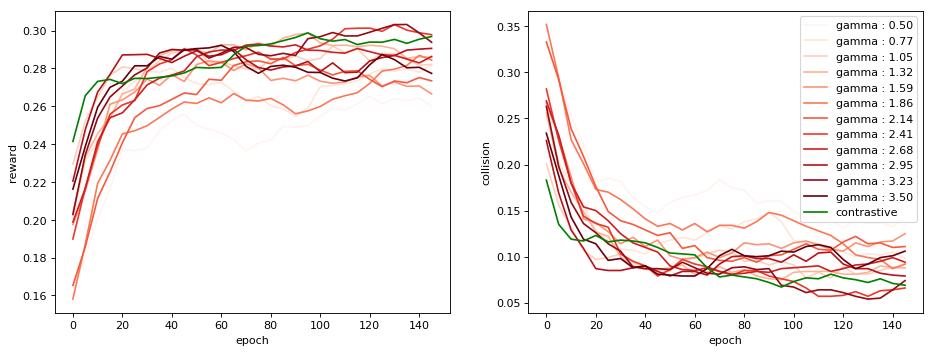

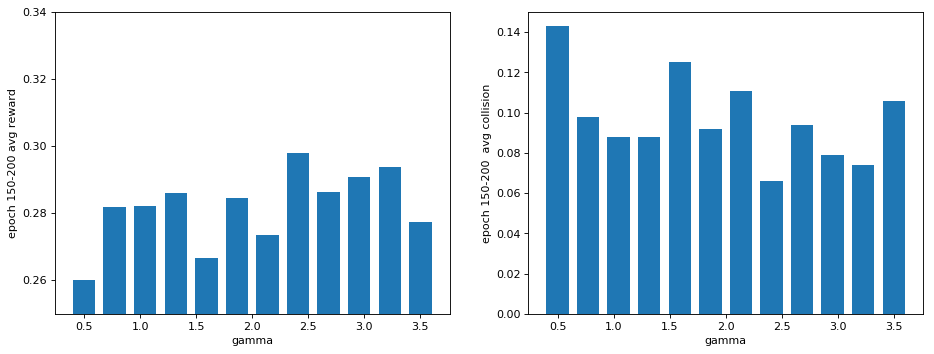

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=80, figsize=(14, 5))
conv = 10
avgs_r = []
avgs_col = []
for gamma, res in results_gamma_traj :
    rewards = [r[1]['reward'] for r in res]
    avgs_r.append(np.mean(rewards[-10:]))
    colls = [r[1]['collision'] for r in res]
    avgs_col.append(np.mean(colls[-10:]))
    r = np.convolve(rewards, np.ones(conv)/conv, mode='valid')
    ax1.plot(np.arange(len(r))*5, r, label=gamma, c=cmap(norm(gamma)))
    ax2.plot(np.arange(len(r))*5, np.convolve(colls, np.ones(conv)/conv, mode='valid'), label='gamma : {:.2f}'.format(gamma), c=cmap(norm(gamma)))
rewards_cont = [r[1]['reward'] for r in results_count]
colls = [r[1]['collision'] for r in results_count]
r = np.convolve(rewards_cont, np.ones(conv)/conv, mode='valid')

ax1.plot(np.arange(len(r))*5, r, label='contrastive', c='g')
ax2.plot(np.arange(len(r))*5, np.convolve(colls, np.ones(conv)/conv, mode='valid'), label='contrastive', c='g')

ax1.set_xlabel('epoch')
ax2.set_xlabel('epoch')
ax1.set_ylabel('reward')
ax2.set_ylabel('collision')
plt.plot()
plt.legend()
plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=80, figsize=(14, 5))
ax1.set_xlabel('gamma')
ax2.set_xlabel('gamma')
ax1.set_ylabel('epoch 150-200 avg reward')
ax2.set_ylabel('epoch 150-200  avg collision')
ax1.bar(gamma_grid, avgs_r, width=3/12-0.05)
ax1.set_ylim(0.25, 0.34)
ax2.bar(gamma_grid, avgs_col, width=3/12-0.05)
plt.show()

In [4]:
??test_model

In [2]:
model_p = 'data/yu/policy_net.pth'
test_model(model_p, 'sail', n_episodes=500)

success: 0.95, collision: 0.05, nav time: 10.46, reward: 0.3123 +- 0.1123


{'success': 0.95,
 'collision': 0.05,
 'nav time': 10.455263157894738,
 'reward': 0.3122977808895543}

In [4]:
model_p = 'data/yu/policy_net_194.pth'
test_model(model_p, 'sail', n_episodes=500)

success: 1.00, collision: 0.00, nav time: 10.59, reward: 0.3318 +- 0.0379


{'success': 1.0,
 'collision': 0.0,
 'nav time': 10.5875,
 'reward': 0.33184911230612674}

In [10]:
model_p = 'data/yu/policy_net_159.pth'
test_model(model_p, 'sail', n_episodes=500)

success: 1.00, collision: 0.00, nav time: 10.60, reward: 0.3316 +- 0.0396


{'success': 1.0,
 'collision': 0.0,
 'nav time': 10.6025,
 'reward': 0.3315863884021789}